**1. Upload the dataset**

In [2]:
import pandas as pd

# Specify the file path where the CSV file is located
csv_file_path = "Data/reddit_comments.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df

Comment_Body          Author  \
0      Funny how Argentina isn't even on the list bec...       Yearlaren   
1      And just to add salt to the wound, iPhone in P...      pole_verme   
2      I read a article saying that it was cheaper to...    _karma_bitch   
3      As a person that lived in the third world for ...        Momovsky   
4      Norwegian here. Number seems fairly accurate, ...    soffagrisen2   
...                                                  ...             ...   
18213  Masimo... the company charging Apple watch pri...           ajphx   
18214  and the lawsuit will last longer than that app...      CyberAsura   
18215  Wouldn’t masimo want apple to continue to sell...      tonyocampo   
18216  It's the most successful smart watch Apple wil...  baronvondanger   
18217  So if they win, does this mean you'll have to ...     LathropWolf   

       Upvotes  Awards              Date       Search  
0         3962       0  12.09.2022 15:32       iPhone  
1         1813       0  12.09.2022 13:38       iPhone  
2         1649       0  12.09.2022 13:36       iPhone  
3         2851       0  12.09.2022 12:40       iPhone  
4          181       0  12.09.2022 14:55       iPhone  
...        ...     ...               ...          ...  
18213      272       0  27.10.2023 13:58  Apple Watch  
18214        0       0  27.10.2023 17:17  Apple Watch  
18215        0       0  27.10.2023 23:18  Apple Watch  
18216        1       0  28.10.2023 03:10  Apple Watch  
18217        1       0  28.10.2023 06:19  Apple Watch  

[18218 rows x 6 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18218 entries, 0 to 18217
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comment_Body  18218 non-null  object
 1   Author        18218 non-null  object
 2   Upvotes       18218 non-null  int64 
 3   Awards        18218 non-null  int64 
 4   Date          18218 non-null  object
 5   Search        18218 non-null  object
dtypes: int64(2), object(4)
memory usage: 854.1+ KB


**2. Adjust the type of the columns**

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18218 entries, 0 to 18217
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Comment_Body  18218 non-null  object        
 1   Author        18218 non-null  object        
 2   Upvotes       18218 non-null  int64         
 3   Awards        18218 non-null  int64         
 4   Date          18218 non-null  datetime64[ns]
 5   Search        18218 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 854.1+ KB


**3. Check the duplicates**

In [5]:
df = df.drop_duplicates()
df


Comment_Body          Author  \
0      Funny how Argentina isn't even on the list bec...       Yearlaren   
1      And just to add salt to the wound, iPhone in P...      pole_verme   
2      I read a article saying that it was cheaper to...    _karma_bitch   
3      As a person that lived in the third world for ...        Momovsky   
4      Norwegian here. Number seems fairly accurate, ...    soffagrisen2   
...                                                  ...             ...   
18213  Masimo... the company charging Apple watch pri...           ajphx   
18214  and the lawsuit will last longer than that app...      CyberAsura   
18215  Wouldn’t masimo want apple to continue to sell...      tonyocampo   
18216  It's the most successful smart watch Apple wil...  baronvondanger   
18217  So if they win, does this mean you'll have to ...     LathropWolf   

       Upvotes  Awards                Date       Search  
0         3962       0 2022-12-09 15:32:00       iPhone  
1         1813       0 2022-12-09 13:38:00       iPhone  
2         1649       0 2022-12-09 13:36:00       iPhone  
3         2851       0 2022-12-09 12:40:00       iPhone  
4          181       0 2022-12-09 14:55:00       iPhone  
...        ...     ...                 ...          ...  
18213      272       0 2023-10-27 13:58:00  Apple Watch  
18214        0       0 2023-10-27 17:17:00  Apple Watch  
18215        0       0 2023-10-27 23:18:00  Apple Watch  
18216        1       0 2023-10-28 03:10:00  Apple Watch  
18217        1       0 2023-10-28 06:19:00  Apple Watch  

[18218 rows x 6 columns]

**4. Filter out the unrelated comments**

In [6]:
df.Search.value_counts()

iPhone         7367
Apple Watch    4551
iPad           3382
AirPods        1467
Macbook        1451
Name: Search, dtype: int64

In [7]:
df = df[~((df['Search'] == 'iPhone') & (~df['Comment_Body'].str.contains('iPhone', na=False, case=False))) | (df['Search'] != 'iPhone')]
df = df[~((df['Search'] == 'Apple Watch') & (~df['Comment_Body'].str.contains('Apple Watch', na=False, case=False))) | (df['Search'] != 'Apple Watch')]
df = df[~((df['Search'] == 'iPad') & (~df['Comment_Body'].str.contains('iPad', na=False, case=False))) | (df['Search'] != 'iPad')]
df = df[~((df['Search'] == 'AirPods') & (~df['Comment_Body'].str.contains('AirPods', na=False, case=False))) | (df['Search'] != 'AirPods')]
df = df[~((df['Search'] == 'Macbook') & (~df['Comment_Body'].str.contains('Macbook', na=False, case=False))) | (df['Search'] != 'Macbook')]
df.Search.value_counts()


iPad           3382
Apple Watch    1976
iPhone         1653
AirPods        1467
Macbook        1451
Name: Search, dtype: int64

**5. Anonymize the comments**

In [8]:
df = df.drop('Author', axis=1)
df


Comment_Body  Upvotes  Awards  \
1      And just to add salt to the wound, iPhone in P...     1813       0   
2      I read a article saying that it was cheaper to...     1649       0   
4      Norwegian here. Number seems fairly accurate, ...      181       0   
5      Source, full methodology and interactive versi...      262       0   
6      Illegally importing iPhones from the UAE or Ja...       36       0   
...                                                  ...      ...     ...   
18207  “Apple Watch Ultra is advertised as having up ...       -1       0   
18208  My husband is apart of the beta team that test...       -1       0   
18211  Are you a tech bro that wants to look cool to ...       -2       0   
18213  Masimo... the company charging Apple watch pri...      272       0   
18214  and the lawsuit will last longer than that app...        0       0   

                     Date       Search  
1     2022-12-09 13:38:00       iPhone  
2     2022-12-09 13:36:00       iPhone  
4     2022-12-09 14:55:00       iPhone  
5     2022-12-09 12:36:00       iPhone  
6     2022-12-09 15:10:00       iPhone  
...                   ...          ...  
18207 2022-08-09 00:08:00  Apple Watch  
18208 2022-08-09 03:07:00  Apple Watch  
18211 2022-08-09 04:20:00  Apple Watch  
18213 2023-10-27 13:58:00  Apple Watch  
18214 2023-10-27 17:17:00  Apple Watch  

[9929 rows x 5 columns]

**6. Detect the language**

In [9]:
from langdetect import detect

def detect_language(comment):
    try:
        return detect(comment)
    except:
        return None

df['Language'] = df['Comment_Body'].apply(detect_language)
df['Language'].value_counts()

en    9779
fr      19
af      17
it      17
cy      12
nl      11
es       8
tl       7
da       6
et       6
id       6
so       6
hr       6
sl       4
pt       4
no       3
sw       3
lv       3
de       2
sq       2
vi       1
ru       1
sv       1
ca       1
lt       1
Name: Language, dtype: int64

In [10]:
df[df['Language']=='tr']


Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [11]:
df['Language'] = df['Language'].str.replace('tr', 'en')
df[df['Language']=='tr']


Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [12]:
df[df['Language']=='vi']


Comment_Body  Upvotes  Awards                Date  Search Language
1619  Iphone 4 huh       32       0 2023-04-27 15:56:00  iPhone       vi

In [13]:
df['Language'] = df['Language'].str.replace('vi', 'en')
df[df['Language']=='vi']


Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [14]:
df[df['Language']=='lt']


Comment_Body  Upvotes  Awards                Date  \
12206  link Airpods\n\n panda buy        1       0 2023-05-16 15:13:00   

        Search Language  
12206  AirPods       lt

In [15]:
df['Language'] = df['Language'].str.replace('lt', 'en')
df[df['Language']=='lt']


Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [16]:
df[df['Language']=='ca']


Comment_Body  Upvotes  Awards                Date Search Language
11512  transgenic ipad        1       0 2023-11-03 17:08:00   iPad       ca

In [17]:
df['Language'] = df['Language'].str.replace('ca', 'en')
df[df['Language']=='ca']


Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [18]:
df[df['Language']=='de']


Comment_Body  Upvotes  Awards                Date  Search  \
4208   An iPhone 15 Pro Mini        2       0 2023-06-09 06:05:00  iPhone   
10219        Better iPadOS??        9       0 2023-01-23 01:51:00    iPad   

      Language  
4208        de  
10219       de

In [19]:
df['Language'] = df['Language'].str.replace('de', 'en')
df[df['Language']=='de']


Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [20]:
df[df['Language']=='ru']

Comment_Body  Upvotes  Awards                Date  \
7702  Ема MacBook с русской клавиатурой        1       0 2023-04-17 06:47:00   

       Search Language  
7702  Macbook       ru

In [21]:
df[df['Language']=='sq']

Comment_Body  Upvotes  Awards                Date   Search  \
7366      Tbh iPhone kinda shit        1       0 2022-11-16 12:12:00   iPhone   
13056  AirPods gave me tinnitus        1       0 2022-05-20 01:15:00  AirPods   

      Language  
7366        sq  
13056       sq

In [22]:
df['Language'] = df['Language'].str.replace('sq', 'en')
df[df['Language']=='sq']


Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [23]:
df[df['Language']=='pl']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [24]:
df['Language'] = df['Language'].str.replace('pl', 'en')
df[df['Language']=='pl']


Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [25]:
df[df['Language']=='sw']

Comment_Body  Upvotes  Awards  \
8205                                     DO MY MACBOOK!        2       0   
8453  sach batao mene bhi macbook liya but majja nah...        3       0   
9595        https://www.ifixit.com/Device/iPad\_Mini\_5        1       0   

                    Date   Search Language  
8205 2022-01-04 11:52:00  Macbook       sw  
8453 2023-05-08 06:04:00  Macbook       sw  
9595 2022-02-21 04:18:00     iPad       sw

In [26]:
df.loc[df['Comment_Body'].str.contains('sach batao mene bhi macbook liya but majja'), 'Language'] = 'hi'
df['Language'] = df['Language'].str.replace('sw', 'en')
df[df['Language']=='sw']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [27]:
df[df['Language']=='sv']

Comment_Body  Upvotes  Awards  \
11258  i feel like better ipads are coming next year ...        2       0   

                     Date Search Language  
11258 2022-10-19 10:23:00   iPad       sv

In [28]:
df['Language'] = df['Language'].str.replace('sv', 'en')
df[df['Language']=='sv']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [29]:
df[df['Language']=='lv']

Comment_Body  Upvotes  Awards                Date   Search  \
12509     Airpods are stupid        7       0 2022-03-11 20:56:00  AirPods   
13402             AirPods 🤮🤮       -9       0 2022-09-24 02:31:00  AirPods   
13577  Airbud: 1\nAirPods: 0        1       0 2023-05-02 13:16:00  AirPods   

      Language  
12509       lv  
13402       lv  
13577       lv

In [30]:
df['Language'] = df['Language'].str.replace('lv', 'en')
df[df['Language']=='lv']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [31]:
df[df['Language']=='no']

Comment_Body  Upvotes  Awards  \
2312          Average iPhone user be like        1       0   
7097  I’d even take an iPhone 3g over her        2       0   
8498            MacBook just like me fr 😒        1       0   

                    Date   Search Language  
2312 2022-11-20 06:16:00   iPhone       no  
7097 2023-12-02 08:17:00   iPhone       no  
8498 2023-10-26 14:38:00  Macbook       no

In [32]:
df['Language'] = df['Language'].str.replace('no', 'en')
df[df['Language']=='no']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [33]:
df[df['Language']=='sl']

Comment_Body  Upvotes  Awards                Date  \
680    Beluga bro\nSaves iPhone pro        1       0 2023-01-14 04:00:00   
3484              iPhone problems 🤣        1       0 2022-10-27 17:48:00   
10236         Foldable ipad pro pls        0       0 2023-01-23 05:05:00   
10706                based ipad kid        8       0 2022-03-11 12:29:00   

       Search Language  
680    iPhone       sl  
3484   iPhone       sl  
10236    iPad       sl  
10706    iPad       sl

In [34]:
df['Language'] = df['Language'].str.replace('sl', 'en')
df[df['Language']=='sl']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [35]:
df[df['Language']=='so']

Comment_Body  Upvotes  Awards                Date  \
6078            iPhone XS Max.        1       0 2022-04-11 13:59:00   
7919                  >macbook        1       0 2022-09-21 08:24:00   
10257  How about iPad Pro max?        1       0 2023-01-23 15:43:00   
10709  WE SAID NO IPAD AFTER 8        2       0 2022-04-11 01:10:00   
11509             iPad 14 Max👀        1       0 2023-10-01 09:38:00   
15639      APPLE WATCH DUPEEEE        1       0 2023-03-08 18:37:00   

            Search Language  
6078        iPhone       so  
7919       Macbook       so  
10257         iPad       so  
10709         iPad       so  
11509         iPad       so  
15639  Apple Watch       so

In [36]:
df['Language'] = df['Language'].str.replace('so', 'en')
df[df['Language']=='so']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [37]:
df[df['Language']=='tl']

Comment_Body  Upvotes  Awards  \
410                 iPhone 14 Pro Dinamax        1       0   
7547            Hydro bricking my MacBook        3       0   
8123                 The hangman macbook.        1       0   
8708         Ma ma ma macbook p p p p pro        3       0   
9352   Why buy your kid an iPad so young?        0       0   
10808                             ipad 69        1       0   
11376                           an* iPad.        0       0   

                     Date   Search Language  
410   2022-09-24 02:49:00   iPhone       tl  
7547  2022-04-12 01:48:00  Macbook       tl  
8123  2022-03-24 13:27:00  Macbook       tl  
8708  2023-05-26 20:26:00  Macbook       tl  
9352  2022-09-12 17:23:00     iPad       tl  
10808 2023-09-09 16:31:00     iPad       tl  
11376 2023-02-10 18:06:00     iPad       tl

In [38]:
df['Language'] = df['Language'].str.replace('tl', 'en')
df[df['Language']=='tl']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [39]:
df[df['Language']=='pt']

Comment_Body  Upvotes  Awards  \
9238   ipad pro m3 32gb for just $650 or upgrade to i...        1       0   
12208  Que modelo de airpods corresponderia este ?  A...        1       0   
12387           bro did my grandma steal ur airpods lmao        1       0   
13431                         Dendro airpods LMAOOOO 😂😂😂       51       0   

                     Date   Search Language  
9238  2023-10-15 21:30:00     iPad       pt  
12208 2023-07-31 00:11:00  AirPods       pt  
12387 2022-02-09 04:57:00  AirPods       pt  
13431 2022-07-18 14:49:00  AirPods       pt

In [40]:
df.loc[df['Comment_Body'].str.contains('ipad pro m3 32gb for just'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('bro did my grandma steal ur airpods'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Airpods Pro Ultra'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('AirPods Pro 2>>>>>'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Dendro airpods'), 'Language'] = 'en'
df[df['Language']=='pt']

Comment_Body  Upvotes  Awards  \
12208  Que modelo de airpods corresponderia este ?  A...        1       0   

                     Date   Search Language  
12208 2023-07-31 00:11:00  AirPods       pt

In [41]:
df[df['Language']=='hr']

Comment_Body  Upvotes  Awards                Date  \
600    Beluga bro saves iPhone pro        3       0 2023-01-13 19:05:00   
5848            iPhone 7 jet black        2       0 2022-03-11 19:15:00   
5950          Iphone 7 jet black 🥹        1       0 2022-04-11 01:36:00   
5958      iPhone 7 Plus jet black.        1       0 2022-04-11 02:22:00   
10031                   OLED ipad?        1       0 2022-08-22 22:23:00   
13596                 Woke airpods        1       0 2022-08-09 11:17:00   

        Search Language  
600     iPhone       hr  
5848    iPhone       hr  
5950    iPhone       hr  
5958    iPhone       hr  
10031     iPad       hr  
13596  AirPods       hr

In [42]:
df['Language'] = df['Language'].str.replace('hr', 'en')
df[df['Language']=='hr']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [43]:
df[df['Language']=='id']

Comment_Body  Upvotes  Awards  \
8559                                     Yup MACBOOK pro        1       0   
9268                                             Pupipad        1       0   
9899                           I'll take an iPad, Santa!        0       0   
10164                       i just want an ipad mini pro        1       0   
10794                     i just want an iPad Pro Mini 😫        1       0   
12680  Mumbai k Manish market me jaa k 500 rs k airpo...       22       0   

                     Date   Search Language  
8559  2023-04-10 17:00:00  Macbook       id  
9268  2023-01-10 19:27:00     iPad       id  
9899  2022-05-24 22:31:00     iPad       id  
10164 2022-10-19 19:43:00     iPad       id  
10794 2023-09-25 18:55:00     iPad       id  
12680 2023-08-14 05:05:00  AirPods       id

In [44]:
df.loc[df['Comment_Body'].str.contains('Mumbai k Manish market me jaa k 500 rs k'), 'Language'] = 'hi'
df['Language'] = df['Language'].str.replace('id', 'en')
df[df['Language']=='id']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [45]:
df[df['Language']=='et']

Comment_Body  Upvotes  Awards  \
9926                    Guess the iPad kid is just a kid        2       0   
10233                I’ll take a major update iPad mini.        2       0   
10349                   iPad mommy raises anti iPad kids        5       0   
11640                  just put MacOs on iPad goddammit!        3       0   
12510                         Good, airpods look stupid.        2       0   
12726  450$ ka airpods 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣\n\nItne me PS5 aaja...        1       0   

                     Date   Search Language  
9926  2023-03-05 10:17:00     iPad       et  
10233 2023-01-23 01:07:00     iPad       et  
10349 2022-07-22 09:53:00     iPad       et  
11640 2022-03-06 04:59:00     iPad       et  
12510 2022-03-11 22:29:00  AirPods       et  
12726 2023-08-15 04:48:00  AirPods       et

In [46]:
df.loc[df['Comment_Body'].str.contains('\n\nItne me'), 'Language'] = 'hi'
df['Language'] = df['Language'].str.replace('et', 'en')
df[df['Language']=='et']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [47]:
df[df['Language']=='da']

Comment_Body  Upvotes  Awards  \
5893                     black iPhone 4 for ever!        1       0   
9542               I’d get it just for iPadOS Pro        1       0   
9588            Average IPhone/iPad user be like:        1       0   
12356        I just ordered airpods pro 2nd gen 😅        1       0   
13430  Dendro AIRPods?? More like Dendro LeafPods      164       0   
13552                  Airpods? More like Airbuds       72       0   

                     Date   Search Language  
5893  2022-03-11 17:43:00   iPhone       da  
9542  2023-10-24 17:16:00     iPad       da  
9588  2022-02-21 02:14:00     iPad       da  
12356 2023-03-22 18:06:00  AirPods       da  
13430 2022-07-18 14:54:00  AirPods       da  
13552 2023-04-02 23:31:00  AirPods       da

In [48]:
df['Language'] = df['Language'].str.replace('da', 'en')
df[df['Language']=='da']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [49]:
df[df['Language']=='nl']

Comment_Body  Upvotes  Awards                Date  \
2300                 Wtf, zombie iphone        1       0 2022-09-27 15:02:00   
7799   My 2014 MacBook Pro gets hot too        3       0 2022-07-17 22:25:00   
7845                         MacBook SE        1       0 2023-05-09 12:43:00   
7865                         MacBook 5C        1       0 2023-05-09 20:35:00   
7920                     MacBook moment        1       0 2022-09-21 10:28:00   
8356          Worst MacBooks ever made.        1       0 2022-11-07 07:31:00   
8357           Best MacBooks ever made.        1       0 2022-11-07 10:40:00   
8624                     Macbook wheel?        1       0 2023-06-09 17:19:00   
9266                      Poor Ipad.  😥        1       0 2023-01-10 18:02:00   
13498            Airpods x Hans Niemann        2       0 2023-05-03 17:59:00   
14074  Best Apple watch I've ever seen.        1       0 2023-05-06 11:55:00   

            Search Language  
2300        iPhone       nl  
7799       Macbook       nl  
7845       Macbook       nl  
7865       Macbook       nl  
7920       Macbook       nl  
8356       Macbook       nl  
8357       Macbook       nl  
8624       Macbook       nl  
9266          iPad       nl  
13498      AirPods       nl  
14074  Apple Watch       nl

In [50]:
df['Language'] = df['Language'].str.replace('nl', 'en')
df[df['Language']=='nl']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [51]:
df[df['Language']=='es']

Comment_Body  Upvotes  Awards  \
7259   Por un momento creí que el iPhone grababa mejo...        1       0   
8705   Como olvidarse de las macbooks de producción n...      179       0   
8706   Tenemos  notebooks de industria nacional?\nNo\...        5       0   
8707   Mas allá de lo hijo de puta de poner una MacBo...        4       0   
9223                                        No iPad pro?        1       0   
9637                           My iPad has a calculator?        1       0   
9888                     Se pueden enviar iPad a españa?        1       0   
13556     Goodbye AirPods, hello Labrador fur slippers!!       10       0   

                     Date   Search Language  
7259  2022-02-05 02:58:00   iPhone       es  
8705  2023-05-26 16:10:00  Macbook       es  
8706  2023-05-26 17:16:00  Macbook       es  
8707  2023-05-26 20:04:00  Macbook       es  
9223  2023-10-15 14:03:00     iPad       es  
9637  2023-01-20 12:29:00     iPad       es  
9888  2023-01-03 23:17:00     iPad       es  
13556 2023-04-02 23:28:00  AirPods       es

In [52]:
df.loc[df['Comment_Body'].str.contains('No iPad pro?'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('My iPad has a calculator?'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Airpods don't cost"), 'Language'] = 'en'
df[df['Language']=='es']


Comment_Body  Upvotes  Awards  \
7259   Por un momento creí que el iPhone grababa mejo...        1       0   
8705   Como olvidarse de las macbooks de producción n...      179       0   
8706   Tenemos  notebooks de industria nacional?\nNo\...        5       0   
8707   Mas allá de lo hijo de puta de poner una MacBo...        4       0   
9888                     Se pueden enviar iPad a españa?        1       0   
13556     Goodbye AirPods, hello Labrador fur slippers!!       10       0   

                     Date   Search Language  
7259  2022-02-05 02:58:00   iPhone       es  
8705  2023-05-26 16:10:00  Macbook       es  
8706  2023-05-26 17:16:00  Macbook       es  
8707  2023-05-26 20:04:00  Macbook       es  
9888  2023-01-03 23:17:00     iPad       es  
13556 2023-04-02 23:28:00  AirPods       es

In [53]:
df[df['Language']=='cy']

Comment_Body  Upvotes  Awards  \
7527   If you can afford a MacBook Pro you can afford...       -1       0   
9491                                 IPad Air 2020 ?????        0       0   
10415                You ALMOST got your new iPad mini 6        1       0   
10691                               Ipad air 4 is good 👍        2       0   
11622                                             iPad 💀        1       0   
12023                            yes ! i got an ipad air        1       0   
12332                Dont drop your airpods down a drain        2       0   
12335                                    Buy new airpods        1       0   
12363                          Poseidon got your airpods      180       0   
12883      Well did you get your airpods or not????\n😲😲😲       19       0   
13228                                   Goodwill AirPods        1       0   
13572                 Why did you name your dog AirPods?        1       0   

                     Date   Search Language  
7527  2023-04-04 11:28:00  Macbook       cy  
9491  2022-09-28 19:20:00     iPad       cy  
10415 2022-02-18 22:48:00     iPad       cy  
10691 2022-10-22 11:22:00     iPad       cy  
11622 2022-09-10 05:44:00     iPad       cy  
12023 2023-09-09 04:43:00     iPad       cy  
12332 2023-05-29 17:52:00  AirPods       cy  
12335 2023-05-29 02:43:00  AirPods       cy  
12363 2022-01-09 17:30:00  AirPods       cy  
12883 2022-05-08 21:36:00  AirPods       cy  
13228 2022-11-02 00:28:00  AirPods       cy  
13572 2023-05-02 08:57:00  AirPods       cy

In [54]:
df['Language'] = df['Language'].str.replace('cy', 'en')
df[df['Language']=='cy']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [55]:
df[df['Language']=='af']

Comment_Body  Upvotes  Awards  \
2813                             damn we in iphone13 now        1       0   
5786          I remember thinking iPhone 5 was sleek af.      157       0   
7757                    Macbooks just kept getting worse        0       0   
7771              Sooner or late, waterproofing MacBooks        1       0   
7826                                    MacBook Amateur?        3       0   
8282    didn't apple stop making intel macbooks in 2020?        1       0   
9241                             New iPad mini!! Sweet!!        1       0   
9769                                         >iPad\n>Old        5       0   
10323                    Sounds like you stole an iPad..        1       0   
10365    Having an IPad doesn’t mean not being in nature        2       0   
10417                            😀 is uh- is ur ipad ok?        1       0   
10638         Breaking news IPad maker working on iPads.        3       0   
11497                   Does it also works on ipad 8 gen        1       0   
12382       Those airpods be like: "How did I get here?"        1       0   
13432                       AirPods? More like Grasspods        2       0   
13872  I mean, it doesn’t even look like an Apple Wat...        2       0   
16992                     Looks like an apple watch slot       17       0   

                     Date       Search Language  
2813  2022-06-05 17:29:00       iPhone       af  
5786  2022-03-11 14:46:00       iPhone       af  
7757  2022-07-16 05:55:00      Macbook       af  
7771  2022-07-16 06:53:00      Macbook       af  
7826  2023-05-09 16:48:00      Macbook       af  
8282  2023-11-04 16:20:00      Macbook       af  
9241  2023-10-15 22:53:00         iPad       af  
9769  2023-05-23 06:56:00         iPad       af  
10323 2023-05-16 14:15:00         iPad       af  
10365 2022-07-22 13:55:00         iPad       af  
10417 2022-08-27 20:46:00         iPad       af  
10638 2022-10-06 19:32:00         iPad       af  
11497 2023-08-01 05:31:00         iPad       af  
12382 2022-02-09 01:58:00      AirPods       af  
13432 2022-07-18 15:39:00      AirPods       af  
13872 2023-04-25 18:00:00  Apple Watch       af  
16992 2023-03-09 17:25:00  Apple Watch       af

In [56]:
df['Language'] = df['Language'].str.replace('af', 'en')
df[df['Language']=='af']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [57]:
df[df['Language']=='it']

Comment_Body  Upvotes  Awards  \
345              Iphone 14 deluxe ultra super pro max 10        1       0   
409                           iPhone 16 pro max ultra se        1       0   
415                   iPhone 14 Pro Super Mega Max Ultra        1       0   
425    iPhone pro max ultra hyper giga omega gamma si...        1       0   
466                    IPhone 14 pro max max ultra ultra        1       0   
484         Pro max ultra super duper bumper r iphone 14        1       0   
500                 iPhone 14 pro max ultra giga titan 🤣        1       0   
4166                                    A mini iPhone 15        2       0   
4178                                     iphone mini pro        2       0   
6070   iPhone 4 / 4s, iPhone 5, iPhone XS, iPhone 12 ...        1       0   
9220                iPad Mini “update” is disappointing.        2       0   
9492                             No iPad mini support :/        0       0   
10169  It's iPad pro, semi-pro, semi-semi-pro, iPad o...        0       0   
10226                       iPad Pro mini… one can dream        2       0   
10253                             #pro apps on pro ipads        1       0   
12177        give me iPad mini pro\n\n\nor give me death        4       0   
12178           Give me iPad mini pro. \n\nM3, promotion       14       0   

                     Date  Search Language  
345   2022-09-23 22:30:00  iPhone       it  
409   2022-09-24 02:44:00  iPhone       it  
415   2022-09-24 03:09:00  iPhone       it  
425   2022-09-24 04:26:00  iPhone       it  
466   2022-09-24 07:23:00  iPhone       it  
484   2022-09-24 09:45:00  iPhone       it  
500   2022-09-24 12:08:00  iPhone       it  
4166  2023-05-09 23:16:00  iPhone       it  
4178  2023-06-09 01:08:00  iPhone       it  
6070  2022-04-11 13:23:00  iPhone       it  
9220  2023-10-15 17:16:00    iPad       it  
9492  2022-09-28 23:19:00    iPad       it  
10169 2022-10-20 03:20:00    iPad       it  
10226 2023-01-23 03:05:00    iPad       it  
10253 2023-01-23 12:37:00    iPad       it  
12177 2023-02-08 09:37:00    iPad       it  
12178 2023-01-08 17:41:00    iPad       it

In [58]:
df['Language'] = df['Language'].str.replace('it', 'en')
df[df['Language']=='it']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [59]:
df[df['Language']=='fr']

Comment_Body  Upvotes  Awards  \
371                                  Max prestige iphone        1       0   
385                        iPhone 14 pro max ultra plus.        1       0   
3193                                       Iphone moment        1       0   
5800             Iphone 14 pro deep purple so damn clean        9       0   
5878   Iphone 14 pro max\n\nhttps://preview.redd.it/g...        1       0   
5896                                       Iphone 7 plus        1       0   
5918                                 Iphone 4S, Iphone X        1       0   
5957                                            Iphone 6        1       0   
5982                                Iphone 6/6s no doubt        1       0   
6008                                           Iphone xs        1       0   
6018                                            Iphone 5        1       0   
6650                        Go home iphone, you're drunk        1       0   
7103                              You can mute iPhone 14        1       0   
7113                                           Iphone 14        0       0   
7119                                     Lmfao iphone 14        0       0   
7290                                  \*Iphone assembler        0       0   
12218                                       airpods cons        1       0   
13874                   Ceci n’est pas un Apple Watch ⌚️        2       0   
15538                            Apple Watch: just quit.        0       0   

                     Date       Search Language  
371   2022-09-24 00:29:00       iPhone       fr  
385   2022-09-24 01:15:00       iPhone       fr  
3193  2023-01-27 19:17:00       iPhone       fr  
5800  2022-03-11 18:43:00       iPhone       fr  
5878  2022-04-11 01:04:00       iPhone       fr  
5896  2022-03-11 17:52:00       iPhone       fr  
5918  2022-03-11 20:49:00       iPhone       fr  
5957  2022-04-11 02:11:00       iPhone       fr  
5982  2022-04-11 03:51:00       iPhone       fr  
6008  2022-04-11 07:18:00       iPhone       fr  
6018  2022-04-11 08:40:00       iPhone       fr  
6650  2022-09-27 03:38:00       iPhone       fr  
7103  2023-12-02 08:27:00       iPhone       fr  
7113  2023-12-02 08:25:00       iPhone       fr  
7119  2023-12-02 10:23:00       iPhone       fr  
7290  2023-03-03 15:27:00       iPhone       fr  
12218 2023-06-03 14:33:00      AirPods       fr  
13874 2023-04-25 20:08:00  Apple Watch       fr  
15538 2023-06-06 07:46:00  Apple Watch       fr

In [60]:
df['Language'] = df['Language'].str.replace('fr', 'en')
df[df['Language']=='fr']

Empty DataFrame
Columns: [Comment_Body, Upvotes, Awards, Date, Search, Language]
Index: []

In [61]:
df.Language.value_counts()

en    9915
es       6
hi       3
ru       1
pt       1
Name: Language, dtype: int64

In [62]:
df = df[df['Language']=='en']
df.Language.value_counts()


en    9915
Name: Language, dtype: int64

In [63]:
df.Search.value_counts()

iPad           3381
Apple Watch    1976
iPhone         1650
AirPods        1463
Macbook        1445
Name: Search, dtype: int64

In [64]:
def top_1000_comments(group):
    sorted_group = group.sort_values(by='Comment_Body', key=lambda x: x.str.len(), ascending=False)
    return sorted_group.head(1000)

df = df.groupby('Search').apply(top_1000_comments)
df.reset_index(drop=True, inplace=True)
df.Search.value_counts()


AirPods        1000
Apple Watch    1000
Macbook        1000
iPad           1000
iPhone         1000
Name: Search, dtype: int64

**6. Visualize the dataset**

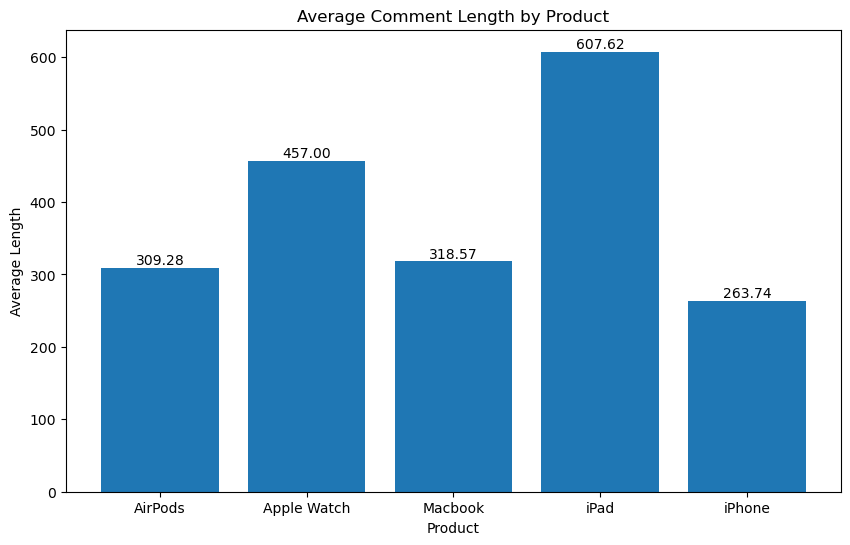

In [65]:
import matplotlib.pyplot as plt

average_lengths = df.groupby('Search')['Comment_Body'].apply(lambda x: x.str.len().mean()).reset_index()
average_lengths.rename(columns={'Comment_Body': 'Average_Length'}, inplace=True)

# Create a bigger bar chart,
plt.figure(figsize=(10, 6))

# Plot the bar chart
bar_plot = plt.bar(average_lengths['Search'], average_lengths['Average_Length'])

# Add text annotations with the average lengths on the bars
for i, value in enumerate(average_lengths['Average_Length']):
    plt.annotate(f'{value:.2f}', xy=(i, value), ha='center', va='bottom')

plt.xlabel('Product')
plt.ylabel('Average Length')
plt.title('Average Comment Length by Product')

plt.show()


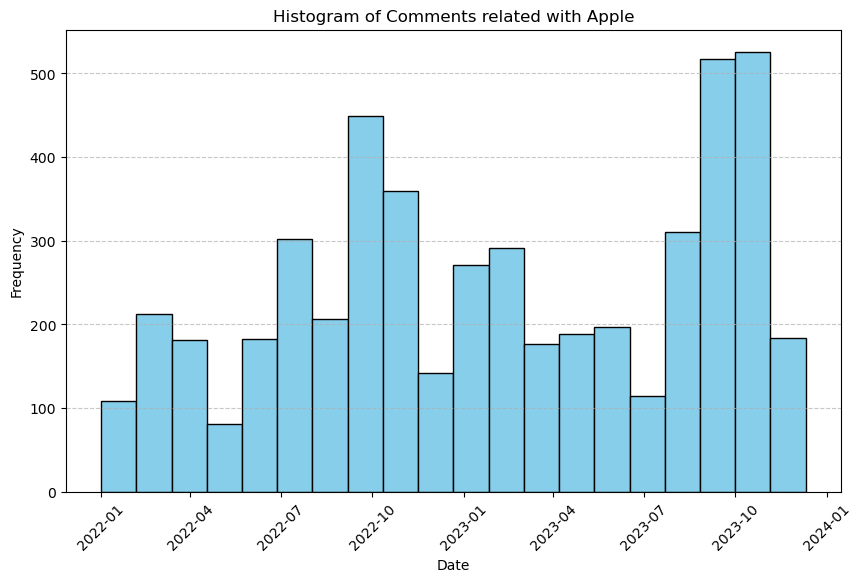

In [66]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Apple')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()


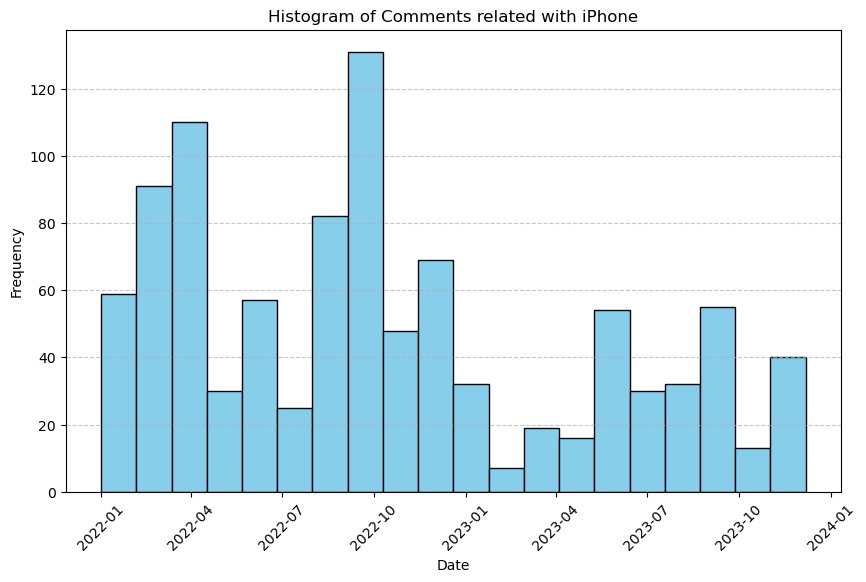

In [67]:
df_iphone = df[df['Search']=='iPhone']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_iphone['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with iPhone')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



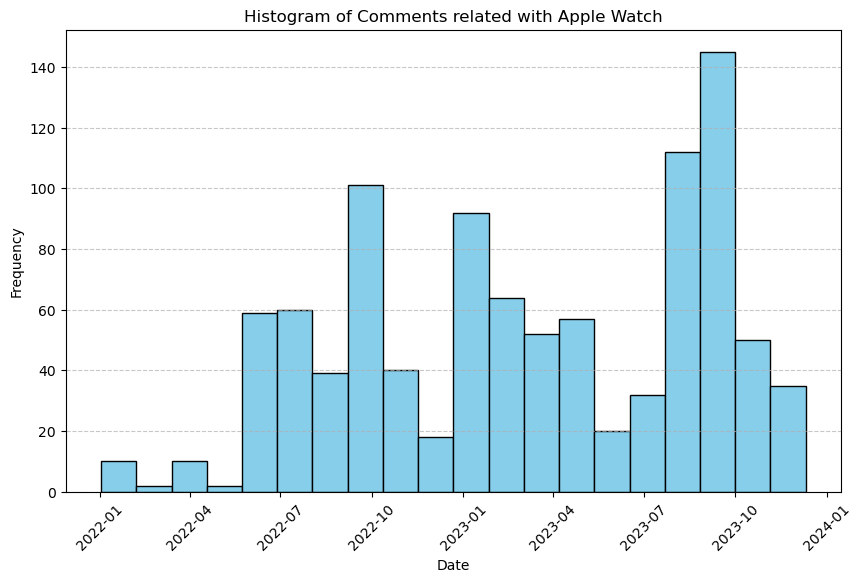

In [68]:
df_watch = df[df['Search']=='Apple Watch']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_watch['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Apple Watch')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



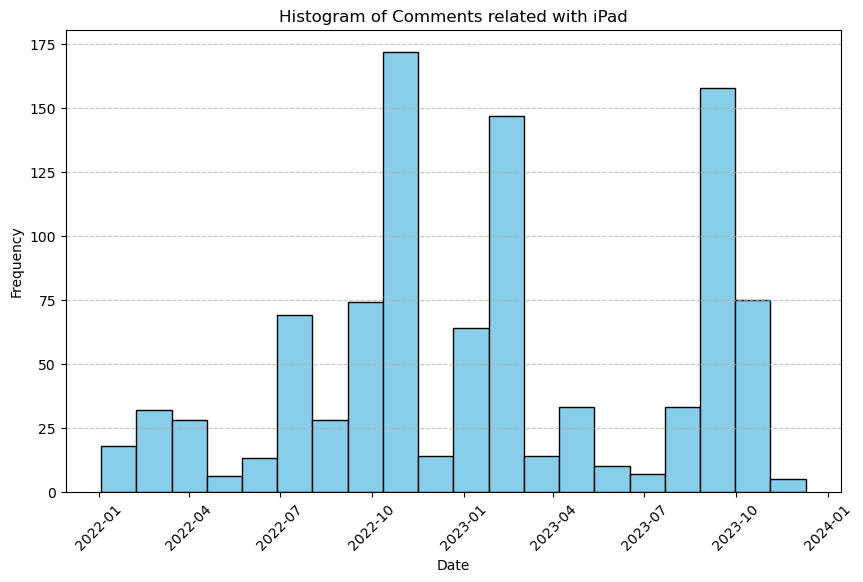

In [69]:
df_ipad = df[df['Search']=='iPad']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_ipad['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with iPad')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



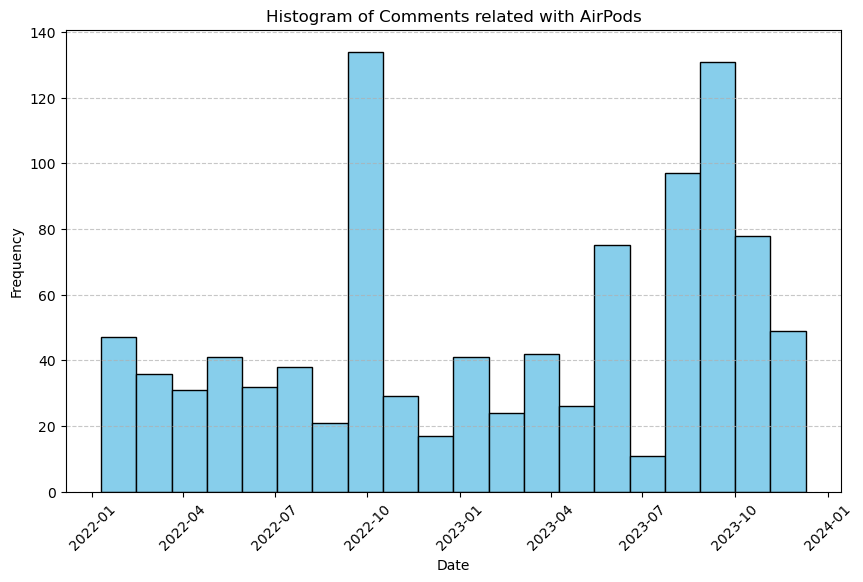

In [70]:
df_airpods = df[df['Search']=='AirPods']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_airpods['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with AirPods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



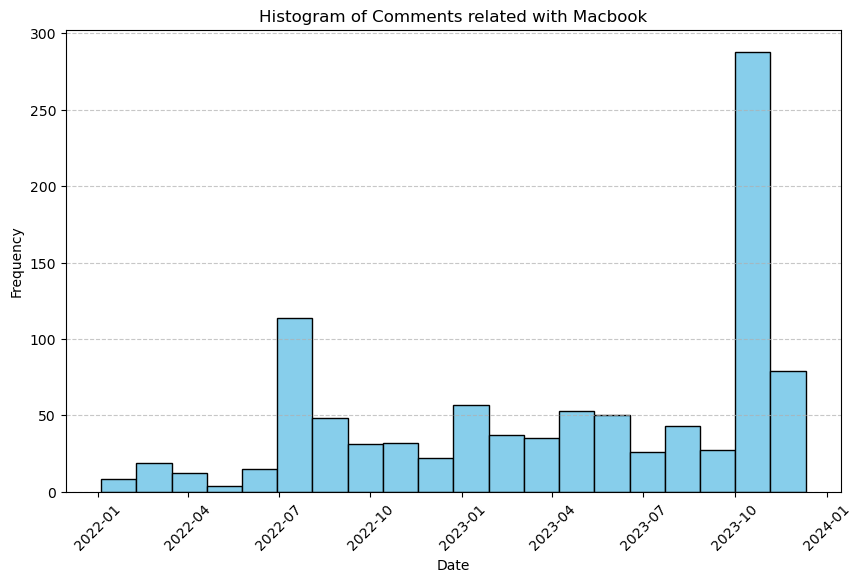

In [71]:
df_macbook = df[df['Search']=='Macbook']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_macbook['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Macbook')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



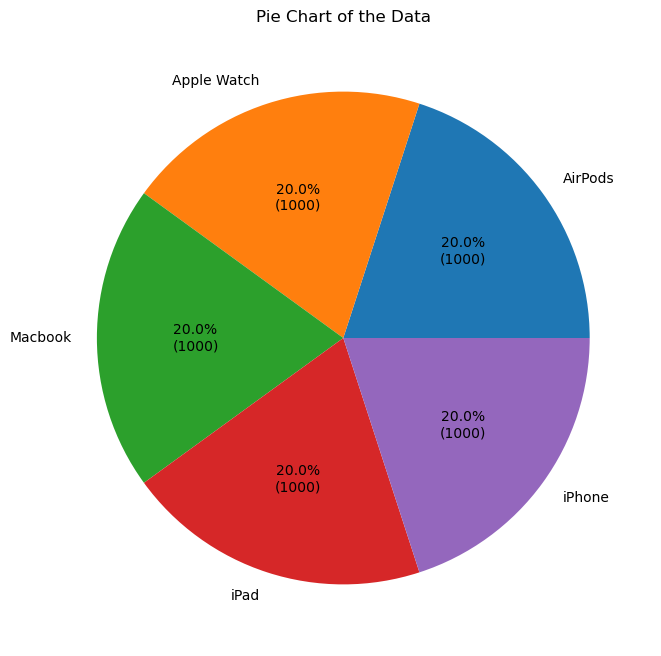

In [72]:
search_counts = df['Search'].value_counts()

# Function to format the text to be displayed on the pie chart
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(search_counts, labels=search_counts.index, autopct=lambda pct: func(pct, search_counts))

# To display both exact values and percentages, we use a custom lambda function in autopct
plt.title("Pie Chart of the Data")
plt.show()


In [73]:
sorted_df = df.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
263   Make sure you put them in LOST mode. They are ...    11779       0   
271   While landing at MDW I dropped my AirPods and ...    10317       0   
3895  Man, you had such an easy in just to say "Hey ...     7003       0   
3025  NTA - NO NO NO!\n\nHer dresses and wedding cos...     6169       0   
1916  She just wears the apple watch when you are ar...     5599       0   

                    Date       Search Language  
263  2022-04-08 23:45:00      AirPods       en  
271  2022-04-08 21:08:00      AirPods       en  
3895 2023-01-16 13:26:00         iPad       en  
3025 2022-09-17 04:43:00         iPad       en  
1916 2023-05-01 03:48:00  Apple Watch       en

In [74]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 Make sure you put them in LOST mode. They are permanently tied to your APPLE ID, you can put a notice that will show up if someone goes to use them, etc

EDIT: Since so many people are interested in the Lost Mode settings. -> [Airpods FindMy Features](https://support.apple.com/en-us/HT207581)  
EDIT#2: Thank you everyone for all the upvotes!
---------------------------------------------------------------------------------------------------------
1 While landing at MDW I dropped my AirPods and they slid all the way to the front of the plane. Instead of turning the headphones in to a flight attendant the person has just been using them.

Update:
Their location hasn’t updated since yesterday at 4pm. I can only assume their battery died and the dude doesn’t have a charger for them.
---------------------------------------------------------------------------------------------------------
2 Man, you had such an easy in just to say "Hey I was watching Netflix on your iPad and accidentally sa

In [75]:
sorted_df = df_iphone.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
4000  #**Stop personal photos and videos from poppin...     2498       0   
4604  And just to add salt to the wound, iPhone in P...     1813       0   
4072  I think I’m the only person who remembers the ...     1711       0   
4846  I read a article saying that it was cheaper to...     1649       0   
4258  > A recent report\n\nThat’s a daily mail link,...     1630       0   

                    Date  Search Language  
4000 2022-09-13 06:05:00  iPhone       en  
4604 2022-12-09 13:38:00  iPhone       en  
4072 2022-01-09 11:50:00  iPhone       en  
4846 2022-12-09 13:36:00  iPhone       en  
4258 2022-03-17 17:10:00  iPhone       en

In [76]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 #**Stop personal photos and videos from popping up unexpectedly**

>Apple's artificial intelligence helps surface photos and videos in various places across your iPhone it thinks you might want to see, as a friendly reminder of family vacations, couple photos and holidays -- but you may not always want your personal photos to pop up unexpectedly, especially if they're private, embarrassing or inappropriate.

>Fortunately with iOS 16, you can now prevent Featured Photos, as well as curated collections known as Memories, from appearing in photo widgets on your home screen and the Search and For You sections in Photos. 

>To block these tailored photos, launch the Settings app, go into Photos and toggle off Show Featured Content. All featured content will no longer appear across your device -- instead, it'll only be available in your photo library and albums.

#**Prevent the side button from accidentally ending your phone calls**

>The side/power button on the side of your iPhone allows

In [77]:
sorted_df = df_watch.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
1916  She just wears the apple watch when you are ar...     5599       0   
1196  I'm kind of curious about how well the Apple W...     2046       0   
1985  No, Apple will just pay a fee instead of getti...     1774       0   
1284  I would credit my Apple Watch with saving me a...     1481       0   
1230  “Smit Metha, a 17-year old from India, suffere...     1400       0   

                    Date       Search Language  
1916 2023-05-01 03:48:00  Apple Watch       en  
1196 2022-10-26 01:02:00  Apple Watch       en  
1985 2023-10-29 11:23:00  Apple Watch       en  
1284 2023-01-22 19:08:00  Apple Watch       en  
1230 2022-11-19 16:20:00  Apple Watch       en

In [78]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 She just wears the apple watch when you are around to show she is appreciate for the gift. Im sure the wrist computer comes off as soon as you leave so she can be at peace with her rollie
---------------------------------------------------------------------------------------------------------
1 I'm kind of curious about how well the Apple Watch handles darker skin tones.  Those have been, and continue to be, a problem for "traditional" transdermal pulse oximeters.  [1] (https://www.apsf.org/article/apsf-statement-on-pulse-oximetry-and-skin-tone/) [2](https://hms.harvard.edu/news/skin-tone-pulse-oximetry) [3](https://pubs.asahq.org/anesthesiology/article/102/4/715/7364/Effects-of-Skin-Pigmentation-on-Pulse-Oximeter) [4](https://www.statnews.com/2022/07/05/pulse-oximeters-accuracy-skin-color/) [5](https://www.statnews.com/2021/02/10/pulse-oximeters-racial-disparities/)
---------------------------------------------------------------------------------------------------------
2 No, Apple 

In [79]:
sorted_df = df_airpods.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
263  Make sure you put them in LOST mode. They are ...    11779       0   
271  While landing at MDW I dropped my AirPods and ...    10317       0   
522  Can't wait for my airpods to update either ove...     5464       0   
755  Ok it sucks that someone took them but the lad...     4012       0   
450  I thought/think the original AirPods were ridi...     2551       0   

                   Date   Search Language  
263 2022-04-08 23:45:00  AirPods       en  
271 2022-04-08 21:08:00  AirPods       en  
522 2023-11-04 20:33:00  AirPods       en  
755 2023-03-24 19:11:00  AirPods       en  
450 2022-09-24 16:04:00  AirPods       en

In [80]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 Make sure you put them in LOST mode. They are permanently tied to your APPLE ID, you can put a notice that will show up if someone goes to use them, etc

EDIT: Since so many people are interested in the Lost Mode settings. -> [Airpods FindMy Features](https://support.apple.com/en-us/HT207581)  
EDIT#2: Thank you everyone for all the upvotes!
---------------------------------------------------------------------------------------------------------
1 While landing at MDW I dropped my AirPods and they slid all the way to the front of the plane. Instead of turning the headphones in to a flight attendant the person has just been using them.

Update:
Their location hasn’t updated since yesterday at 4pm. I can only assume their battery died and the dude doesn’t have a charger for them.
---------------------------------------------------------------------------------------------------------
2 Can't wait for my airpods to update either overnight tonight or sometime in 8-12 weeks when the moon 

In [81]:
sorted_df = df_ipad.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
3895  Man, you had such an easy in just to say "Hey ...     7003       0   
3025  NTA - NO NO NO!\n\nHer dresses and wedding cos...     6169       0   
3389  NTA\n\nYour mum is enabling your sister’s beha...     5086       0   
3420  ESH and you two need to learn to communicate b...     2920       0   
3600  We have a whole group tasked with destroying d...     2469       0   

                    Date Search Language  
3895 2023-01-16 13:26:00   iPad       en  
3025 2022-09-17 04:43:00   iPad       en  
3389 2022-06-03 23:12:00   iPad       en  
3420 2022-09-17 05:00:00   iPad       en  
3600 2022-05-24 20:35:00   iPad       en

In [82]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 Man, you had such an easy in just to say "Hey I was watching Netflix on your iPad and accidentally saw some gross message previews from some dude. What's that about?" but instead sent full seclusion inside your head. Very good example of why it's good to just immediately address issues and not let things stew.
---------------------------------------------------------------------------------------------------------
1 NTA - NO NO NO!

Her dresses and wedding costs do NOT take precedence over other bills and obligations.  Replacing the ipod is an obligation and expense. Her daughter took something that wasn't hers, that she had been told on numerous occasions not to touch, took it and ended up breaking it.  If it was someone else's ipad other than your daughters would she expect THEM to wait until after the wedding for a replacement? No. (and if yes - she is a major AH)   Would she be making HER daughter wait for a replacement if your daughter broke it?  Think about it, seriously.

It i

In [83]:
sorted_df = df_macbook.sort_values(by='Upvotes', ascending=False)

top_5_comments_upvotes = sorted_df.head(5)
top_5_comments_upvotes

Comment_Body  Upvotes  Awards  \
2203  more honest headline:\n\n\nM2 MacBook Air runs...     2749       0   
2184  I know a lot of people that bought MacBooks an...     2216       0   
2996  \*laughes as my 2018 macbook pro throttles dow...     2077       0   
2649  This is the perfect lineup. Now you don’t have...     1261       0   
2319  NTA this oblivion and refusal to change of her...     1022       0   

                    Date   Search Language  
2203 2022-08-23 11:07:00  Macbook       en  
2184 2023-10-18 18:18:00  Macbook       en  
2996 2022-07-17 11:33:00  Macbook       en  
2649 2022-12-15 15:47:00  Macbook       en  
2319 2023-08-22 20:00:00  Macbook       en

In [84]:
for i, comment in enumerate(top_5_comments_upvotes['Comment_Body']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------------")

0 more honest headline:


M2 MacBook Air runs singlecore Geekbench under virtualized Windows 11 ARM (Parallels 18) faster than a Dell XPS. It also beats the XPS in multicore under the condition that the Dell is running on battery.



M2 single: 1681


M2 multi: 7260


Dell single on battery: 1182


Dell multi on battery: 5476


Dell single: 1548


Dell multi: 8103 



M2 price $1599


XPS Plus is $1849



I hoped that saved you a click.
---------------------------------------------------------------------------------------------------------
1 I know a lot of people that bought MacBooks and just new laptops in general at the start of the pandemic. I wouldn’t be surprised if a lot of this is just the pandemic driven growth dropping back towards more normal levels.

In the last 5 years I’d also say upgrading laptops has become much less important for those that don’t game. My main laptop is from early 2019 and I don’t have any compelling reason to upgrade. Most of the products I use are w

**7.Apply Contractions to fix the comments**

In [85]:
import contractions
df['Fixed_Comment'] = df['Comment_Body'].apply(contractions.fix)
df[df['Fixed_Comment'] != df['Comment_Body']][8:]

Comment_Body  Upvotes  Awards  \
8     I’m still massively confused as to what “adapt...        8       0   
9     Standard AirPods:\n\n> Apple plans to phase ou...      305       0   
10    I’m not the biggest fan of apple because of th...        3       0   
11    So I had the AirPods max for about 2 weeks bef...        1       0   
12    Hey guys.\n\n\nFirst of all i reckon this batc...       34       0   
...                                                 ...      ...     ...   
4989  Dont downvote but you can ignore. What do u do...        4       0   
4990  Is there any legal standing here?\n\nI don't t...        1       0   
4993  That's a hard pass straight for the iPhone, wh...        0       0   
4995  The new iphones are very boring and iterative....        5       0   
4997  Me sitting here with my iPhone 8 and some popc...        1       0   

                    Date   Search Language  \
8    2022-09-30 08:23:00  AirPods       en   
9    2023-10-25 17:34:00  AirPods       en   
10   2023-08-23 18:02:00  AirPods       en   
11   2022-07-08 13:13:00  AirPods       en   
12   2023-11-03 15:10:00  AirPods       en   
...                  ...      ...      ...   
4989 2022-06-05 16:32:00   iPhone       en   
4990 2023-05-25 19:36:00   iPhone       en   
4993 2023-12-02 12:54:00   iPhone       en   
4995 2022-09-28 02:54:00   iPhone       en   
4997 2022-10-09 06:56:00   iPhone       en   

                                          Fixed_Comment  
8     I am still massively confused as to what “adap...  
9     Standard AirPods:\n\n> Apple plans to phase ou...  
10    I am not the biggest fan of apple because of t...  
11    So I had the AirPods max for about 2 weeks bef...  
12    Hey guys.\n\n\nFirst of all i reckon this batc...  
...                                                 ...  
4989  Do Not downvote but you can ignore. What do yo...  
4990  Is there any legal standing here?\n\nI do not ...  
4993  That is a hard pass straight for the iPhone, w...  
4995  The new iphones are very boring and iterative....  
4997  Me sitting here with my iPhone 8 and some popc...  

[3682 rows x 7 columns]

**8. Patterns Substitution**

In [86]:
import re

price_pattern = r'\$\d+(\.\d{2})?'   # Matches prices in the format $X.XX or $X
size_pattern = r'\b\d+(?:\.\d+)?(?:x\d+(?:\.\d+)?)?\b'   # Matches sizes like 10x10 or 2.5x3.2
volume_pattern = r'\b\d+(?:\.\d+)?\s*[Ll]\b'   # Matches volumes like 1L or 0.5 l
weight_pattern = r'\b\d+(?:\.\d+)?\s*[Kk][Gg]\b'   # Matches weights like 2.5 kg or 10.2 Kg

def substitute_patterns(text):
    text = re.sub(price_pattern, '[PRICE]', text)
    text = re.sub(size_pattern, '[SIZE]', text)
    text = re.sub(volume_pattern, '[VOLUME]', text)
    text = re.sub(weight_pattern, '[WEIGHT]', text)
    return text

df['Substituted_Comment'] = df['Fixed_Comment'].apply(substitute_patterns)
df[df['Substituted_Comment'] != df['Fixed_Comment']][['Comment_Body','Substituted_Comment']][1:]

Comment_Body  \
1     This was a mistake. But it’s 99% your wife’s m...   
2     Wait so the only person who cared enough about...   
3     Picked up the Pro gen 2s today as well, migrat...   
4     Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
5     I was wondering about this in recent days. Fin...   
...                                                 ...   
4984  iPhone 14 (A.K.A. iPhone 13S) the Pro was the ...   
4987  This isn't apple sucks. They discounted the la...   
4988  13 mini is missing on there. In my opinion it’...   
4994  If i was that girl i would stay atleast 10 met...   
4997  Me sitting here with my iPhone 8 and some popc...   

                                    Substituted_Comment  
1     This was a mistake. But it is [SIZE]% your wif...  
2     Wait so the only person who cared enough about...  
3     Picked up the Pro gen 2s today as well, migrat...  
4     Hi all, \r  \n\r  \nI would like to warn anyon...  
5     I was wondering about this in recent days. Fin...  
...                                                 ...  
4984  iPhone [SIZE] (A.K.A. iPhone 13S) the Pro was ...  
4987  This is not apple sucks. They discounted the l...  
4988  [SIZE] mini is missing on there. In my opinion...  
4994  If i was that girl i would stay atleast [SIZE]...  
4997  Me sitting here with my iPhone [SIZE] and some...  

[2541 rows x 2 columns]

**9. Http links replacement**

In [87]:
link_pattern = r'https?://\S+'

def substitute_links(text):
    return re.sub(link_pattern, '[LINK]', text)

df['Replaced_Comment'] = df['Substituted_Comment'].apply(substitute_links)
df[df['Substituted_Comment'] != df['Replaced_Comment']][['Comment_Body','Replaced_Comment']][67:]

Comment_Body  \
1984  I wish [Vigil](https://web.archive.org/web/201...   
2044  We seem to keep comparing the M2 MBA to other ...   
2070  Makes sense.\n\nM1 development, and all other ...   
2076  Display isn't better because of build quality,...   
2092  The laptop is either stolen, or it was sold of...   
...                                                 ...   
4630  https://preview.redd.it/0ezgr1ir5vx91.jpeg?wid...   
4696  Iphone 14 pro max\n\nhttps://preview.redd.it/g...   
4703  Check out [this video](https://youtu.be/3Ws3Yp...   
4709  Apple also used slave labor to produce iphones...   
4728  Iphone 5/5s\n\nhttps://preview.redd.it/tdz47ph...   

                                       Replaced_Comment  
1984  I wish [Vigil]([LINK] was still in operation, ...  
2044  We seem to keep comparing the M2 MBA to other ...  
2070  Makes sense.\n\nM1 development, and all other ...  
2076  Display is not better because of build quality...  
2092  The laptop is either stolen, or it was sold of...  
...                                                 ...  
4630   [LINK]\n\nTeal iPhone [SIZE]. I love that colour  
4696                    Iphone [SIZE] pro max\n\n[LINK]  
4703  Check out [this video]([LINK] which goes into ...  
4709  Apple also used slave labor to produce iphones...  
4728                         Iphone [SIZE]/5s\n\n[LINK]  

[69 rows x 2 columns]

In [88]:
df = df[df["Replaced_Comment"]!="[[LINK]"]
df = df[df["Replaced_Comment"]!="[LINK]"]
df = df[df["Replaced_Comment"]!="&#x200B;\n\n[LINK]"]
df.Search.value_counts()


AirPods        1000
Apple Watch    1000
Macbook        1000
iPad           1000
iPhone         1000
Name: Search, dtype: int64

**10. Remove Line Breaks**

In [89]:
def remove_line_breaks(text):
    return text.replace('\n', ' ')

df['Without_LineBreaks'] = df['Replaced_Comment'].apply(remove_line_breaks)

df[df['Replaced_Comment'] != df['Without_LineBreaks']][['Comment_Body','Without_LineBreaks']]


Comment_Body  \
0     Comparing these to my AirPods Max…\r  \n\r  \n...   
1     This was a mistake. But it’s 99% your wife’s m...   
2     Wait so the only person who cared enough about...   
3     Picked up the Pro gen 2s today as well, migrat...   
4     Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
...                                                 ...   
4951  Sweet faraday cage.\n\nFYI, The iphone 4 uses ...   
4952  That is one ugly phone.\n\nBring back the smoo...   
4953  For  Apple wants an Iphone gain, workers right...   
4968  I'm still waiting for the iPhone that doesn't ...   
4990  Is there any legal standing here?\n\nI don't t...   

                                     Without_LineBreaks  
0     Comparing these to my AirPods Max…\r   \r   So...  
1     This was a mistake. But it is [SIZE]% your wif...  
2     Wait so the only person who cared enough about...  
3     Picked up the Pro gen 2s today as well, migrat...  
4     Hi all, \r   \r   I would like to warn anyone ...  
...                                                 ...  
4951  Sweet faraday cage.  FYI, The iphone [SIZE] us...  
4952  That is one ugly phone.  Bring back the smooth...  
4953  For  Apple wants an Iphone gain, workers right...  
4968  I am still waiting for the iPhone that does no...  
4990  Is there any legal standing here?  I do not th...  

[2208 rows x 2 columns]

**12. Apply TextBlob to correct comments**

In [90]:
from textblob import TextBlob

def correct_comment(comment):
    blob = TextBlob(comment)
    corrected_comment = blob.correct()
    return str(corrected_comment)

df['Corrected_Comment(SentimentAnalysis)'] = df['Without_LineBreaks'].apply(correct_comment)
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body','Corrected_Comment(SentimentAnalysis)']][2:12]

Comment_Body  \
2   Wait so the only person who cared enough about...   
3   Picked up the Pro gen 2s today as well, migrat...   
4   Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
5   I was wondering about this in recent days. Fin...   
6   ***Adaptive Audio***\n\nAdaptive Audio, or Ada...   
7   I am a pilot and left my AirPods on a plane. T...   
8   I’m still massively confused as to what “adapt...   
9   Standard AirPods:\n\n> Apple plans to phase ou...   
10  I’m not the biggest fan of apple because of th...   
11  So I had the AirPods max for about 2 weeks bef...   

                 Corrected_Comment(SentimentAnalysis)  
2   Wait so the only person who cared enough about...  
3   Picked up the Fro gen is today as well, migrat...  
4   I all, \r   \r   I would like to warn anyone b...  
5   I was wondering about this in recent days. Fin...  
6   ***Captive Studio***  Captive Studio, or Capti...  
7   I am a pilot and left my AirPods on a plane. T...  
8   I am still passively confused as to what “capt...  
9   Standard AirPods:  > Apple plans to phase out ...  
10  I am not the biggest fan of apple because of t...  
11  To I had the AirPods max for about [SIZE] week...

In [91]:
from textblob import TextBlob

words_to_keep = ['Apple', 'iPhone', 'Macbook', 'AirPods', 'iPad', 'Watch', 'My', 'tech', 'stats', 'She', 'kids',
                 'Shot', 'Powered', 'Max', 'giga', 'omega', 'gamma', 'sigma', 'If', 'Just', 'lossless', 'Pro', 
                 'This', 'Hey', 'Here', 'airpods', 'mic', 'audio', 'Pros', 'airpod', 'Max', 'Hi', 'fake', 'probuds', 
                 'mum', 'My', 'Cool', 'Bro', 'So', 'No', 'Do', 'Yoda', 'pods', 'Bought', 'What', 'To', 'Do',
                 'transparency', 'laptop']
lowercase_words_to_keep = {word.lower() for word in words_to_keep}  # Convert words to lowercase for comparison

def correct_comment(row):
    preserved_punctuations = set(['.', ',', '!', '?', ':', ';'])
    words = re.findall(r'\w+|[^\w\s]', row)

    # Check against the lowercase version of the words
    processed_words = [word if word.lower() in lowercase_words_to_keep or word in preserved_punctuations else str(TextBlob(word).correct()) for word in words]

    return ' '.join(processed_words)

df['Corrected_Comment(SentimentAnalysis)'] = df['Without_LineBreaks'].apply(correct_comment)
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body', 'Corrected_Comment(SentimentAnalysis)']][:50]

Comment_Body  \
0   Comparing these to my AirPods Max…\r  \n\r  \n...   
1   This was a mistake. But it’s 99% your wife’s m...   
2   Wait so the only person who cared enough about...   
3   Picked up the Pro gen 2s today as well, migrat...   
4   Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
5   I was wondering about this in recent days. Fin...   
6   ***Adaptive Audio***\n\nAdaptive Audio, or Ada...   
7   I am a pilot and left my AirPods on a plane. T...   
8   I’m still massively confused as to what “adapt...   
9   Standard AirPods:\n\n> Apple plans to phase ou...   
10  I’m not the biggest fan of apple because of th...   
11  So I had the AirPods max for about 2 weeks bef...   
12  Hey guys.\n\n\nFirst of all i reckon this batc...   
13  it's really sad that people don't understand t...   
14  I had issues with multiple pairs of these, fro...   
15  Everyone calling for hard limits on decibel le...   
16  I'll admit I haven't taken the time to read ev...   
17  Show the find my location. If you have a custo...   
18  We’re having the same issue in my hospital wit...   
19  I can honestly say this.\n\nI bought my AirPod...   
20  It’s pointless without factoring in delay/late...   
21  I’ve been an apple fan a long time so let me e...   
22  As a HUC, I had a preceptee taking personal ca...   
23  I have the Sony WH XM4 headphones and the WF X...   
24  I hope you recover your AirPods and that the p...   
25  From the article: Apple may be using the Septe...   
26  You can be annoyed when people are talking to ...   
27  FYI if you have the latest version of Mac OS y...   
28  The form factor if the leaks are true will be ...   
29  I lost my AirPods at the gym and tracked them ...   
30  Charging pins, they get corroded so fast the A...   
31  Here is one perspective from rtings.com in the...   
32  I went and bought them after work yesterday af...   
33  Lossless support/better sound quality would be...   
34  No matter what Apple says, AirPods that don’t ...   
35  Seems they are nice. I am kinda interested, bu...   
36  I picked up a pair today as well. These are ac...   
37  It’s the prime candidate to go portless if the...   
38  I don't know how to react to the fact that the...   
39  Yea I just posted about how when I was 14 I go...   
40  This is because the iPhone’s volume control is...   
41  I got a few. Cannot replace batteries unlike a...   
42  -\tRemoved the Bitcoin whitepaper from the ANC...   
43  Yeah it's actually bad design - design to gene...   
44  While health related features are useful to so...   
45  My issue is a bit different and I now have no ...   
46  Quietly is right!\n\nApple is ashamed of the A...   
47  So lame,  I used it gave quiet with ANC.  Now ...   
48  Sorry but it’s very unfair on this guy to say ...   
49  \nThis screams boomer energy. \n\nPossibly bec...   

                 Corrected_Comment(SentimentAnalysis)  
0   Comparing these to my AirPods Max … Bony has b...  
1   This was a mistake . But it is [ SIZE ] % your...  
2   Wait so the only person who cared enough about...  
3   Picked up the Pro gen is today as well , migra...  
4   Hi all , I would like to warn anyone buying Ai...  
5   I was wondering about this in recent days . Fi...  
6   * * * Captive Audio * * * Captive Audio , or C...  
7   I am a pilot and left my AirPods on a plane . ...  
8   I am still passively confused as to what “ cap...  
9   Standard AirPods : > Apple plans to phase out ...  
10  I am not the biggest fan of apple because of t...  
11  So I had the AirPods max for about [ SIZE ] we...  
12  Hey guns . First of all i reckon this batch is...  
13  it is really sad that people do not understand...  
14  I had issues with multiple pairs of these , fr...  
15  Everyone calling for hard limits on decided le...  
16  I will admit I have not taken the time to read...  
17  How the find my location . If you have a custo...  
18  He are having the same issue in my hospital wi...  
19  I can hon

**12.Add a common case stage**

In [92]:
df['Lower_Comment'] = df['Corrected_Comment(SentimentAnalysis)'].str.lower()
df[['Comment_Body', 'Lower_Comment']]


Comment_Body  \
0     Comparing these to my AirPods Max…\r  \n\r  \n...   
1     This was a mistake. But it’s 99% your wife’s m...   
2     Wait so the only person who cared enough about...   
3     Picked up the Pro gen 2s today as well, migrat...   
4     Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
...                                                 ...   
4995  The new iphones are very boring and iterative....   
4996  iphone X. I miss those rounded edges so much, ...   
4997  Me sitting here with my iPhone 8 and some popc...   
4998  Yes lol, work in a phone shop and NEVER see bu...   
4999  Every year iPhones have to return to their pla...   

                                          Lower_Comment  
0     comparing these to my airpods max … bony has b...  
1     this was a mistake . but it is [ size ] % your...  
2     wait so the only person who cared enough about...  
3     picked up the pro gen is today as well , migra...  
4     hi all , i would like to warn anyone buying ai...  
...                                                 ...  
4995  the new phone are very boring and operative . ...  
4996  iphone x . i miss those rounded edges so much ...  
4997  he sitting here with my iphone [ size ] and so...  
4998  yes ll , work in a phone shop and never see bu...  
4999  very year iphones have to return to their plac...  

[5000 rows x 2 columns]

**13. Tokenization**

In [93]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    sentences = sent_tokenize(text)   # Tokenize into sentences
    words = [word_tokenize(sentence) for sentence in sentences]   # Tokenize each sentence into words
    return ' '.join([' '.join(sentence) for sentence in words]) 

df['Tokenized_Comment'] = df['Lower_Comment'].apply(tokenize_text)
df[df['Tokenized_Comment'] != df['Lower_Comment']][['Lower_Comment', 'Tokenized_Comment']]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Lower_Comment  \
0     comparing these to my airpods max … bony has b...   
1     this was a mistake . but it is [ size ] % your...   
2     wait so the only person who cared enough about...   
4     hi all , i would like to warn anyone buying ai...   
5     i was wondering about this in recent days . fi...   
...                                                 ...   
4840  if you hold the original iphone in your hand ,...   
4899  " west iphone ever made " wait you mean apple ...   
4920  him took was also quoted as saying : " there i...   
4932  i interpreted as her asking " is this me or th...   
4984  iphone [ size ] ( a . k . a . iphone 13s ) the...   

                                      Tokenized_Comment  
0     comparing these to my airpods max … bony has b...  
1     this was a mistake . but it is [ size ] % your...  
2     wait so the only person who cared enough about...  
4     hi all , i would like to warn anyone buying ai...  
5     i was wondering about this in recent days . fi...  
...                                                 ...  
4840  if you hold the original iphone in your hand ,...  
4899  `` west iphone ever made `` wait you mean appl...  
4920  him took was also quoted as saying : `` there ...  
4932  i interpreted as her asking `` is this me or t...  
4984  iphone [ size ] ( a . k . a . iphone 13s ) the...  

[758 rows x 2 columns]

**14. Remove the stopwords**

In [94]:
from nltk.corpus import stopwords

def remove_stopwords_except_not(text):
    stop_words = set(stopwords.words('english'))
    stop_words.remove("not")
    words = text.split()  # Split the space-separated string into a list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)  # Convert the list of words back to a space-separated string

# Apply the remove_stopwords function to the "Tokenized_Comment" column
df['Without_Stopwords'] = df['Tokenized_Comment'].apply(remove_stopwords_except_not)
df[df['Tokenized_Comment'] != df['Without_Stopwords']][['Tokenized_Comment', 'Without_Stopwords']]


Tokenized_Comment  \
0     comparing these to my airpods max … bony has b...   
1     this was a mistake . but it is [ size ] % your...   
2     wait so the only person who cared enough about...   
3     picked up the pro gen is today as well , migra...   
4     hi all , i would like to warn anyone buying ai...   
...                                                 ...   
4995  the new phone are very boring and operative . ...   
4996  iphone x . i miss those rounded edges so much ...   
4997  he sitting here with my iphone [ size ] and so...   
4998  yes ll , work in a phone shop and never see bu...   
4999  very year iphones have to return to their plac...   

                                      Without_Stopwords  
0     comparing airpods max … bony rose ' nightmare ...  
1     mistake . [ size ] % wife ’ mistake . left air...  
2     wait person cared enough give gift brothers ? ...  
3     picked pro gen today well , migration pair bon...  
4     hi , would like warn anyone buying airpods [ s...  
...                                                 ...  
4995  new phone boring operative . not surprised gro...  
4996  iphone x . miss rounded edges much , feel comf...  
4997  sitting iphone [ size ] popcorn watching drama...  
4998  yes , work phone shop never see burn iphone … ...  
4999  year iphones return place birth annual celebra...  

[4999 rows x 2 columns]

**15. Remove emojis, punctations**

In [95]:
import string

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+")
    return emoji_pattern.sub(r'', text)

def remove_punctuation_and_quotes(text):
    # Combine the punctuation string with the double quote character
    custom_punctuation = string.punctuation + '"' + "“"
    return text.translate(str.maketrans('', '', custom_punctuation))

# Apply the functions to the "Without_Stopwords" column
df['Prepared_Comment'] = df['Without_Stopwords'].apply(remove_emojis)
df['Prepared_Comment'] = df['Prepared_Comment'].apply(remove_punctuation_and_quotes)

df[df['Prepared_Comment'] != df['Without_Stopwords']][['Comment_Body', 'Prepared_Comment']][1240:]

Comment_Body  \
1265  So as someone with no Apple Watch (but current...   
1266  Real watch enthusiasts do not look down on the...   
1267  I have a Garmin Tactix Delta (basically a Feni...   
1268  10 Most Popular Smart Wrist Watches\r  \nFindi...   
1269  Even if it was only one model (like only the S...   
...                                                 ...   
4994  If i was that girl i would stay atleast 10 met...   
4995  The new iphones are very boring and iterative....   
4996  iphone X. I miss those rounded edges so much, ...   
4997  Me sitting here with my iPhone 8 and some popc...   
4998  Yes lol, work in a phone shop and NEVER see bu...   

                                       Prepared_Comment  
1265  someone apple watch  currently margin genu  si...  
1266  real watch enthusiast not look apple watch  re...  
1267  margin tactic felt  basically penis  size   te...  
1268   size  popular smart wrist patches finding bes...  
1269  even one model  like  one kind model  like non...  
...                                                 ...  
4994  girl would stay least  size  peters away smoki...  
4995  new phone boring operative  not surprised grow...  
4996  iphone x  miss rounded edges much  feel comfor...  
4997  sitting iphone  size  popcorn watching drama n...  
4998  yes  work phone shop never see burn iphone … p...  

[3700 rows x 2 columns]

**16. Apply lemmatisation**

In [96]:
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

df['Lemmatized_Comment'] = df['Prepared_Comment'].apply(preprocess_text)
df[df['Lemmatized_Comment'] != df['Prepared_Comment']][['Prepared_Comment', 'Lemmatized_Comment']][:]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Prepared_Comment  \
0     comparing airpods max … bony rose  nightmare s...   
1     mistake   size   wife ’ mistake  left airpods ...   
2     wait person cared enough give gift brothers  s...   
3     picked pro gen today well  migration pair bone...   
4     hi  would like warn anyone buying airpods  siz...   
...                                                 ...   
4994  girl would stay least  size  peters away smoki...   
4995  new phone boring operative  not surprised grow...   
4996  iphone x  miss rounded edges much  feel comfor...   
4997  sitting iphone  size  popcorn watching drama n...   
4998  yes  work phone shop never see burn iphone … p...   

                                     Lemmatized_Comment  
0     comparing airpods max … bony rose nightmare si...  
1     mistake size wife ’ mistake left airpods lunch...  
2     wait person cared enough give gift brother say...  
3     picked pro gen today well migration pair bone ...  
4     hi would like warn anyone buying airpods size ...  
...                                                 ...  
4994  girl would stay least size peter away smoking ...  
4995  new phone boring operative surprised growth sl...  
4996  iphone x miss rounded edge much feel comfortab...  
4997  sitting iphone size popcorn watching drama und...  
4998  yes work phone shop never see burn iphone … proud  

[4985 rows x 2 columns]

**17. Remove the unnecessary columns**

In [97]:
df = df[['Search', 'Comment_Body', 'Lemmatized_Comment', 'Corrected_Comment(SentimentAnalysis)']]
df


Search                                       Comment_Body  \
0     AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1     AirPods  This was a mistake. But it’s 99% your wife’s m...   
2     AirPods  Wait so the only person who cared enough about...   
3     AirPods  Picked up the Pro gen 2s today as well, migrat...   
4     AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
...       ...                                                ...   
4995   iPhone  The new iphones are very boring and iterative....   
4996   iPhone  iphone X. I miss those rounded edges so much, ...   
4997   iPhone  Me sitting here with my iPhone 8 and some popc...   
4998   iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999   iPhone  Every year iPhones have to return to their pla...   

                                     Lemmatized_Comment  \
0     comparing airpods max … bony rose nightmare si...   
1     mistake size wife ’ mistake left airpods lunch...   
2     wait person cared enough give gift brother say...   
3     picked pro gen today well migration pair bone ...   
4     hi would like warn anyone buying airpods size ...   
...                                                 ...   
4995  new phone boring operative surprised growth sl...   
4996  iphone x miss rounded edge much feel comfortab...   
4997  sitting iphone size popcorn watching drama und...   
4998  yes work phone shop never see burn iphone … proud   
4999  year iphones return place birth annual celebra...   

                   Corrected_Comment(SentimentAnalysis)  
0     Comparing these to my AirPods Max … Bony has b...  
1     This was a mistake . But it is [ SIZE ] % your...  
2     Wait so the only person who cared enough about...  
3     Picked up the Pro gen is today as well , migra...  
4     Hi all , I would like to warn anyone buying Ai...  
...                                                 ...  
4995  The new phone are very boring and operative . ...  
4996  iphone X . I miss those rounded edges so much ...  
4997  He sitting here with my iPhone [ SIZE ] and so...  
4998  Yes ll , work in a phone shop and NEVER see bu...  
4999  Very year iPhones have to return to their plac...  

[5000 rows x 4 columns]

**18. Rename the columns**

In [98]:
df.rename(columns={'Comment_Body': 'Comment', 'Lemmatized_Comment': 'Cleaned_Comment',
                   'Corrected_Comment(SentimentAnalysis)': 'Sentiment_Comment'}, inplace=True)
df

Search                                            Comment  \
0     AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1     AirPods  This was a mistake. But it’s 99% your wife’s m...   
2     AirPods  Wait so the only person who cared enough about...   
3     AirPods  Picked up the Pro gen 2s today as well, migrat...   
4     AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
...       ...                                                ...   
4995   iPhone  The new iphones are very boring and iterative....   
4996   iPhone  iphone X. I miss those rounded edges so much, ...   
4997   iPhone  Me sitting here with my iPhone 8 and some popc...   
4998   iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999   iPhone  Every year iPhones have to return to their pla...   

                                        Cleaned_Comment  \
0     comparing airpods max … bony rose nightmare si...   
1     mistake size wife ’ mistake left airpods lunch...   
2     wait person cared enough give gift brother say...   
3     picked pro gen today well migration pair bone ...   
4     hi would like warn anyone buying airpods size ...   
...                                                 ...   
4995  new phone boring operative surprised growth sl...   
4996  iphone x miss rounded edge much feel comfortab...   
4997  sitting iphone size popcorn watching drama und...   
4998  yes work phone shop never see burn iphone … proud   
4999  year iphones return place birth annual celebra...   

                                      Sentiment_Comment  
0     Comparing these to my AirPods Max … Bony has b...  
1     This was a mistake . But it is [ SIZE ] % your...  
2     Wait so the only person who cared enough about...  
3     Picked up the Pro gen is today as well , migra...  
4     Hi all , I would like to warn anyone buying Ai...  
...                                                 ...  
4995  The new phone are very boring and operative . ...  
4996  iphone X . I miss those rounded edges so much ...  
4997  He sitting here with my iPhone [ SIZE ] and so...  
4998  Yes ll , work in a phone shop and NEVER see bu...  
4999  Very year iPhones have to return to their plac...  

[5000 rows x 4 columns]

**19. Check the na rows**

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Search             5000 non-null   object
 1   Comment            5000 non-null   object
 2   Cleaned_Comment    5000 non-null   object
 3   Sentiment_Comment  5000 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


**20. Calculate the length**

In [100]:
df['Length'] = df['Comment'].apply(len)
df

Search                                            Comment  \
0     AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1     AirPods  This was a mistake. But it’s 99% your wife’s m...   
2     AirPods  Wait so the only person who cared enough about...   
3     AirPods  Picked up the Pro gen 2s today as well, migrat...   
4     AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
...       ...                                                ...   
4995   iPhone  The new iphones are very boring and iterative....   
4996   iPhone  iphone X. I miss those rounded edges so much, ...   
4997   iPhone  Me sitting here with my iPhone 8 and some popc...   
4998   iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999   iPhone  Every year iPhones have to return to their pla...   

                                        Cleaned_Comment  \
0     comparing airpods max … bony rose nightmare si...   
1     mistake size wife ’ mistake left airpods lunch...   
2     wait person cared enough give gift brother say...   
3     picked pro gen today well migration pair bone ...   
4     hi would like warn anyone buying airpods size ...   
...                                                 ...   
4995  new phone boring operative surprised growth sl...   
4996  iphone x miss rounded edge much feel comfortab...   
4997  sitting iphone size popcorn watching drama und...   
4998  yes work phone shop never see burn iphone … proud   
4999  year iphones return place birth annual celebra...   

                                      Sentiment_Comment  Length  
0     Comparing these to my AirPods Max … Bony has b...    7459  
1     This was a mistake . But it is [ SIZE ] % your...    3265  
2     Wait so the only person who cared enough about...    2518  
3     Picked up the Pro gen is today as well , migra...    2281  
4     Hi all , I would like to warn anyone buying Ai...    2254  
...                                                 ...     ...  
4995  The new phone are very boring and operative . ...      83  
4996  iphone X . I miss those rounded edges so much ...      83  
4997  He sitting here with my iPhone [ SIZE ] and so...      83  
4998  Yes ll , work in a phone shop and NEVER see bu...      83  
4999  Very year iPhones have to return to their plac...      83  

[5000 rows x 5 columns]

In [101]:
df_ipad = df[df['Search']=='iPad']
df_iphone = df[df['Search']=='iPhone']
df_watch = df[df['Search']=='Apple Watch']
df_airpods = df[df['Search']=='AirPods']
df_mac = df[df['Search']=='Macbook']

In [102]:
df.Length.describe()

count    5000.000000
mean      391.243000
std       390.118176
min        83.000000
25%       177.000000
50%       293.000000
75%       465.000000
max      7459.000000
Name: Length, dtype: float64

In [103]:
df.Length.mode()

0    96
Name: Length, dtype: int64

In [104]:
df.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
0         AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
3000         iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001         iPad  Gotta say, I disagree pretty whole-heartedly w...   
1000  Apple Watch  At this point it's really a matter of preferen...   
3002         iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
3003         iPad  **"There's no bad product, just bad prices"-Te...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   

                                        Cleaned_Comment  \
0     comparing airpods max … bony rose nightmare si...   
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
1000  point really matter preference platform margin...   
3002  love ipad pro size reactor property manager ip...   
1001  honestly difficult answer never really stopped...   
3003  bad product bad price techtuber heard probably...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   

                                      Sentiment_Comment  Length  
0     Comparing these to my AirPods Max … Bony has b...    7459  
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965  
3001  Not To say , I disagree pretty whole - heartil...    5860  
1000  It this point it is really a matter of prefere...    4474  
3002  Love my Of iPad Pro [ SIZE ] . I am a Reactor ...    4383  
1001  Honestly , this is difficult to answer . Until...    4336  
3003  * * " There is no bad product , just bad price...    4286  
1002  Smart watch enthusiast here , I have been usin...    4082  
1003  I discovered this year that I have had insomni...    3674  
1004  Aimed engineer here and boy do I got several p...    3570

In [105]:
df.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
4999  iPhone  Every year iPhones have to return to their pla...   
4994  iPhone  If i was that girl i would stay atleast 10 met...   
4995  iPhone  The new iphones are very boring and iterative....   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4997  iPhone  Me sitting here with my iPhone 8 and some popc...   
4996  iPhone  iphone X. I miss those rounded edges so much, ...   
4993  iPhone  That's a hard pass straight for the iPhone, wh...   
4992  iPhone  I love how the iPhone looks like it has a crac...   
4991  iPhone  This is misleading, action mode on the new iPh...   
4990  iPhone  Is there any legal standing here?\n\nI don't t...   

                                        Cleaned_Comment  \
4999  year iphones return place birth annual celebra...   
4994  girl would stay least size peter away smoking ...   
4995  new phone boring operative surprised growth sl...   
4998  yes work phone shop never see burn iphone … proud   
4997  sitting iphone size popcorn watching drama und...   
4996  iphone x miss rounded edge much feel comfortab...   
4993        hard pas straight iphone would sell apple ™   
4992  love iphone look like crack screen true classi...   
4991  misleading action mode new iphone good stabili...   
4990   legal standing think iphone user protected class   

                                      Sentiment_Comment  Length  
4999  Very year iPhones have to return to their plac...      83  
4994  If i was that girl i would stay least [ SIZE ]...      83  
4995  The new phone are very boring and operative . ...      83  
4998  Yes ll , work in a phone shop and NEVER see bu...      83  
4997  He sitting here with my iPhone [ SIZE ] and so...      83  
4996  iphone X . I miss those rounded edges so much ...      83  
4993  That is a hard pass straight for the iPhone , ...      84  
4992  I love how the iPhone looks like it has a crac...      84  
4991  This is misleading , action mode on the new iP...      84  
4990  Is there any legal standing here ? I do not th...      84

In [106]:
df_ipad.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
3000   iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001   iPad  Gotta say, I disagree pretty whole-heartedly w...   
3002   iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
3003   iPad  **"There's no bad product, just bad prices"-Te...   
3004   iPad  I think you answered your own question. If pun...   
3005   iPad  Here’s the article for free:\n\n>\tApple Inc. ...   
3006   iPad  We gave my son his first IPad when he turned 3...   
3007   iPad  NTA - But here is a tip. Never go to apples of...   
3008   iPad  I’ve got to say, I’ve had an amazing experienc...   
3009   iPad  I think sitting down with her and talking abou...   

                                        Cleaned_Comment  \
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
3002  love ipad pro size reactor property manager ip...   
3003  bad product bad price techtuber heard probably...   
3004  think answered question punishment situation l...   
3005  article free apple announce significant change...   
3006  gave son first ipad turned size went first big...   
3007  nta tip never go apple official technician fir...   
3008  got say amazing experience stage manager use i...   
3009  think sitting talking frustration breaking thi...   

                                      Sentiment_Comment  Length  
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965  
3001  Not To say , I disagree pretty whole - heartil...    5860  
3002  Love my Of iPad Pro [ SIZE ] . I am a Reactor ...    4383  
3003  * * " There is no bad product , just bad price...    4286  
3004  I think you answered your own question . If pu...    3477  
3005  Here is the article for free : > Apple And . w...    3309  
3006  He gave my son his first IPad when he turned [...    2729  
3007  NTA - But here is a tip . Never go to apples o...    2716  
3008  I have got to say , I have had an amazing expe...    2600  
3009  I think sitting down with her and talking abou...    2526

In [107]:
df_ipad.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
3999   iPad  I had this exact same thing happen to me a few...   
3998   iPad  I've got my iPad 10.5" Pro since 2018 and, bes...   
3996   iPad  Result: Yelled at / grounded / no video games ...   
3994   iPad  I don’t think you should punish her for it, bu...   
3997   iPad  I’m beyond impressed with mine. The older i ge...   
3995   iPad  If you moderately push on the right side of th...   
3991   iPad  Keeping the 1st Gen Pencil and old Smart Conne...   
3993   iPad  unnecessary cord. the new ipad comes with a ti...   
3992   iPad  Imma hold on to this iPad Pro 2020 and my iPho...   
3990   iPad  Best bet if there was money to be made by offe...   

                                        Cleaned_Comment  \
3999  exact thing happen month back order exactly we...   
3998  got ipad size pro since size besides small per...   
3996  result yelled grounded video game new ipad str...   
3994  think punish parent let buy new ipad went thre...   
3997  beyond impressed mine older get le use back tr...   
3995  moderately push right side back ipad air get r...   
3991  keeping st men pencil old smart connector make...   
3993  unnecessary cord new ipad come tiny adapted li...   
3992  going hold ipad pro size iphone12 long new stu...   
3990  west bet money made offering would data know m...   

                                      Sentiment_Comment  Length  
3999  I had this exact same thing happen to me a few...     284  
3998  I have got my iPad [ SIZE ] " Pro since [ SIZE...     285  
3996  Result : Yelled at / grounded / no video games...     286  
3994  I do not think you should punish her for it , ...     286  
3997  I am beyond impressed with mine . The older i ...     286  
3995  If you moderately push on the right side of th...     286  
3991  Keeping the st Men Pencil and old Smart Connec...     287  
3993  unnecessary cord . the new ipad comes with a t...     287  
3992  I Am Going To hold on to this iPad Pro [ SIZE ...     287  
3990  West bet if there was money to be made by offe...     288

In [108]:
df_iphone.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
4000  iPhone  #**Stop personal photos and videos from poppin...   
4001  iPhone  Look, I can't fucking stand Apple products. I'...   
4002  iPhone  I worked for Apple for most of a decade, inclu...   
4003  iPhone  I have the flip, literally writing this commen...   
4004  iPhone  I switched to iPhone last year after trying an...   
4005  iPhone  Apple users are so dumb. "Oh BuT I cAn SeE tHe...   
4006  iPhone  Linus had a good thing to say about phone pric...   
4007  iPhone  I'm sick of brain dead Apple fans thinking the...   
4008  iPhone  I’m a photographer (Canon 80D) and have been t...   
4009  iPhone  Very interesting. I don't think this should ha...   

                                        Cleaned_Comment  \
4000  stop personal photo video popping unexpectedly...   
4001  took fucking stand apple product pp guy like t...   
4002  worked apple decade including long stint core ...   
4003  lip literally writing comment year use review ...   
4004  switched iphone last year trying iphone two ye...   
4005  apple user dumb oh thief iphone realize phone ...   
4006  sinus good thing say phone price long ago wan ...   
4007  sick brain dead apple fan thinking upgrade eve...   
4008  photographer canon 80d toying idea spending mo...   
4009  interesting think happen device know community...   

                                      Sentiment_Comment  Length  
4000  # * * Stop personal photo and video from poppi...    3513  
4001  Took , I cannot fucking stand Apple products ....    2088  
4002  I worked for Apple for most of a decade , incl...    1930  
4003  I have the lip , literally writing this commen...    1872  
4004  I switched to iPhone last year after trying an...    1700  
4005  Apple users are so dumb . " Oh but I can he th...    1549  
4006  Sinus had a good thing to say about phone pric...    1547  
4007  I am sick of brain dead Apple fan thinking the...    1530  
4008  I am a photographer ( Canon 80D ) and have bee...    1453  
4009  Very interesting . I do not think this should ...    1405

In [109]:
df_iphone.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
4999  iPhone  Every year iPhones have to return to their pla...   
4994  iPhone  If i was that girl i would stay atleast 10 met...   
4995  iPhone  The new iphones are very boring and iterative....   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4997  iPhone  Me sitting here with my iPhone 8 and some popc...   
4996  iPhone  iphone X. I miss those rounded edges so much, ...   
4993  iPhone  That's a hard pass straight for the iPhone, wh...   
4992  iPhone  I love how the iPhone looks like it has a crac...   
4991  iPhone  This is misleading, action mode on the new iPh...   
4990  iPhone  Is there any legal standing here?\n\nI don't t...   

                                        Cleaned_Comment  \
4999  year iphones return place birth annual celebra...   
4994  girl would stay least size peter away smoking ...   
4995  new phone boring operative surprised growth sl...   
4998  yes work phone shop never see burn iphone … proud   
4997  sitting iphone size popcorn watching drama und...   
4996  iphone x miss rounded edge much feel comfortab...   
4993        hard pas straight iphone would sell apple ™   
4992  love iphone look like crack screen true classi...   
4991  misleading action mode new iphone good stabili...   
4990   legal standing think iphone user protected class   

                                      Sentiment_Comment  Length  
4999  Very year iPhones have to return to their plac...      83  
4994  If i was that girl i would stay least [ SIZE ]...      83  
4995  The new phone are very boring and operative . ...      83  
4998  Yes ll , work in a phone shop and NEVER see bu...      83  
4997  He sitting here with my iPhone [ SIZE ] and so...      83  
4996  iphone X . I miss those rounded edges so much ...      83  
4993  That is a hard pass straight for the iPhone , ...      84  
4992  I love how the iPhone looks like it has a crac...      84  
4991  This is misleading , action mode on the new iP...      84  
4990  Is there any legal standing here ? I do not th...      84

In [110]:
df_watch.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
1000  Apple Watch  At this point it's really a matter of preferen...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   
1005  Apple Watch  Omg I know exactly what you’re saying. I bough...   
1006  Apple Watch  So I actually ordered the Apple Watch Ultra, u...   
1007  Apple Watch  My wife got one and she absolutely loves it. I...   
1008  Apple Watch  Source: [9to5mac](https://9to5mac.com/2022/10/...   
1009  Apple Watch  As an AW user and regular outdoor sporter I am...   

                                        Cleaned_Comment  \
1000  point really matter preference platform margin...   
1001  honestly difficult answer never really stopped...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   
1005  know exactly saying bought apple watch size mo...   
1006  actually ordered apple watch ultra used size d...   
1007  wife got one absolutely love hate wearing watc...   
1008  source 9to5mac link full next apple watch seri...   
1009  user regular outdoor porter going switch yet s...   

                                      Sentiment_Comment  Length  
1000  It this point it is really a matter of prefere...    4474  
1001  Honestly , this is difficult to answer . Until...    4336  
1002  Smart watch enthusiast here , I have been usin...    4082  
1003  I discovered this year that I have had insomni...    3674  
1004  Aimed engineer here and boy do I got several p...    3570  
1005  My I know exactly what you are saying . I boug...    3268  
1006  So I actually ordered the Apple Watch Ultra , ...    2966  
1007  My wife got one and she absolutely loves it . ...    2709  
1008  Source : [ 9to5mac ] ( [ LINK ] Full Next : In...    2457  
1009  Is an of user and regular outdoor porter I am ...    2446

In [111]:
df_watch.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
1999  Apple Watch  Bad take. I work in finance and 80% of the peo...   
1998  Apple Watch  If you want a Apple Watch you don’t have to ba...   
1996  Apple Watch  Why is generally apple watch battery life so l...   
1990  Apple Watch  Ask him to send you a video of how the apple w...   
1991  Apple Watch  I’ve never worn a case on my Apple Watch and I...   
1992  Apple Watch  I love my Apple Watch, but I think the idea of...   
1997  Apple Watch  I’m buying it for the bigger size.\n\nSounds s...   
1994  Apple Watch  Cool I still have and use my OG Apple Watch. M...   
1993  Apple Watch  Because I love my Titanium Apple Watch except ...   
1995  Apple Watch  I love my Apple Watch! When I worked in the ho...   

                                        Cleaned_Comment  \
1999  take work finance size people work wear apple ...   
1998  want apple watch baby get ultra ware one naked...   
1996  generally apple watch battery life low compare...   
1990  ask send video apple watch work usually tell f...   
1991  never worn case apple watch rocked series size...   
1992  love apple watch think idea apple creating ext...   
1997  buying bigger size wound silly pre apple watch...   
1994  cool still use apple watch mostly exercise cha...   
1993  love titanium apple watch except battery life ...   
1995  love apple watch worked hospital actually woul...   

                                      Sentiment_Comment  Length  
1999  Had take . I work in finance and [ SIZE ] % of...     173  
1998  If you want a Apple Watch you do not have to b...     173  
1996  Why is generally apple watch battery life so l...     174  
1990  Ask him to send you a video of how the apple w...     174  
1991  I have never worn a case on my Apple Watch and...     174  
1992  I love my Apple Watch , but I think the idea o...     174  
1997  I am buying it for the bigger size . Wounds si...     174  
1994  Cool I still have and use my of Apple Watch . ...     174  
1993  Because I love my Titanium Apple Watch except ...     174  
1995  I love my Apple Watch ! When I worked in the h...     174

In [112]:
df_airpods.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
0  AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1  AirPods  This was a mistake. But it’s 99% your wife’s m...   
2  AirPods  Wait so the only person who cared enough about...   
3  AirPods  Picked up the Pro gen 2s today as well, migrat...   
4  AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
5  AirPods  I was wondering about this in recent days. Fin...   
6  AirPods  ***Adaptive Audio***\n\nAdaptive Audio, or Ada...   
7  AirPods  I am a pilot and left my AirPods on a plane. T...   
8  AirPods  I’m still massively confused as to what “adapt...   
9  AirPods  Standard AirPods:\n\n> Apple plans to phase ou...   

                                     Cleaned_Comment  \
0  comparing airpods max … bony rose nightmare si...   
1  mistake size wife ’ mistake left airpods lunch...   
2  wait person cared enough give gift brother say...   
3  picked pro gen today well migration pair bone ...   
4  hi would like warn anyone buying airpods size ...   
5  wondering recent day finally got searching bit...   
6  captive audio captive audio captive noise cont...   
7  pilot left airpods plane first officer next fl...   
8  still passively confused captive transparency ...   
9  standard airpods apple plan phase second gener...   

                                   Sentiment_Comment  Length  
0  Comparing these to my AirPods Max … Bony has b...    7459  
1  This was a mistake . But it is [ SIZE ] % your...    3265  
2  Wait so the only person who cared enough about...    2518  
3  Picked up the Pro gen is today as well , migra...    2281  
4  Hi all , I would like to warn anyone buying Ai...    2254  
5  I was wondering about this in recent days . Fi...    2201  
6  * * * Captive Audio * * * Captive Audio , or C...    2023  
7  I am a pilot and left my AirPods on a plane . ...    1653  
8  I am still passively confused as to what “ cap...    1507  
9  Standard AirPods : > Apple plans to phase out ...    1429

In [113]:
df_airpods.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
999  AirPods  Just throw on transparency mode and your AirPo...   
994  AirPods  I dunno man if i trust someone with my airpods...   
995  AirPods  If you ever drop your AirPods into the Aegean ...   
998  AirPods  when i drop it, the airpods always fall out of...   
997  AirPods  You want to ruin your hearing, wear airpods wh...   
996  AirPods  Would love to see the ability to play lossless...   
992  AirPods  That is why I will never buy AirPods. I would ...   
991  AirPods  AirPods only use one microphone for phone call...   
990  AirPods  I bought AirPods max 2 months ago go \nThey up...   
989  AirPods  Unless you are phrasing it Only the best thing...   

                                       Cleaned_Comment  \
999  throw transparency mode airpods literally work...   
994  know man trust someone airpods ill never able ...   
995        ever drop airpods began tea let go man gone   
998  drop airpods always fall case farthest distanc...   
997  want ruin hearing wear airpods get ratificatio...   
996  would love see ability play lossless airpods p...   
992  never buy airpods would rather buy raycons pri...   
991  airpods use one microphone phone call used mic...   
990  bought airpods max size month ago go updated c...   
989  unless pleasing best thing ever airpods price ...   

                                     Sentiment_Comment  Length  
999  Just throw on transparency mode and your AirPo...      89  
994  I do not know man if i trust someone with my a...      89  
995  If you ever drop your AirPods into the Began T...      89  
998  when i drop it , the airpods always fall out o...      89  
997  You want to ruin your hearing , wear airpods w...      89  
996  Would love to see the ability to play lossless...      89  
992  That is why I will never buy AirPods . I would...      90  
991  AirPods only use one microphone for phone call...      90  
990  I bought AirPods max [ SIZE ] months ago go Th...      90  
989  Unless you are pleasing it Only the best thing...      90

In [114]:
df_mac.sort_values(by='Length', ascending=False).head(10)


Search                                            Comment  \
2000  Macbook  >is the M2 that much better than the M1? \n\nI...   
2001  Macbook  Feeling electricity or a mild electrical sensa...   
2002  Macbook  Weight is a big deal. Don’t you want to take i...   
2003  Macbook  The hardware "build quality" everybody raves a...   
2004  Macbook  Hi guys. IT here. We currently use Kandji as o...   
2005  Macbook  Everyone will tell you the benefits of a Macbo...   
2006  Macbook  The upside to a Mac is that it takes all the r...   
2007  Macbook  I've been very disappointed by reviews being t...   
2008  Macbook  People say this all the time about laptops and...   
2009  Macbook  I don't like the black - I like the space grey...   

                                        Cleaned_Comment  \
2000  much better better matter opinion much better ...   
2001  feeling electricity mild electrical sensation ...   
2002  eight big deal want take class cafe library ma...   
2003  hardware build quality everybody rate never re...   
2004  hi gun currently use kandji mmm server linked ...   
2005  everyone tell benefit macbook want alternative...   
2006  upside sac take research decision making proce...   
2007  disappointed review complacent apple charging ...   
2008  people say time captor manufacturer feel like ...   
2009  like black like space grey unique boring capto...   

                                      Sentiment_Comment  Length  
2000  > is the Of that much better than the Of ? Its...    3184  
2001  Feeling electricity or a mild electrical sensa...    1975  
2002  Eight is a big deal . Do not you want to take ...    1765  
2003  The hardware " build quality " everybody rates...    1718  
2004  Hi guns . of here . He currently use Kandji as...    1617  
2005  Everyone will tell you the benefits of a Macbo...    1580  
2006  The upside to a Sac is that it takes all the r...    1564  
2007  I have been very disappointed by reviews being...    1529  
2008  People say this all the time about captors and...    1513  
2009  I do not like the black - I like the space gre...    1459

In [115]:
df_mac.sort_values(by='Length', ascending=True).head(10)


Search                                            Comment  \
2999  Macbook  Hate MacBook batteries when they do this! Just...   
2992  Macbook  Damn Im staring to get confused with Macbook l...   
2993  Macbook  I once used a whole ass window AC unit to cool...   
2994  Macbook  Too close to the price of the 14” MacBook Pro ...   
2998  Macbook  IT manager here - this is not even close to th...   
2996  Macbook  \*laughes as my 2018 macbook pro throttles dow...   
2997  Macbook  Honestly, my M1 Macbook Pro is simply perfect....   
2995  Macbook  I thought they learned the lesson when they de...   
2991  Macbook  Due for a new MacBook Pro in January. This rel...   
2990  Macbook  MacBooks work fine with C++ and VS Code. And i...   

                                        Cleaned_Comment  \
2999  late macbook battery paid size old sac battery...   
2992  damn staring get confused macbook line imagine...   
2993  used whole as window unit cool size macbook ai...   
2994  close price size ” macbook pro would rather pa...   
2998  manager even close stupidest thing seen done m...   
2996  laughed size macbook pro throttle 800mhz size ...   
2997  honestly macbook pro simply perfect see reason...   
2995  thought learned lesson decided remove touch ba...   
2991  due new macbook pro january release mean one t...   
2990  macbooks work fine c rode extra useful since r...   

                                      Sentiment_Comment  Length  
2999  Late MacBook batteries when they do this ! Jus...      92  
2992  Damn I Am staring to get confused with Macbook...      92  
2993  I once used a whole ass window of unit to cool...      92  
2994  Too close to the price of the [ SIZE ] ” MacBo...      92  
2998  of manager here - this is not even close to th...      92  
2996  \ * laughed as my [ SIZE ] macbook pro throttl...      92  
2997  Honestly , my Of Macbook Pro is simply perfect...      92  
2995  I thought they learned the lesson when they de...      92  
2991  Due for a new MacBook Pro in January . This re...      93  
2990  MacBooks work fine with C + + and of Rode . An...      93

**22. Term Frequency**

In [116]:
from collections import Counter

all_comments = ' '.join(df['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common 20 words and their frequencies:
size: 6040
apple: 3301
watch: 2315
ipad: 2233
pro: 1884
would: 1708
like: 1614
iphone: 1577
airpods: 1442
macbook: 1354
one: 1349
get: 1291
use: 1179
phone: 1072
price: 1058
year: 1036
new: 978
time: 978
thing: 829
even: 827


In [117]:
from collections import Counter

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPad:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for iPad:
ipad: 2112
size: 1653
pro: 701
apple: 597
would: 577
use: 522
like: 475
get: 436
one: 419
price: 356
thing: 334
air: 322
new: 320
need: 310
also: 289
work: 287
even: 269
really: 264
year: 264
make: 262


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [118]:
from collections import Counter

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPhone:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for iPhone:
iphone: 1155
size: 1146
phone: 459
apple: 374
year: 245
like: 235
would: 197
iphones: 189
new: 185
pro: 180
one: 170
get: 151
people: 147
camera: 137
still: 131
price: 129
screen: 116
make: 109
even: 109
c: 109


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [119]:
from collections import Counter

all_comments = ' '.join(df_watch['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Apple Watch:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for Apple Watch:
watch: 2202
apple: 1693
size: 1213
like: 396
would: 370
time: 343
one: 336
day: 291
use: 276
get: 274
battery: 245
year: 240
phone: 236
ultra: 228
also: 223
wear: 214
life: 208
really: 201
need: 195
margin: 193


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [120]:
from collections import Counter

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for AirPods:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for AirPods:
airpods: 1393
size: 599
pro: 391
apple: 297
like: 253
would: 227
one: 224
get: 218
case: 181
max: 171
sound: 158
time: 153
new: 152
ear: 147
price: 143
people: 143
even: 140
got: 139
gen: 127
noise: 122


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [121]:
from collections import Counter

all_comments = ' '.join(df_mac['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Macbook:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for Macbook:
size: 1429
macbook: 1137
pro: 543
air: 390
apple: 340
would: 337
price: 292
like: 255
laptop: 224
get: 212
one: 200
macbooks: 194
year: 191
window: 191
use: 187
new: 174
still: 164
work: 153
need: 151
”: 151


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**23. Word Clouds**

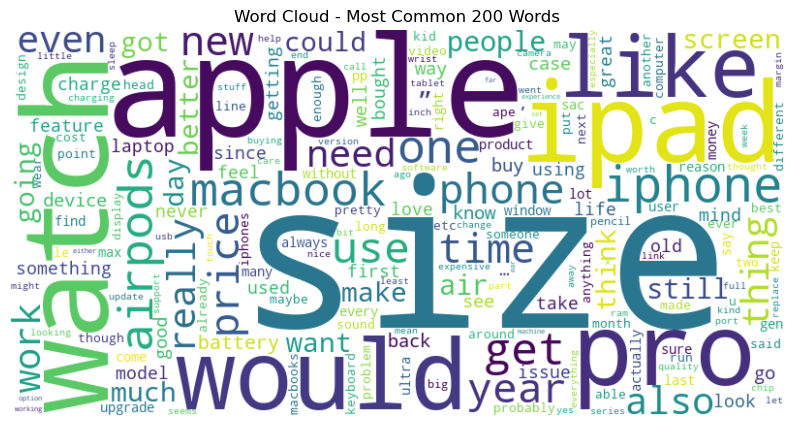

In [122]:
from wordcloud import WordCloud

all_comments = ' '.join(df['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words')
plt.show()


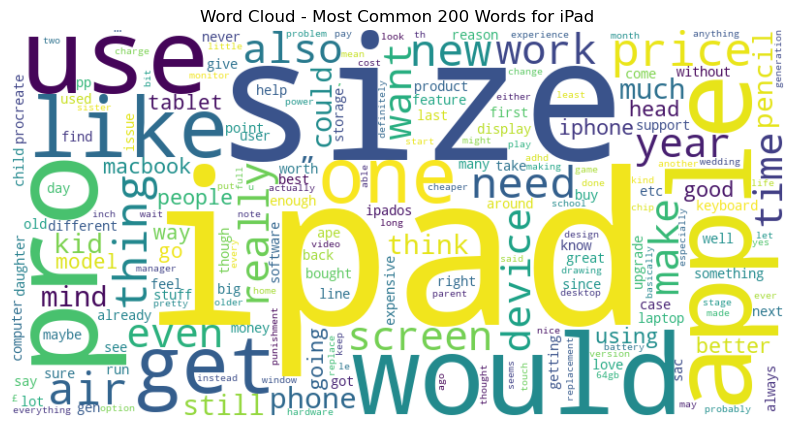

In [123]:
from wordcloud import WordCloud

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPad')
plt.show()


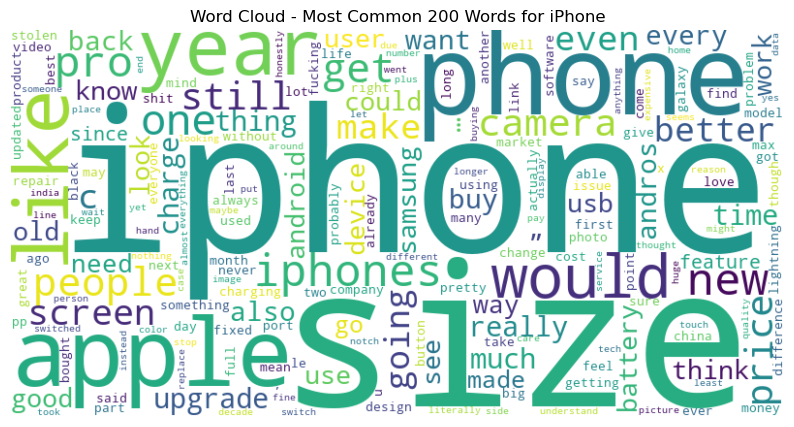

In [124]:
from wordcloud import WordCloud

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPhone')
plt.show()


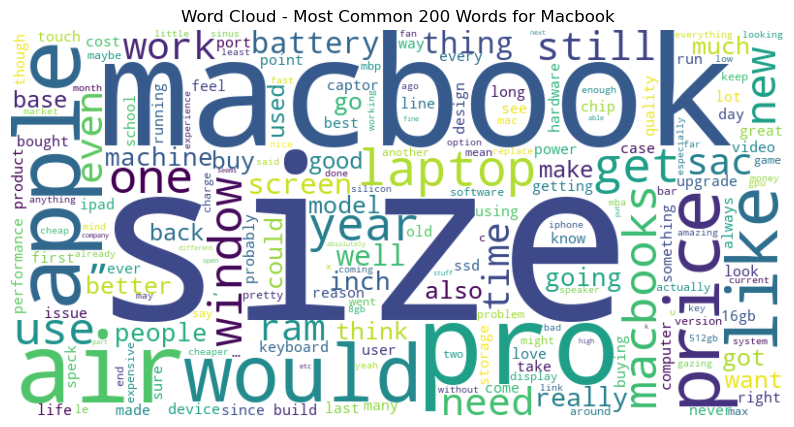

In [125]:
from wordcloud import WordCloud

all_comments = ' '.join(df_mac['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Macbook')
plt.show()


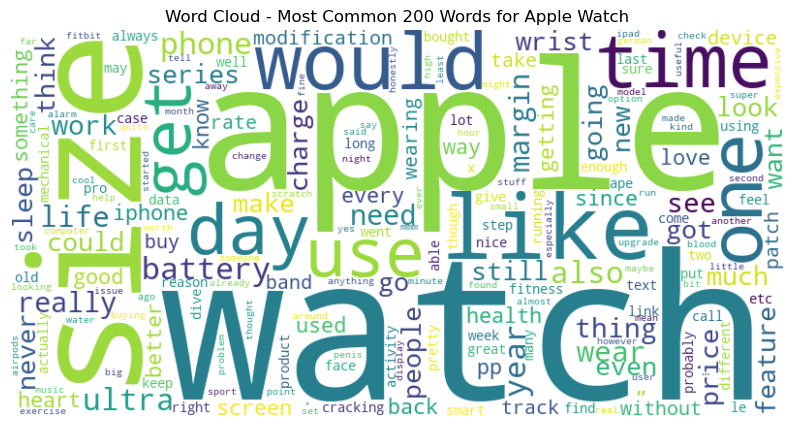

In [126]:
from wordcloud import WordCloud

all_comments = ' '.join(df_watch['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Apple Watch')
plt.show()


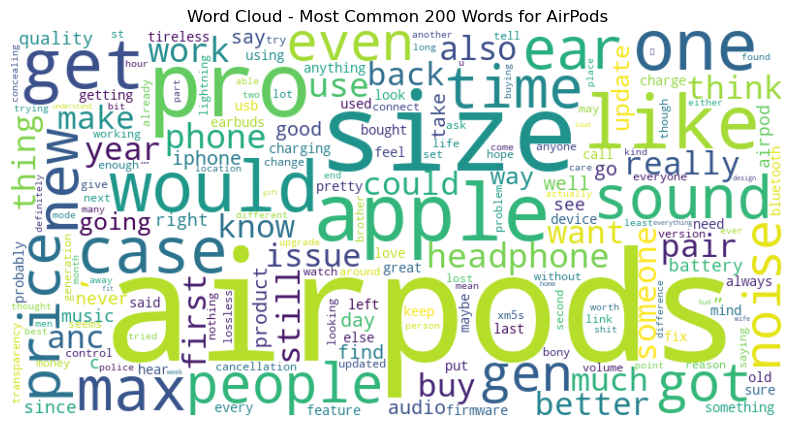

In [127]:
from wordcloud import WordCloud

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for AirPods')
plt.show()


**24. Extracting noun phrases with TextBlob**

In [128]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases:
size year: 122
pro size: 113
iphone size: 106
battery life: 58
series size: 52
new ipad: 49
macbook air: 47
size size: 46
size macbook: 44
apple product: 37


In [129]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_mac['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Macbook:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Macbook:
size macbook: 40
macbook air: 39
size year: 32
pro size: 26
new macbook: 20
size size: 16
size ”: 12
pro macbook: 12
size ” macbook: 11
apple product: 9


In [130]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPhone:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPhone:
iphone size: 94
new iphone: 30
pro max: 23
size year: 22
new phone: 22
usb c: 13
size size: 11
iphone user: 10
u c: 8
pro size: 7


In [157]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_watch['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 9 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(9)

# Print the results
print("9 most common noun phrases for Apple Watch:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


9 most common noun phrases for Apple Watch:
series size: 52
battery life: 39
apple patch: 25
size year: 22
heart rate: 22
new apple: 17
size day: 14
size month: 11
regular apple: 10


In [132]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPad:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPad:
new ipad: 48
size year: 38
pro size: 27
ipad air: 23
stage manager: 22
ipad size: 21
size ipad: 14
ipad mind: 14
apple pencil: 13
ipad procreate: 10


In [133]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for AirPods:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for AirPods:
pro size: 50
new airpods: 21
airpods max: 18
sound quality: 13
gen airpods: 13
pro ’: 11
airpods size: 10
usb c: 9
pair airpods: 9
size year: 8


**24. Performing the LDA Topic Modelling**

In [134]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_iphone['Tokenized_Comment'] = df_iphone['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_iphone['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_iphone['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_iphone['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_iphone['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_24259/2661475112.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Tokenized_Comment'] = df_iphone['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.046*"iphone" + 0.044*"size" + 0.019*"phone" + 0.013*"get" + 0.012*"year" + 0.011*"apple" + 0.010*"one" + 0.010*"still" + 0.009*"new" + 0.008*"people" | Comment Count: 207
Topic 1: 0.028*"iphone" + 0.028*"size" + 0.021*"apple" + 0.013*"phone" + 0.012*"iphones" + 0.010*"year" + 0.008*"device" + 0.007*"c" + 0.007*"charge" + 0.006*"usb" | Comment Count: 165
Topic 2: 0.040*"size" + 0.030*"iphone" + 0.014*"phone" + 0.013*"apple" + 0.011*"like" + 0.009*"price" + 0.009*"would" + 0.007*"camera" + 0.007*"screen" + 0.006*"thing" | Comment Count: 163
Topic 3: 0.042*"iphone" + 0.038*"size" + 0.014*"apple" + 0.012*"phone" + 0.010*"like" + 0.008*"would" + 0.008*"look" + 0.006*"iphones" + 0.006*"year" + 0.006*"back" | Comment Count: 155
Topic 4: 0.050*"iphone" + 0.044*"size" + 0.018*"phone" + 0.015*"pro" + 0.009*"new" + 0.009*"year" + 0.008*"would" + 0.008*"upgrade" + 0.007*"apple" + 0.007*"like" | Comment Count: 310


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_24259/2661475112.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


In [136]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_mac['Tokenized_Comment'] = df_mac['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_mac['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_mac['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_mac['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_mac['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_24259/2265032275.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Tokenized_Comment'] = df_mac['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.037*"size" + 0.033*"macbook" + 0.015*"pro" + 0.010*"laptop" + 0.009*"use" + 0.009*"get" + 0.008*"would" + 0.008*"window" + 0.007*"apple" + 0.006*"work" | Comment Count: 250
Topic 1: 0.025*"macbook" + 0.011*"would" + 0.010*"pro" + 0.009*"like" + 0.009*"apple" + 0.008*"size" + 0.007*"year" + 0.007*"macbooks" + 0.007*"got" + 0.007*"port" | Comment Count: 118
Topic 2: 0.015*"size" + 0.014*"macbook" + 0.010*"apple" + 0.009*"macbooks" + 0.007*"use" + 0.006*"like" + 0.006*"would" + 0.005*"thing" + 0.005*"one" + 0.005*"work" | Comment Count: 55
Topic 3: 0.065*"size" + 0.042*"macbook" + 0.022*"pro" + 0.020*"air" + 0.016*"price" + 0.013*"apple" + 0.012*"would" + 0.008*"”" + 0.008*"year" + 0.008*"new" | Comment Count: 520
Topic 4: 0.011*"macbook" + 0.010*"like" + 0.010*"sac" + 0.009*"macbooks" + 0.008*"window" + 0.006*"pro" + 0.006*"size" + 0.005*"laptop" + 0.005*"thing" + 0.005*"work" | Comment Count: 57


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_24259/2265032275.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


In [138]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_ipad['Tokenized_Comment'] = df_ipad['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_ipad['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_ipad['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_ipad['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_ipad['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_24259/1621576080.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Tokenized_Comment'] = df_ipad['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.046*"ipad" + 0.040*"size" + 0.022*"pro" + 0.013*"air" + 0.012*"use" + 0.011*"like" + 0.010*"would" + 0.009*"mind" + 0.007*"price" + 0.007*"device" | Comment Count: 254
Topic 1: 0.036*"ipad" + 0.015*"size" + 0.014*"would" + 0.013*"use" + 0.010*"one" + 0.008*"pro" + 0.007*"like" + 0.007*"get" + 0.007*"thing" + 0.006*"apple" | Comment Count: 299
Topic 2: 0.023*"ipad" + 0.013*"kid" + 0.012*"phone" + 0.011*"thing" + 0.008*"get" + 0.008*"size" + 0.008*"one" + 0.007*"like" + 0.007*"would" + 0.007*"time" | Comment Count: 153
Topic 3: 0.071*"size" + 0.029*"ipad" + 0.021*"pro" + 0.016*"apple" + 0.009*"iphone" + 0.009*"price" + 0.007*"new" + 0.006*"£" + 0.006*"model" + 0.006*"tablet" | Comment Count: 93
Topic 4: 0.030*"ipad" + 0.018*"apple" + 0.010*"size" + 0.009*"get" + 0.009*"price" + 0.008*"would" + 0.008*"new" + 0.008*"one" + 0.008*"like" + 0.006*"use" | Comment Count: 201


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_24259/1621576080.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


In [140]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_watch['Tokenized_Comment'] = df_watch['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_watch['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_watch['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_watch['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_watch['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_24259/1214900019.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Tokenized_Comment'] = df_watch['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.042*"size" + 0.034*"watch" + 0.031*"apple" + 0.009*"would" + 0.008*"like" + 0.006*"also" + 0.006*"one" + 0.006*"series" + 0.006*"look" + 0.006*"price" | Comment Count: 185
Topic 1: 0.043*"watch" + 0.038*"apple" + 0.021*"size" + 0.008*"get" + 0.007*"price" + 0.006*"link" + 0.006*"sleep" + 0.005*"time" + 0.005*"would" + 0.005*"health" | Comment Count: 152
Topic 2: 0.045*"apple" + 0.045*"watch" + 0.028*"size" + 0.013*"year" + 0.010*"like" + 0.009*"battery" + 0.008*"one" + 0.008*"margin" + 0.008*"life" + 0.007*"ultra" | Comment Count: 181
Topic 3: 0.023*"watch" + 0.021*"apple" + 0.017*"size" + 0.015*"battery" + 0.010*"life" + 0.008*"day" + 0.008*"need" + 0.008*"margin" + 0.008*"like" + 0.008*"time" | Comment Count: 64
Topic 4: 0.058*"watch" + 0.035*"apple" + 0.018*"size" + 0.011*"time" + 0.010*"would" + 0.009*"use" + 0.009*"like" + 0.009*"one" + 0.009*"day" + 0.009*"phone" | Comment Count: 418


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_24259/1214900019.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


In [142]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_airpods['Tokenized_Comment'] = df_airpods['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_airpods['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_airpods['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_airpods['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_airpods['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_24259/3152854227.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Tokenized_Comment'] = df_airpods['Cleaned_Comment'].apply(tokenize_text)


LDA Topics:
Topic 0: 0.050*"airpods" + 0.017*"apple" + 0.015*"size" + 0.011*"pro" + 0.011*"would" + 0.007*"one" + 0.007*"issue" + 0.007*"case" + 0.006*"new" + 0.006*"time" | Comment Count: 318
Topic 1: 0.043*"airpods" + 0.013*"max" + 0.010*"headphone" + 0.010*"like" + 0.009*"size" + 0.009*"case" + 0.008*"would" + 0.007*"price" + 0.006*"sound" + 0.006*"xm5s" | Comment Count: 148
Topic 2: 0.033*"airpods" + 0.028*"size" + 0.011*"like" + 0.010*"pro" + 0.010*"noise" + 0.008*"get" + 0.008*"got" + 0.007*"apple" + 0.007*"would" + 0.006*"even" | Comment Count: 203
Topic 3: 0.041*"airpods" + 0.016*"pro" + 0.011*"‌" + 0.009*"get" + 0.008*"case" + 0.007*"phone" + 0.006*"size" + 0.006*"know" + 0.005*"connect" + 0.005*"new" | Comment Count: 72
Topic 4: 0.043*"airpods" + 0.024*"size" + 0.018*"pro" + 0.013*"one" + 0.010*"ear" + 0.009*"gen" + 0.008*"like" + 0.008*"get" + 0.007*"price" + 0.007*"apple" | Comment Count: 259


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_24259/3152854227.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]


**25. Conduct a sentiment analysis with VADER model**

**25.1 iPhone**

In [143]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_iphone['SentimentScore_VADER'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_iphone['SentimentCategory_VADER'] = df_iphone['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_iphone[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/3845702056.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentScore_VADER'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/3845702056.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

Sentiment_Comment  SentimentScore_VADER  \
4000  # * * Stop personal photo and video from poppi...                0.9628   
4001  Took , I cannot fucking stand Apple products ....               -0.9682   
4002  I worked for Apple for most of a decade , incl...                0.9711   
4003  I have the lip , literally writing this commen...                0.9914   
4004  I switched to iPhone last year after trying an...                0.9835   
...                                                 ...                   ...   
4995  Of you take a stolen iPhone to apple to get it...               -0.7096   
4996  Very year iPhones have to return to their plac...                0.0000   
4997  The new phone are very boring and operative . ...               -0.6644   
4998  Yes ll , work in a phone shop and NEVER see bu...                0.7003   
4999  iphone X . I miss those rounded edges so much ...                0.7809   

     SentimentCategory_VADER  
4000                Positive  
4001                Negative  
4002                Positive  
4003                Positive  
4004                Positive  
...                      ...  
4995                Negative  
4996                 Neutral  
4997                Negative  
4998                Positive  
4999                Positive  

[1000 rows x 3 columns]

In [144]:
df_iphone.SentimentScore_VADER.describe()

count    1000.000000
mean        0.148891
std         0.530788
min        -0.996100
25%        -0.275500
50%         0.131050
75%         0.620825
max         0.991400
Name: SentimentScore_VADER, dtype: float64

In [145]:
sorted_df = df_iphone.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)

0 I have the flip, literally writing this comment on it.  After a year of use my review is thus:
1. I actually really like the folding capability and the type of material they use for the screen.  It feels really nice.  As someone who dropped their phone all the freaking time, I always had a cracked screen after 6 months with a phone, even with the expensive otterbox for that version of phone.  With the flip it protects the interior screen, and it's made out of a plastic instead of glass so it won't really Crack, it is more susceptible to scratching though.
2.  They NEED better screen protectors, the phone itself is fine, but I have yet to get a screen protector that doesn't get air bubbles under it or rip at the fold.  Also the exterior screen didn't come with one and now it's scratched.
3. I like having it folded to talk on speakerphone, feels more like talking on a radio or something than a phone
4. I absolutely love being able to use the flashlight and setting it down in a half ope

In [146]:
sorted_df = df_iphone.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)

0 Apple users are so dumb. "Oh BuT I cAn SeE tHe ThIeF oN "FiNd My GaY iPhOnE!!!"  

What you don't realize is that when your phone gets stolen, the actual thief turns the phone off instantly and then restores it on iTunes/music and then turns off the location services, if they know what they are doing. 

After they do this they very quickly sell the phone to someone who buys iphones with blocked IMEI numbers. From there, the phone gets sold to china where they know how to bypass any security measures. 

The reason the cops can't do anything about stolen devices is because the item has most likely already been sold to someone else who has no clue it was stolen to begin with. 

There was a video on youtube about a dude who's iphone got stolen. He was tracking the iphone with the "Find my Gay iPhone" app. He ended up finding the person with the phone and beat him up real bad. The guy actually had no clue it was stolen, he was just some dude who bought the phone from someone else. The dud

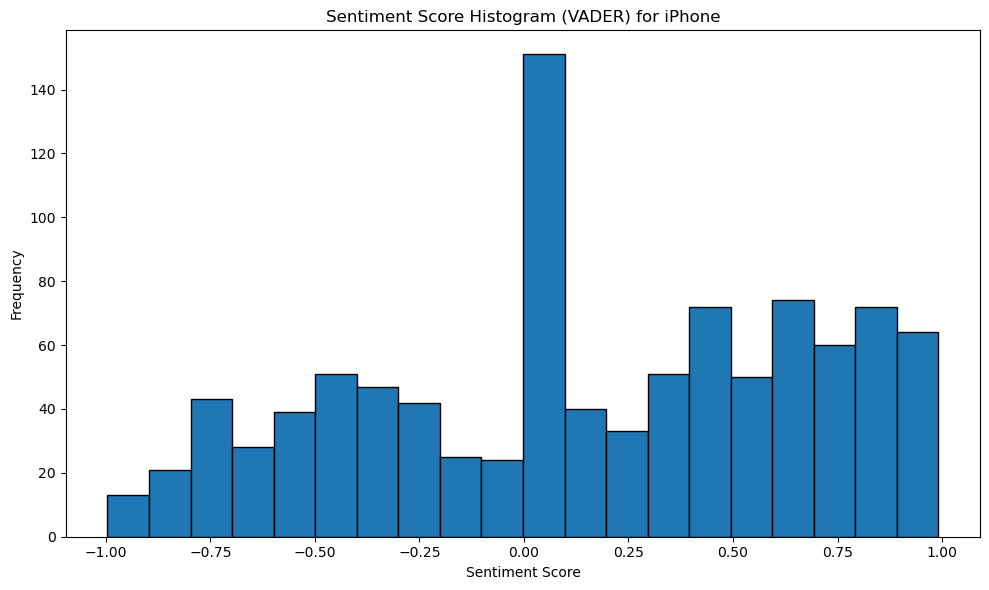

In [147]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_iphone['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.2 Macbook**

In [148]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_mac['SentimentScore_VADER'] = df_mac['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_mac['SentimentCategory_VADER'] = df_mac['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_mac[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/2233685362.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentScore_VADER'] = df_mac['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/2233685362.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac[

Sentiment_Comment  SentimentScore_VADER  \
2000  > is the Of that much better than the Of ? Its...                0.9984   
2001  Feeling electricity or a mild electrical sensa...                0.9478   
2002  Eight is a big deal . To not you want to take ...                0.9726   
2003  The hardware " build quality " everybody rates...                0.8916   
2004  I guns . of here . He currently use Kandji as ...                0.9778   
...                                                 ...                   ...   
2995  Late MacBook batteries when they do this ! Mus...                0.0000   
2996  Why do not you just save up for an Of MacBook ...               -0.3875   
2997  Damn I Am staring to get confused with Macbook...               -0.6124   
2998  I once used a whole ass window of unit to cool...               -0.2960   
2999  Too close to the price of the [ SIZE ] ” MacBo...               -0.1027   

     SentimentCategory_VADER  
2000                Positive  
2001                Positive  
2002                Positive  
2003                Positive  
2004                Positive  
...                      ...  
2995                 Neutral  
2996                Negative  
2997                Negative  
2998                Negative  
2999                Negative  

[1000 rows x 3 columns]

In [149]:
df_mac.SentimentScore_VADER.describe()

count    1000.000000
mean        0.249220
std         0.534401
min        -0.956100
25%        -0.128000
50%         0.350600
75%         0.726750
max         0.998400
Name: SentimentScore_VADER, dtype: float64

In [150]:
sorted_df = df_mac.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)

0 >is the M2 that much better than the M1? 

Its better. Matter of opinion if its 'that much better'. 

>Do you honestly think it’s worth the extra $200? 

I think the base model is worth $1000. Sucks that Apple is starting the price at $1200.  
I'd say its worth it though in that the new design looks quite good. The keyboard is very comfortable to type on. The slightly taller screen is very nice even if its just to place the menu bar, you are still getting a bit more screen space for the desktop. The webcam is nicer. The M2 is very impressive and a tad better in performance than the M1. The battery life is truly amazing. The new color options are very stylish. 

>I keep hearing that they only support their laptops for like 5 yrs, so I’m assuming they will support their M2 for a longer period of time.

Yea, in recent times, Apple has given devices a solid 5 years of OS support. Potentially a good 7 years depending on how drastically different the newer OS iterations will be by that poi

In [151]:
sorted_df = df_mac.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)

0 I don’t understand why this is a thing. A metal chassis is either grounded or it’s supposed to be at ground potential and connected to circuit ground, which in DC circuits should be at zero volts and should be traveling out of the “ground” or negative line back to the power supply. Feeling current when touching it means the chassis/PSU is no longer the path of least resistance, *you* are. Current always follows the path of least resistance. 

In the US, the third “ground” plug doesn’t actually go back to earth anywhere, it’s simply a short circuit path back to the neutral so that stray AC currents that touch the chassis go back to neutral, and theoretically pop the breaker if they’re bad enough. If the MacBook doesn’t do this when connected to the third pin in a “grounded” plug, then there are stray currents leaking in the MacBook and there’s something wrong with the PSU design. “My Dell does it too” as some commenters have said isn’t an excuse as much as it is indicative of an indus

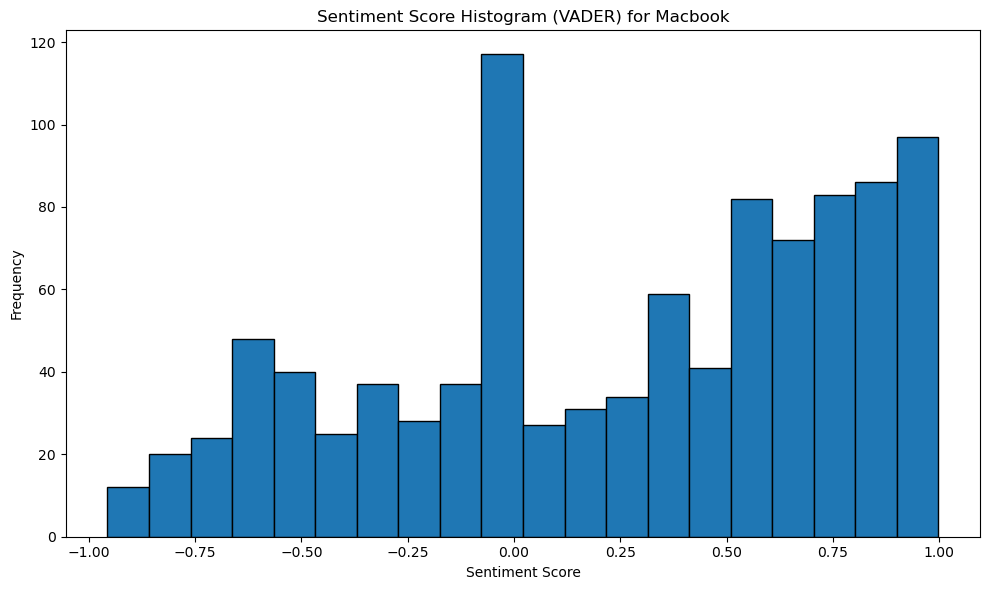

In [152]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_mac['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.3 iPad**

In [153]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_ipad['SentimentScore_VADER'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_ipad['SentimentCategory_VADER'] = df_ipad['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_ipad[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/571326633.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentScore_VADER'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/571326633.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad

Sentiment_Comment  SentimentScore_VADER  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...                0.9975   
3001  Not To say , I disagree pretty whole - heartil...                0.9990   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...                0.9985   
3003  * * " There is no bad product , just bad price...                0.9933   
3004  I think you answered your own question . Of pu...               -0.9916   
...                                                 ...                   ...   
3995  Of you moderately push on the right side of th...                0.1280   
3996  Result : Yelled at / grounded / no video games...               -0.8706   
3997  I am beyond impressed with mine . The older i ...                0.7783   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...                0.4840   
3999  I had this exact same thing happen to me a few...                0.2732   

     SentimentCategory_VADER  
3000                Positive  
3001                Positive  
3002                Positive  
3003                Positive  
3004                Negative  
...                      ...  
3995                Positive  
3996                Negative  
3997                Positive  
3998                Positive  
3999                Positive  

[1000 rows x 3 columns]

In [154]:
df_ipad.SentimentScore_VADER.describe()

count    1000.000000
mean        0.305736
std         0.655005
min        -0.994800
25%        -0.310025
50%         0.564400
75%         0.882175
max         0.999000
Name: SentimentScore_VADER, dtype: float64

In [155]:
sorted_df = df_ipad.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)

0 Gotta say, I disagree pretty whole-heartedly with this article. I have been really enjoying stage manager, and it actually convinced me not to get the new MacBook Air (I’ve been living without a personal Mac for a while now, considering my iPad is already better than my 2015 MacBook).

>	An iPad that lets users run as many windows on one screen as they want, like a Mac, would be terrific

Yea, that’d be nice if it worked well. Apple claims it doesn’t, and that they have to limit the number of running apps so that every app remains immediately responsive to touch no matter the circumstances. That’s an important goal in my opinion, though I can’t comment on how truthful their claim is that you can’t go beyond their limits without breaking that promise. I do think that they probably should let you have 8 to a group, at least in full screen mode - I find that the iPad screen itself isn’t very useful when plugged in and would rather put all 8 of my apps on the external monitor.

>	The abi

In [156]:
sorted_df = df_ipad.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)

0 Apple terms of Vintage is SEVEN years and Obsolete is NINE years. This applies to computers and i-devices.

I have an iPad Air that was three years old, and one month past Applecare+ warranty. It stopped charging. The power management chip failed and would cost $300 to repair, or send it out to a 3rd party for $250 repair + sh. It was $349 to replace with newer model (still working). I swear Apple knew of this power management chip issue but no recall ever occurred. 

 I seem to be accumulating Apple junk... (dead iPad, dead iPods, dead iphones, dead iMac, dead MacbookAir, dead macbook (white), dead G4 and G5 Macpro... )..
1 I think you answered your own question. If punishment for situations like this caused you lifelong guilt, why would you want your child who shares your disorder to have lifelong guilt or worse as well?

I was completely undiagnosed as a child so my situation was different from your child, who you know has ADHD. I also know this next part is probably easier said t

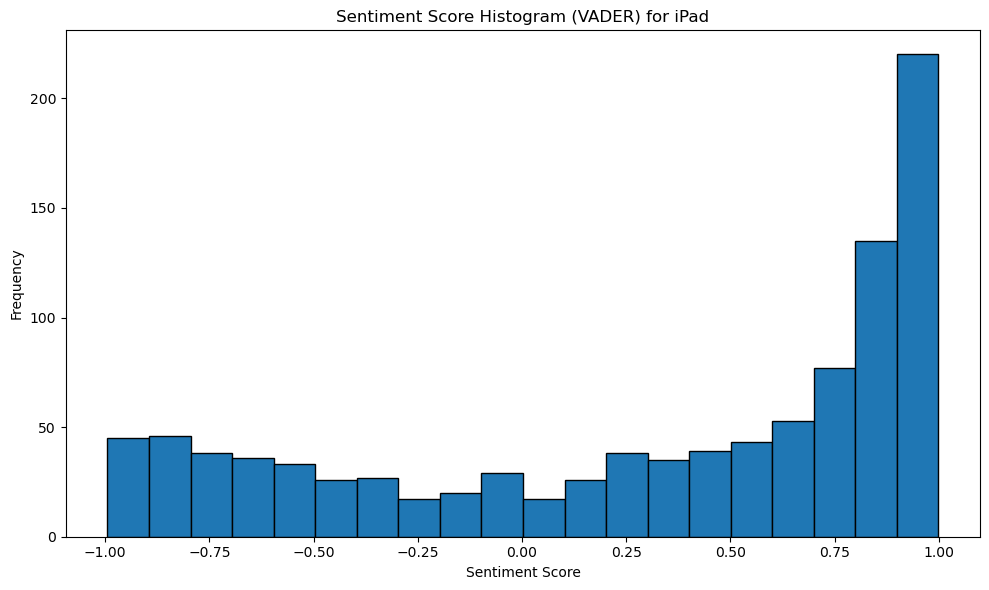

In [157]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_ipad['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.4 AirPods**

In [158]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_airpods['SentimentScore_VADER'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_airpods['SentimentCategory_VADER'] = df_airpods['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_airpods[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1128605631.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentScore_VADER'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1128605631.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

Sentiment_Comment  SentimentScore_VADER  \
0    Comparing these to my AirPods Max … Bony has b...                0.9995   
1    His was a mistake . But it is [ SIZE ] % your ...               -0.9929   
2    Wait so the only person who cared enough about...                0.7199   
3    Picked up the Fro gen is today as well , migra...                0.9845   
4    I all , I would like to warn anyone buying Air...                0.9808   
..                                                 ...                   ...   
995  You want to ruin your hearing , wear airpods w...               -0.5423   
996  In india airpods are for [ SIZE ] $ after so m...                0.0000   
997  Must throw on transparent mode and your AirPod...                0.0000   
998  when i drop it , the airpods always fall out o...               -0.2732   
999  Would love to see the ability to play losses o...                0.7351   

    SentimentCategory_VADER  
0                  Positive  
1                  Negative  
2                  Positive  
3                  Positive  
4                  Positive  
..                      ...  
995                Negative  
996                 Neutral  
997                 Neutral  
998                Negative  
999                Positive  

[1000 rows x 3 columns]

In [159]:
df_airpods.SentimentScore_VADER.describe()

count    1000.000000
mean        0.111140
std         0.542497
min        -0.992900
25%        -0.320375
50%         0.103200
75%         0.579050
max         0.999500
Name: SentimentScore_VADER, dtype: float64

In [160]:
sorted_df = df_airpods.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)

  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
In conclusion, the AirPods Max and Sony XM5 are at the top. It really boils down to this despite the differences between the two... If you have an iPhone, get the AirPods Max. If you have an Android phone, get the Sony XM5s.
1 Lossless support/better sound quality would be nice, but honestly I’ve never found myself for wishing for that - my AirPods are great at being an awesome portable experience, if I want great audio quality I just sit at my desk with a good pair of over-head headphones. Not that I’m complaining but I don’t think I would see it as a reason to upgrade.  

Proper Find My integration would be great, hopefully it’s not just the case being able to make a sound but also the location tracking. It would be amazing to have it for the buds as well but I doubt the hardware can be scaled down that much. Still unless the design changes a lot I can see Apple also just selling the upgraded case.  

I do wish they focuses 

In [161]:
sorted_df = df_airpods.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)

0 This was a mistake. But it’s 99% your wife’s mistake. You left your AirPods in your own lunchbox, you’re wife doesn’t usually clean it for you, and there was no reason you should have anticipated she would in this situation. So if you want the validation of an internet stranger you got it. 

But if your wife doesn’t want to admit it and wants to blame you, then you have to ask yourself what is more important to you. Take the L and move on (knowing deep down that you aren’t to blame) or force the issue and have at least a conversation with your wife. I’m not saying one is definitely better than the other. It depends on a lot more than this one incident, and I’d think about the following:

Is this normal for your wife? Does she usually seek to assign blame for accidents and does she usually assign the blame to you? Does she normally take accountability when she does something wrong? If this is out of character then ask yourself why it’s important for her in this moment to blame you. Is

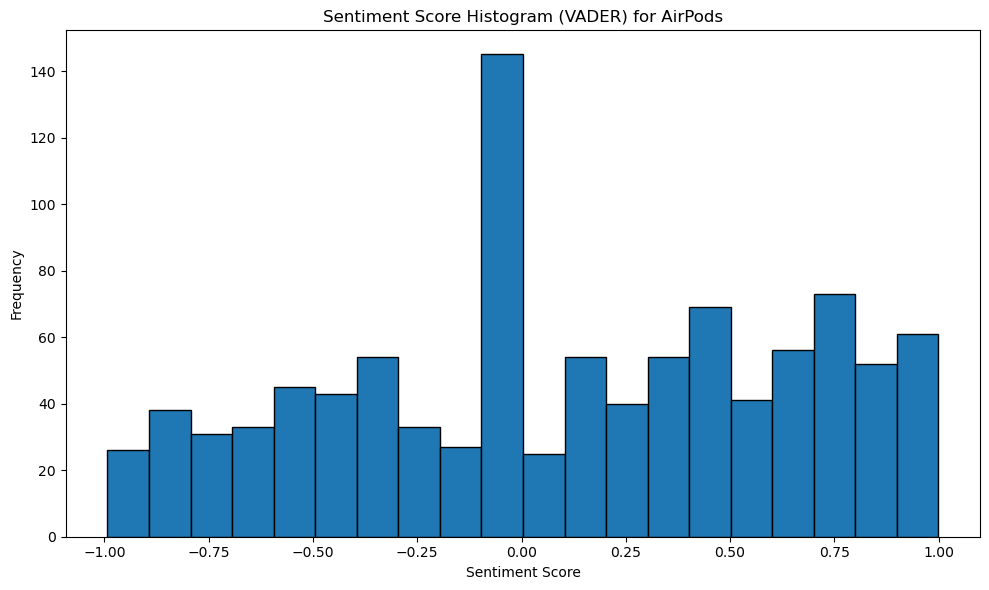

In [162]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_airpods['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.5 Apple Watch**

In [163]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_watch['SentimentScore_VADER'] = df_watch['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_watch['SentimentCategory_VADER'] = df_watch['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_watch[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1356089718.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentScore_VADER'] = df_watch['Sentiment_Comment'].apply(get_sentiment_score)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1356089718.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_

Sentiment_Comment  SentimentScore_VADER  \
1000  It this point it is really a matter of prefere...                0.9975   
1001  Honestly , this is difficult to answer . Until...                0.9918   
1002  Smart watch enthusiast here , I have been usin...                0.9966   
1003  I discovered this year that I have had insomni...               -0.8367   
1004  Aimed engineer here and boy do I got several p...                0.9108   
...                                                 ...                   ...   
1995  I love my Apple Watch ! When I worked in the h...                0.6114   
1996  Why is generally apple watch battery life so l...                0.5265   
1997  I am buying it for the bigger size . Wounds si...                0.6187   
1998  Of you want a Apple Watch you do not have to b...               -0.6486   
1999  Had take . I work in finance and [ SIZE ] % of...                0.6088   

     SentimentCategory_VADER  
1000                Positive  
1001                Positive  
1002                Positive  
1003                Negative  
1004                Positive  
...                      ...  
1995                Positive  
1996                Positive  
1997                Positive  
1998                Negative  
1999                Positive  

[1000 rows x 3 columns]

In [164]:
df_watch.SentimentScore_VADER.describe()

count    1000.000000
mean        0.341552
std         0.558863
min        -0.990100
25%         0.000000
50%         0.508300
75%         0.816275
max         0.997500
Name: SentimentScore_VADER, dtype: float64

In [165]:
sorted_df = df_watch.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)

0 At this point it's really a matter of preference and platform.

Garmin has a special place in my heart as my first Garmin I had 10 years ago I used to train for a marathon, which then realized was too much work and backed out last minute and ran the 5K and got first place for my age group. But the thing is, there was no metrics out side of just distance. Not even heart rate.

I've tried 3 different Garmin over the last year (Fenix 6, Forerunner 245 Music, Forerunner 955) and after the initial excitement wears off, I just don't think the value is there. I continue to have the original instinct, which bye far is my favorite watch I every owned and wear it occasionally. Body battery, readiness, training status are all great things, but anyone who is mildly seriously about fitness is pretty good about knowing how they feel. If my watch says I'm not ready, but I feel good and I know I can rest appropriately in the day after, I'm going to run. As mentioned, alot of the metrics on Garmin ar

In [166]:
sorted_df = df_watch.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)

0 My doctors completely dismissed my PoTS and heart problems until I got an Apple Watch. I got the watch to track my exercises and overall daily activity, but it showed my HR going up to 170 and dropping to 25 right as I had a fainting episode. I am so glad I finally had proof of my heart problems.

I went to three different doctors at my doctors office. The doctors kept dismissing me when I said I had chest pains and was blacking out. They said it was anxiety and panic. I was like “I know what anxiety and panic attacks feel like, this is not it.” 

Never let your general practitioners or specialists know you have PTSD. It doesn’t matter that lifelong child abuse is actually linked to multiple illnesses and lifelong physical health problems. They will only use it to dismiss and invalidate you. I ended up having multiple heart problems. Probably because I was exposed to meth as an infant and toddler. I have had symptoms my entire life but I didn’t know what they meant, and everyone just

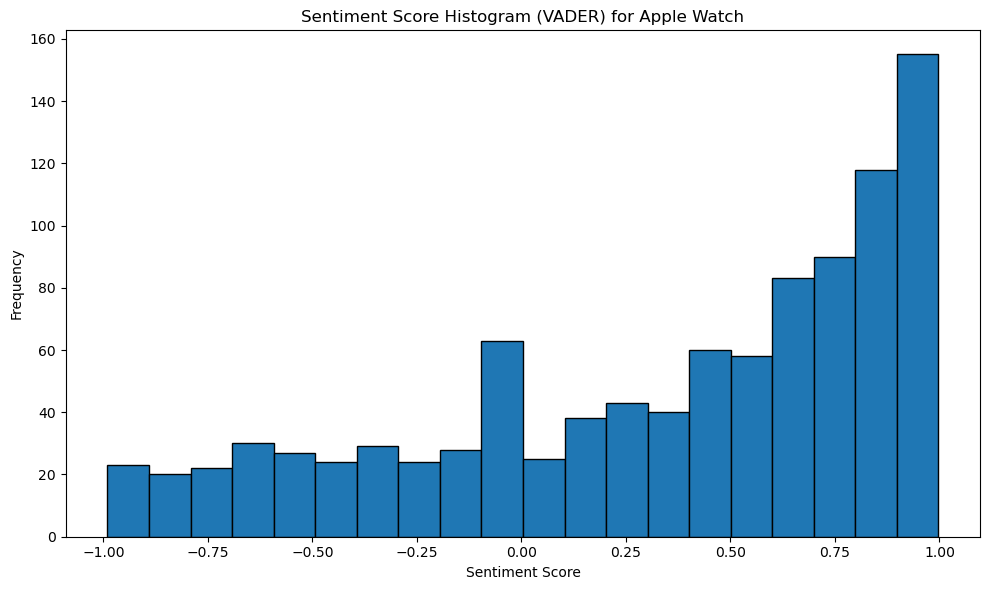

In [167]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_watch['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**26. Conduct a sentiment analysis with NaiveBayesAnalyzer**

***26.1. iPhone***

In [168]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
nltk.download('movie_reviews')

def get_sentiment_textblob(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    sentiment = blob.sentiment
    if sentiment.p_pos >= 0.6:
        return "Positive"
    elif sentiment.p_neg >= 0.6:
        return "Negative"
    return "Neutral"

df_iphone['SentimentCategory_Bayes'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_textblob)

df_iphone[['Sentiment_Comment', 'SentimentCategory_Bayes']]


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/2934576485.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentCategory_Bayes'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
4000  # * * Stop personal photo and video from poppi...   
4001  Took , I cannot fucking stand Apple products ....   
4002  I worked for Apple for most of a decade , incl...   
4003  I have the lip , literally writing this commen...   
4004  I switched to iPhone last year after trying an...   
...                                                 ...   
4995  Of you take a stolen iPhone to apple to get it...   
4996  Very year iPhones have to return to their plac...   
4997  The new phone are very boring and operative . ...   
4998  Yes ll , work in a phone shop and NEVER see bu...   
4999  iphone X . I miss those rounded edges so much ...   

     SentimentCategory_Bayes  
4000                Positive  
4001                Negative  
4002                Positive  
4003                Positive  
4004                Positive  
...                      ...  
4995                Positive  
4996                Positive  
4997                Negative  
4998                Negative  
4999                Positive  

[1000 rows x 2 columns]

In [169]:
df_iphone[df_iphone.SentimentCategory_Bayes != df_iphone.SentimentCategory_VADER]

Search                                            Comment  \
4005  iPhone  Apple users are so dumb. "Oh BuT I cAn SeE tHe...   
4007  iPhone  I'm sick of brain dead Apple fans thinking the...   
4009  iPhone  Very interesting. I don't think this should ha...   
4010  iPhone  From the article: The Brazilian Ministry of Ju...   
4012  iPhone  >\tStaab issued the search warrant the day aft...   
...      ...                                                ...   
4991  iPhone  This is misleading, action mode on the new iPh...   
4993  iPhone  I love how the iPhone looks like it has a crac...   
4995  iPhone  If you take a stolen iPhone to apple to get it...   
4996  iPhone  Every year iPhones have to return to their pla...   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   

                                        Cleaned_Comment  \
4005  apple user dumb oh thief iphone realize phone ...   
4007  sick brain dead apple fan thinking upgrade eve...   
4009  interesting think happen device know community...   
4010  article brazilian ministry justice ordered sep...   
4012  stab issued search warrant day white truck tex...   
...                                                 ...   
4991  misleading action mode new iphone good stabili...   
4993  love iphone look like crack screen true classi...   
4995      take stolen iphone apple get repaired fault ‍   
4996  year iphones return place birth annual celebra...   
4998  yes work phone shop never see burn iphone … proud   

                                      Sentiment_Comment  Length  \
4005  Apple users are so dumb . " Oh but I can he th...    1549   
4007  I am sick of brain dead Apple fan thinking the...    1530   
4009  Very interesting . I do not think this should ...    1405   
4010  From the article : The Brazilian Ministry of J...    1349   
4012  > Stab issued the search warrant the day after...    1161   
...                                                 ...     ...   
4991  His is misleading , action mode on the new iPh...      84   
4993  I love how the iPhone looks like it has a crac...      84   
4995  Of you take a stolen iPhone to apple to get it...      83   
4996  Very year iPhones have to return to their plac...      83   
4998  Yes ll , work in a phone shop and NEVER see bu...      83   

                                      Tokenized_Comment  Topic  \
4005  [apple, user, dumb, oh, thief, iphone, realize...      3   
4007  [sick, brain, dead, apple, fan, thinking, upgr...      3   
4009  [interesting, think, happen, device, know, com...      3   
4010  [article, brazilian, ministry, justice, ordere...      3   
4012  [stab, issued, search, warrant, day, white, tr...      1   
...                                                 ...    ...   
4991  [misleading, action, mode, new, iphone, good, ...      3   
4993  [love, iphone, look, like, crack, screen, true...      2   
4995  [take, stolen, iphone, apple, get, repaired, f...      3   
4996  [year, iphones, return, place, birth, annual, ...      3   
4998  [yes, work, phone, shop, never, see, burn, iph...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
4005               -0.9961                Negative                Positive  
4007               -0.9419                Negative                Positive  
4009               -0.2361                Negative                 Neutral  
4010               -0.2500                Negative                Positive  
4012               -0.8930                Negative                Positive  
...                    ...                     ...                     ...  
4991                0.1263                Positive                 Neutral  
4993                0.8687                Positive                 Neutral  
4995               -0.7096                Negative                Positive  
4996                0.0000                 Neutral                Positive  
4998                0.7003                Posit

***26.2. Macbook***

In [170]:
df_mac['SentimentCategory_Bayes'] = df_mac['Sentiment_Comment'].apply(get_sentiment_textblob)

df_mac[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/3820655831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentCategory_Bayes'] = df_mac['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
2000  > is the Of that much better than the Of ? Its...   
2001  Feeling electricity or a mild electrical sensa...   
2002  Eight is a big deal . To not you want to take ...   
2003  The hardware " build quality " everybody rates...   
2004  I guns . of here . He currently use Kandji as ...   
...                                                 ...   
2995  Late MacBook batteries when they do this ! Mus...   
2996  Why do not you just save up for an Of MacBook ...   
2997  Damn I Am staring to get confused with Macbook...   
2998  I once used a whole ass window of unit to cool...   
2999  Too close to the price of the [ SIZE ] ” MacBo...   

     SentimentCategory_Bayes  
2000                Positive  
2001                Positive  
2002                Positive  
2003                Positive  
2004                Positive  
...                      ...  
2995                Negative  
2996                Negative  
2997                 Neutral  
2998                Negative  
2999                Positive  

[1000 rows x 2 columns]

In [171]:
df_mac[df_mac.SentimentCategory_Bayes != df_mac.SentimentCategory_VADER]

Search                                            Comment  \
2007  Macbook  I've been very disappointed by reviews being t...   
2009  Macbook  I don't like the black - I like the space grey...   
2017  Macbook  I actually got a free MacBook Pro upgrade from...   
2020  Macbook  This era of MBP is literally the worst era of ...   
2028  Macbook  It's not just about the hardware and the price...   
...       ...                                                ...   
2992  Macbook  The base 14" is just a MacBook with Pro tacked...   
2994  Macbook  \*laughes as my 2018 macbook pro throttles dow...   
2995  Macbook  Hate MacBook batteries when they do this! Just...   
2997  Macbook  Damn Im staring to get confused with Macbook l...   
2999  Macbook  Too close to the price of the 14” MacBook Pro ...   

                                        Cleaned_Comment  \
2007  disappointed review complacent apple charging ...   
2009  like black like space grey unique boring capto...   
2017  actually got free macbook fro upgrade exact th...   
2020  era mbp literally worst era macbook fro touchb...   
2028  hardware price edu market passively cheap chro...   
...                                                 ...   
2992  base size macbook fro tacked marketing reason ...   
2994  laughed size macbook pro throttle 800mhz size ...   
2995  late macbook battery must paid size old sac ba...   
2997  damn staring get confused macbook line imagine...   
2999  close price size ” macbook fro would rather pa...   

                                      Sentiment_Comment  Length  \
2007  I have been very disappointed by reviews being...    1529   
2009  I do not like the black - I like the space gre...    1459   
2017  I actually got a free MacBook Fro upgrade from...    1234   
2020  His era of MBP is literally the worst era of M...    1179   
2028  It is not just about the hardware and the pric...    1057   
...                                                 ...     ...   
2992  The base [ SIZE ] " is just a MacBook with Fro...      92   
2994  \ * laughed as my [ SIZE ] macbook pro throttl...      92   
2995  Late MacBook batteries when they do this ! Mus...      92   
2997  Damn I Am staring to get confused with Macbook...      92   
2999  Too close to the price of the [ SIZE ] ” MacBo...      92   

                                      Tokenized_Comment  Topic  \
2007  [disappointed, review, complacent, apple, char...      3   
2009  [like, black, like, space, grey, unique, borin...      3   
2017  [actually, got, free, macbook, fro, upgrade, e...      0   
2020  [era, mbp, literally, worst, era, macbook, fro...      4   
2028  [hardware, price, edu, market, passively, chea...      3   
...                                                 ...    ...   
2992  [base, size, macbook, fro, tacked, marketing, ...      4   
2994  [laughed, size, macbook, pro, throttle, 800mhz...      4   
2995  [late, macbook, battery, must, paid, size, old...      2   
2997  [damn, staring, get, confused, macbook, line, ...      1   
2999  [close, price, size, ”, macbook, fro, would, r...      2   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
2007               -0.8478                Negative                Positive  
2009               -0.8595                Negative                Positive  
2017               -0.8551                Negative                Positive  
2020                0.7493                Positive                Negative  
2028                0.5927                Positive                 Neutral  
...                    ...                     ...                     ...  
2992                0.0000                 Neutral                Positive  
2994                0.4588                Positive                Negative  
2995                0.0000                 Neutral                Negative  
2997               -0.6124                Negative                 Neutral  
2999               -0.1027          

***26.3. iPad***

In [172]:
df_ipad['SentimentCategory_Bayes'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_textblob)

df_ipad[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/691724193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentCategory_Bayes'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...   
3001  Not To say , I disagree pretty whole - heartil...   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...   
3003  * * " There is no bad product , just bad price...   
3004  I think you answered your own question . Of pu...   
...                                                 ...   
3995  Of you moderately push on the right side of th...   
3996  Result : Yelled at / grounded / no video games...   
3997  I am beyond impressed with mine . The older i ...   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...   
3999  I had this exact same thing happen to me a few...   

     SentimentCategory_Bayes  
3000                Positive  
3001                Positive  
3002                Positive  
3003                Positive  
3004                Positive  
...                      ...  
3995                 Neutral  
3996                Negative  
3997                Positive  
3998                Positive  
3999                Positive  

[1000 rows x 2 columns]

In [173]:
df_ipad[df_ipad.SentimentCategory_Bayes != df_ipad.SentimentCategory_VADER]

Search                                            Comment  \
3004   iPad  I think you answered your own question. If pun...   
3009   iPad  I think sitting down with her and talking abou...   
3013   iPad  Gonna go against the grain on this one, may be...   
3017   iPad  This, probably, requires a little bit of infor...   
3019   iPad  Im about to totally change how you parent. \nT...   
...     ...                                                ...   
3990   iPad  Best bet if there was money to be made by offe...   
3991   iPad  Keeping the 1st Gen Pencil and old Smart Conne...   
3992   iPad  Imma hold on to this iPad Pro 2020 and my iPho...   
3993   iPad  unnecessary cord. the new ipad comes with a ti...   
3995   iPad  If you moderately push on the right side of th...   

                                        Cleaned_Comment  \
3004  think answered question punishment situation l...   
3009  think sitting talking frustration breaking thi...   
3013  going go grain one may downvoted hell reading ...   
3017  probably requires little bit information advan...   
3019  totally change parent difference punishment di...   
...                                                 ...   
3990  west bet money made offering would data know m...   
3991  keeping st men pencil old smart connector make...   
3992  going hold ipad fro size iphone12 long new stu...   
3993  unnecessary cord new ipad come tiny adapted li...   
3995  moderately push right side back ipad air get r...   

                                      Sentiment_Comment  Length  \
3004  I think you answered your own question . Of pu...    3477   
3009  I think sitting down with her and talking abou...    2526   
3013  Going To go against the grain on this one , ma...    2211   
3017  His , probably , requires a little bit of info...    1992   
3019  I Am about to totally change how you parent . ...    1848   
...                                                 ...     ...   
3990  West bet if there was money to be made by offe...     288   
3991  Keeping the st Men Pencil and old Smart Connec...     287   
3992  I Am Going To hold on to this iPad Fro [ SIZE ...     287   
3993  unnecessary cord . the new ipad comes with a t...     287   
3995  Of you moderately push on the right side of th...     286   

                                      Tokenized_Comment  Topic  \
3004  [think, answered, question, punishment, situat...      2   
3009  [think, sitting, talking, frustration, breakin...      3   
3013  [going, go, grain, one, may, downvoted, hell, ...      3   
3017  [probably, requires, little, bit, information,...      3   
3019  [totally, change, parent, difference, punishme...      2   
...                                                 ...    ...   
3990  [west, bet, money, made, offering, would, data...      2   
3991  [keeping, st, men, pencil, old, smart, connect...      1   
3992  [going, hold, ipad, fro, size, iphone12, long,...      0   
3993  [unnecessary, cord, new, ipad, come, tiny, ada...      1   
3995  [moderately, push, right, side, back, ipad, ai...      1   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
3004               -0.9916                Negative                Positive  
3009                0.9957                Positive                Negative  
3013               -0.6161                Negative                Positive  
3017               -0.8622                Negative                Positive  
3019               -0.8911                Negative                Positive  
...                    ...                     ...                     ...  
3990               -0.4019                Negative                Positive  
3991               -0.2732                Negative                Positive  
3992                0.0000                 Neutral                Positive  
3993               -0.3612                Negative                Positive  
3995                0.1280                Positive        

***26.4. AirPods***

In [174]:
df_airpods['SentimentCategory_Bayes'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_textblob)

df_airpods[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/2190496483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentCategory_Bayes'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment SentimentCategory_Bayes
0    Comparing these to my AirPods Max … Bony has b...                Positive
1    His was a mistake . But it is [ SIZE ] % your ...                Positive
2    Wait so the only person who cared enough about...                Positive
3    Picked up the Fro gen is today as well , migra...                Positive
4    I all , I would like to warn anyone buying Air...                Positive
..                                                 ...                     ...
995  You want to ruin your hearing , wear airpods w...                 Neutral
996  In india airpods are for [ SIZE ] $ after so m...                Positive
997  Must throw on transparent mode and your AirPod...                Negative
998  when i drop it , the airpods always fall out o...                 Neutral
999  Would love to see the ability to play losses o...                Positive

[1000 rows x 2 columns]

In [175]:
df_airpods[df_airpods.SentimentCategory_Bayes != df_airpods.SentimentCategory_VADER]

Search                                            Comment  \
1    AirPods  This was a mistake. But it’s 99% your wife’s m...   
14   AirPods  I had issues with multiple pairs of these, fro...   
18   AirPods  We’re having the same issue in my hospital wit...   
22   AirPods  As a HUC, I had a preceptee taking personal ca...   
25   AirPods  From the article: Apple may be using the Septe...   
..       ...                                                ...   
994  AirPods  If you ever drop your AirPods into the Aegean ...   
995  AirPods  You want to ruin your hearing, wear airpods wh...   
996  AirPods  In india airpods are for 250$ after so many ta...   
997  AirPods  Just throw on transparency mode and your AirPo...   
998  AirPods  when i drop it, the airpods always fall out of...   

                                       Cleaned_Comment  \
1    mistake size wife ’ mistake left airpods lunch...   
14   issue multiple pair time bought december size ...   
18   issue hospital ev wear headphone coemnintkt ro...   
22   huc precept taking personal call desk airpods ...   
25   article apple may using september size iphone ...   
..                                                 ...   
994        ever drop airpods began tea let go man gone   
995  want ruin hearing wear airpods get ratificatio...   
996  india airpods size many tax station wall earph...   
997  must throw transparent mode airpods literally ...   
998  drop airpods always fall case farthest distanc...   

                                     Sentiment_Comment  Length  \
1    His was a mistake . But it is [ SIZE ] % your ...    3265   
14   I had issues with multiple pairs of these , fr...    1324   
18   He are having the same issue in my hospital wi...    1273   
22   Is a HUC , I had a precepts taking personal ca...    1162   
25   From the article : Apple may be using the Sept...    1077   
..                                                 ...     ...   
994  Of you ever drop your AirPods into the Began T...      89   
995  You want to ruin your hearing , wear airpods w...      89   
996  In india airpods are for [ SIZE ] $ after so m...      89   
997  Must throw on transparent mode and your AirPod...      89   
998  when i drop it , the airpods always fall out o...      89   

                                     Tokenized_Comment  Topic  \
1    [mistake, size, wife, ’, mistake, left, airpod...      4   
14   [issue, multiple, pair, time, bought, december...      1   
18   [issue, hospital, ev, wear, headphone, coemnin...      3   
22   [huc, precept, taking, personal, call, desk, a...      1   
25   [article, apple, may, using, september, size, ...      1   
..                                                 ...    ...   
994  [ever, drop, airpods, began, tea, let, go, man...      0   
995  [want, ruin, hearing, wear, airpods, get, rati...      3   
996  [india, airpods, size, many, tax, station, wal...      1   
997  [must, throw, transparent, mode, airpods, lite...      0   
998  [drop, airpods, always, fall, case, farthest, ...      0   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
1                 -0.9929                Negative                Positive  
14                -0.9705                Negative                Positive  
18                -0.4358                Negative                Positive  
22                -0.7402                Negative                Positive  
25                 0.0000                 Neutral                Positive  
..                    ...                     ...                     ...  
994               -0.2732                Negative                 Neutral  
995               -0.5423                Negative                 Neutral  
996                0.0000                 Neutral                Positive  
997                0.0000                 Neutral                Negative  
998               -0.2732                Negative                 Neutral  

[534 rows x 10 co

***26.5. Apple Watch***

In [176]:
df_watch['SentimentCategory_Bayes'] = df_watch['Sentiment_Comment'].apply(get_sentiment_textblob)

df_watch[['Sentiment_Comment', 'SentimentCategory_Bayes']]

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1921659000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentCategory_Bayes'] = df_watch['Sentiment_Comment'].apply(get_sentiment_textblob)


Sentiment_Comment  \
1000  It this point it is really a matter of prefere...   
1001  Honestly , this is difficult to answer . Until...   
1002  Smart watch enthusiast here , I have been usin...   
1003  I discovered this year that I have had insomni...   
1004  Aimed engineer here and boy do I got several p...   
...                                                 ...   
1995  I love my Apple Watch ! When I worked in the h...   
1996  Why is generally apple watch battery life so l...   
1997  I am buying it for the bigger size . Wounds si...   
1998  Of you want a Apple Watch you do not have to b...   
1999  Had take . I work in finance and [ SIZE ] % of...   

     SentimentCategory_Bayes  
1000                Positive  
1001                Positive  
1002                Positive  
1003                Positive  
1004                Positive  
...                      ...  
1995                Positive  
1996                Positive  
1997                Positive  
1998                Negative  
1999                Positive  

[1000 rows x 2 columns]

In [177]:
df_watch[df_watch.SentimentCategory_Bayes != df_watch.SentimentCategory_VADER]

Search                                            Comment  \
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1008  Apple Watch  Source: [9to5mac](https://9to5mac.com/2022/10/...   
1011  Apple Watch  So I guess no one is supposed to notice that t...   
1018  Apple Watch  I wish Apple watches were compatible with Andr...   
1020  Apple Watch  In short, with an iPhone at your side it’s kin...   
...           ...                                                ...   
1986  Apple Watch  I have had an Apple Watch since the series 3 c...   
1987  Apple Watch  I have my doubts as the series 7 just changed ...   
1989  Apple Watch  My Garmin Instinct does this. This isn't some ...   
1990  Apple Watch  Ask him to send you a video of how the apple w...   
1991  Apple Watch  I’ve never worn a case on my Apple Watch and I...   

                                        Cleaned_Comment  \
1003  discovered year insomnia long time acknowledge...   
1008  source 9to5mac link full next apple watch seri...   
1011  guess one supposed notice background appear ma...   
1018  wish apple watch compatible android phone wear...   
1020  short iphone side kind redundant need better f...   
...                                                 ...   
1986  apple watch since series size came used third ...   
1987  doubt series size changed size mmm display goi...   
1989  margin instinct fancy apple watch thing would ...   
1990  ask send video apple watch work usually tell f...   
1991  never worn case apple watch rocked series size...   

                                      Sentiment_Comment  Length  \
1003  I discovered this year that I have had insomni...    3674   
1008  Source : [ 9to5mac ] ( [ LINK ] Full Next : In...    2457   
1011  To I guess no one is supposed to notice that t...    2117   
1018  I wish Apple watches were compatible with Andr...    1637   
1020  In short , with an iPhone at your side it is k...    1606   
...                                                 ...     ...   
1986  I have had an Apple Watch since the series [ S...     175   
1987  I have my doubts as the series [ SIZE ] just c...     175   
1989  My Margin Instinct does this . His is not some...     175   
1990  Ask him to send you a video of how the apple w...     174   
1991  I have never worn a case on my Apple Watch and...     174   

                                      Tokenized_Comment  Topic  \
1003  [discovered, year, insomnia, long, time, ackno...      3   
1008  [source, 9to5mac, link, full, next, apple, wat...      1   
1011  [guess, one, supposed, notice, background, app...      3   
1018  [wish, apple, watch, compatible, android, phon...      0   
1020  [short, iphone, side, kind, redundant, need, b...      0   
...                                                 ...    ...   
1986  [apple, watch, since, series, size, came, used...      0   
1987  [doubt, series, size, changed, size, mmm, disp...      2   
1989  [margin, instinct, fancy, apple, watch, thing,...      1   
1990  [ask, send, video, apple, watch, work, usually...      1   
1991  [never, worn, case, apple, watch, rocked, seri...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  
1003               -0.8367                Negative                Positive  
1008               -0.4675                Negative                Positive  
1011               -0.0618                Negative                Positive  
1018                0.5849                Positive                 Neutral  
1020               -0.9373                Negative                Positive  
...                    ...                     ...                     ...  
1986                0.6808                Positive                Negative  
1987               -0.2960                Negative                Positive  
1989                0.0000                 Neutral                Negative  
1990               -0.2500                Negative                 Ne

**27. Conduct a sentiment analysis with SocialSent**

In [178]:
df_lex = pd.read_csv("2000.tsv", sep="\t", header=None)
df_lex.columns=["word","sentiment", "std.dev"]
df_lex

word  sentiment  std.dev
0          ugly      -3.90     1.16
1       painful      -3.69     1.53
2        intent      -3.49     1.67
3      terrible      -3.38     1.55
4         drunk      -3.28     1.16
...         ...        ...      ...
4919  perfectly       2.69     0.83
4920   romantic       2.70     0.76
4921   delicate       2.72     0.93
4922  beautiful       2.73     0.69
4923  wonderful       2.76     0.71

[4924 rows x 3 columns]

In [179]:
df_lex["sentiment"].describe()

count    4924.000000
mean        0.000014
std         0.737869
min        -3.900000
25%        -0.290000
50%         0.050000
75%         0.350000
max         2.760000
Name: sentiment, dtype: float64

In [180]:
df_lex.sort_values(by='sentiment', ascending=True)

word  sentiment  std.dev
0          ugly      -3.90     1.16
1       painful      -3.69     1.53
2        intent      -3.49     1.67
3      terrible      -3.38     1.55
4         drunk      -3.28     1.16
...         ...        ...      ...
4919  perfectly       2.69     0.83
4920   romantic       2.70     0.76
4921   delicate       2.72     0.93
4922  beautiful       2.73     0.69
4923  wonderful       2.76     0.71

[4924 rows x 3 columns]

In [181]:
df_lex.sort_values(by='sentiment', ascending=False)

word  sentiment  std.dev
4923  wonderful       2.76     0.71
4922  beautiful       2.73     0.69
4921   delicate       2.72     0.93
4920   romantic       2.70     0.76
4919  perfectly       2.69     0.83
...         ...        ...      ...
4         drunk      -3.28     1.16
3      terrible      -3.38     1.55
2        intent      -3.49     1.67
1       painful      -3.69     1.53
0          ugly      -3.90     1.16

[4924 rows x 3 columns]

In [182]:
mapping = {}
for row in df_lex[["word", "sentiment"]].to_dict("records"):
  mapping[row["word"]] = row["sentiment"]
mapping

{'ugly': -3.9,
 'painful': -3.69,
 'intent': -3.49,
 'terrible': -3.38,
 'drunk': -3.28,
 'tragedy': -3.26,
 'awful': -3.21,
 'weak': -3.12,
 'worst': -3.1,
 'accident': -3.03,
 'nightmare': -3.02,
 'victim': -3.01,
 'destruction': -2.95,
 'faced': -2.93,
 'damned': -2.92,
 'souls': -2.92,
 'scary': -2.92,
 'poverty': -2.89,
 'suicide': -2.85,
 'events': -2.85,
 'sorts': -2.84,
 'trapped': -2.83,
 'monster': -2.82,
 'lonely': -2.8,
 'circles': -2.8,
 'scream': -2.79,
 'ridiculous': -2.76,
 'situations': -2.75,
 'fate': -2.69,
 'stupid': -2.67,
 'bitter': -2.66,
 'rural': -2.66,
 'harsh': -2.66,
 'fault': -2.62,
 're': -2.6,
 'occurred': -2.6,
 'circumstances': -2.59,
 'blame': -2.59,
 'housing': -2.58,
 'snake': -2.58,
 'bored': -2.56,
 'blacks': -2.55,
 'sick': -2.53,
 'dragon': -2.51,
 'complained': -2.51,
 'nasty': -2.5,
 'tired': -2.49,
 'acts': -2.48,
 'bloody': -2.48,
 'beast': -2.47,
 'smelled': -2.44,
 'minority': -2.43,
 'incident': -2.42,
 'boring': -2.42,
 'creatures': -2.42

***27.1. iPhone***

In [183]:
def sentiment_score(row):
  text = row["Sentiment_Comment"].lower()
  score = 0
  n = 0
  for word in text.split():
    if word in mapping:
      n += 1
      score += mapping[word]
  if n > 0:
    return score / n
  return 0

df_iphone["SentimentScore_SocialSent"] = df_iphone.apply(sentiment_score, axis=1)
df_iphone

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1900151924.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone["SentimentScore_SocialSent"] = df_iphone.apply(sentiment_score, axis=1)


Search                                            Comment  \
4000  iPhone  #**Stop personal photos and videos from poppin...   
4001  iPhone  Look, I can't fucking stand Apple products. I'...   
4002  iPhone  I worked for Apple for most of a decade, inclu...   
4003  iPhone  I have the flip, literally writing this commen...   
4004  iPhone  I switched to iPhone last year after trying an...   
...      ...                                                ...   
4995  iPhone  If you take a stolen iPhone to apple to get it...   
4996  iPhone  Every year iPhones have to return to their pla...   
4997  iPhone  The new iphones are very boring and iterative....   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999  iPhone  iphone X. I miss those rounded edges so much, ...   

                                        Cleaned_Comment  \
4000  stop personal photo video popping unexpectedly...   
4001  took fucking stand apple product pp guy like t...   
4002  worked apple decade including long stint core ...   
4003  lip literally writing comment year use review ...   
4004  switched iphone last year trying iphone two ye...   
...                                                 ...   
4995      take stolen iphone apple get repaired fault ‍   
4996  year iphones return place birth annual celebra...   
4997  new phone boring operative surprised growth sl...   
4998  yes work phone shop never see burn iphone … proud   
4999  iphone x miss rounded edge much feel comfortab...   

                                      Sentiment_Comment  Length  \
4000  # * * Stop personal photo and video from poppi...    3513   
4001  Took , I cannot fucking stand Apple products ....    2088   
4002  I worked for Apple for most of a decade , incl...    1930   
4003  I have the lip , literally writing this commen...    1872   
4004  I switched to iPhone last year after trying an...    1700   
...                                                 ...     ...   
4995  Of you take a stolen iPhone to apple to get it...      83   
4996  Very year iPhones have to return to their plac...      83   
4997  The new phone are very boring and operative . ...      83   
4998  Yes ll , work in a phone shop and NEVER see bu...      83   
4999  iphone X . I miss those rounded edges so much ...      83   

                                      Tokenized_Comment  Topic  \
4000  [stop, personal, photo, video, popping, unexpe...      4   
4001  [took, fucking, stand, apple, product, pp, guy...      3   
4002  [worked, apple, decade, including, long, stint...      1   
4003  [lip, literally, writing, comment, year, use, ...      4   
4004  [switched, iphone, last, year, trying, iphone,...      3   
...                                                 ...    ...   
4995  [take, stolen, iphone, apple, get, repaired, f...      3   
4996  [year, iphones, return, place, birth, annual, ...      3   
4997  [new, phone, boring, operative, surprised, gro...      1   
4998  [yes, work, phone, shop, never, see, burn, iph...      3   
4999  [iphone, x, miss, rounded, edge, much, feel, c...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9628                Positive                Positive   
4001               -0.9682                Negative                Negative   
4002                0.9711                Positive                Positive   
4003                0.9914                Positive                Positive   
4004                0.9835                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.7096                Negative                Positive   
4996                0.0000                 Neutral                Positive   
4997               -0.6644                Negative                Negative   
4998                0.7003                Positive                Negative   
4999                0.7809          

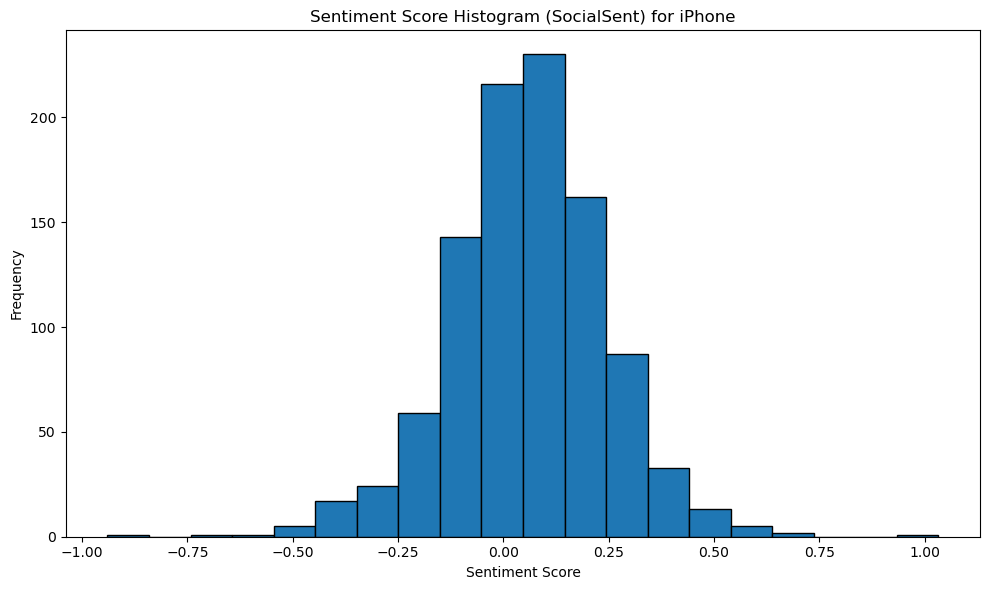

In [184]:
plt.figure(figsize=(10, 6))
plt.hist(df_iphone['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [185]:
sorted_df = df_iphone.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 This isn't apple sucks. They discounted the latest iphone by $100. How nice of them!
---------------------------------------------------------------------------------------------------
1 Every year iPhones have to return to their place of birth for an annual celebration
---------------------------------------------------------------------------------------------------
2 I was a diehard Android user from the HTC incredible all the way through a Galaxy Edge.  I switched to an iPhone 11 Pro when the Galaxy was underwhelming that year and…I absolutely prefer the iPhone.  Yes the Apple ecosystem is a walled garden but for me at least it’s a pretty nice garden.
---------------------------------------------------------------------------------------------------
3 You say it’s looking more like android but I see more customizations. I’m glad iPhone is more customizable for the user
---------------------------------------------------------------------------------------------------
4 Two of my 

In [186]:
sorted_df = df_iphone.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Are they fucking stupid tell me there fucking stupid the iPhone fixes stability after the video is done you smartass
---------------------------------------------------------------------------------------------------
1 That is one ugly phone.

Bring back the smoothed bezel of the iPhone 7/8 that the 11 had.
---------------------------------------------------------------------------------------------------
2 The new iphones are very boring and iterative. I'm not surprised growth is slowing.
---------------------------------------------------------------------------------------------------
3 Wouldn’t it be just as cheap for iPhones to be made in Mexico or another Latin America country? Serious question…
---------------------------------------------------------------------------------------------------
4 Shenzhen is like the elephant graveyard.  Your iPhone was probably sick and just went home to die.
--------------------------------------------------------------------------------------

In [187]:
# Categorize the sentiment based on the sentiment score
df_iphone['SentimentCategory_SocialSent'] = df_iphone['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_iphone


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1686458130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentCategory_SocialSent'] = df_iphone['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
4000  iPhone  #**Stop personal photos and videos from poppin...   
4001  iPhone  Look, I can't fucking stand Apple products. I'...   
4002  iPhone  I worked for Apple for most of a decade, inclu...   
4003  iPhone  I have the flip, literally writing this commen...   
4004  iPhone  I switched to iPhone last year after trying an...   
...      ...                                                ...   
4995  iPhone  If you take a stolen iPhone to apple to get it...   
4996  iPhone  Every year iPhones have to return to their pla...   
4997  iPhone  The new iphones are very boring and iterative....   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999  iPhone  iphone X. I miss those rounded edges so much, ...   

                                        Cleaned_Comment  \
4000  stop personal photo video popping unexpectedly...   
4001  took fucking stand apple product pp guy like t...   
4002  worked apple decade including long stint core ...   
4003  lip literally writing comment year use review ...   
4004  switched iphone last year trying iphone two ye...   
...                                                 ...   
4995      take stolen iphone apple get repaired fault ‍   
4996  year iphones return place birth annual celebra...   
4997  new phone boring operative surprised growth sl...   
4998  yes work phone shop never see burn iphone … proud   
4999  iphone x miss rounded edge much feel comfortab...   

                                      Sentiment_Comment  Length  \
4000  # * * Stop personal photo and video from poppi...    3513   
4001  Took , I cannot fucking stand Apple products ....    2088   
4002  I worked for Apple for most of a decade , incl...    1930   
4003  I have the lip , literally writing this commen...    1872   
4004  I switched to iPhone last year after trying an...    1700   
...                                                 ...     ...   
4995  Of you take a stolen iPhone to apple to get it...      83   
4996  Very year iPhones have to return to their plac...      83   
4997  The new phone are very boring and operative . ...      83   
4998  Yes ll , work in a phone shop and NEVER see bu...      83   
4999  iphone X . I miss those rounded edges so much ...      83   

                                      Tokenized_Comment  Topic  \
4000  [stop, personal, photo, video, popping, unexpe...      4   
4001  [took, fucking, stand, apple, product, pp, guy...      3   
4002  [worked, apple, decade, including, long, stint...      1   
4003  [lip, literally, writing, comment, year, use, ...      4   
4004  [switched, iphone, last, year, trying, iphone,...      3   
...                                                 ...    ...   
4995  [take, stolen, iphone, apple, get, repaired, f...      3   
4996  [year, iphones, return, place, birth, annual, ...      3   
4997  [new, phone, boring, operative, surprised, gro...      1   
4998  [yes, work, phone, shop, never, see, burn, iph...      3   
4999  [iphone, x, miss, rounded, edge, much, feel, c...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9628                Positive                Positive   
4001               -0.9682                Negative                Negative   
4002                0.9711                Positive                Positive   
4003                0.9914                Positive                Positive   
4004                0.9835                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.7096                Negative                Positive   
4996                0.0000                 Neutral                Positive   
4997               -0.6644                Negative                Negative   
4998                0.7003                Positive                Negative   
4999                0.7809          

***27.2. Macbook***

In [189]:
df_mac["SentimentScore_SocialSent"] = df_mac.apply(sentiment_score, axis=1)
df_mac

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/2924118264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac["SentimentScore_SocialSent"] = df_mac.apply(sentiment_score, axis=1)


Search                                            Comment  \
2000  Macbook  >is the M2 that much better than the M1? \n\nI...   
2001  Macbook  Feeling electricity or a mild electrical sensa...   
2002  Macbook  Weight is a big deal. Don’t you want to take i...   
2003  Macbook  The hardware "build quality" everybody raves a...   
2004  Macbook  Hi guys. IT here. We currently use Kandji as o...   
...       ...                                                ...   
2995  Macbook  Hate MacBook batteries when they do this! Just...   
2996  Macbook  Why don't you just save up for an M1 MacBook A...   
2997  Macbook  Damn Im staring to get confused with Macbook l...   
2998  Macbook  I once used a whole ass window AC unit to cool...   
2999  Macbook  Too close to the price of the 14” MacBook Pro ...   

                                        Cleaned_Comment  \
2000  much better better matter opinion much better ...   
2001  feeling electricity mild electrical sensation ...   
2002  eight big deal want take class cafe library ma...   
2003  hardware build quality everybody rate never re...   
2004  gun currently use kandji mmm server linked app...   
...                                                 ...   
2995  late macbook battery must paid size old sac ba...   
2996       save macbook air unless need specific reason   
2997  damn staring get confused macbook line imagine...   
2998  used whole as window unit cool size macbook ai...   
2999  close price size ” macbook fro would rather pa...   

                                      Sentiment_Comment  Length  \
2000  > is the Of that much better than the Of ? Its...    3184   
2001  Feeling electricity or a mild electrical sensa...    1975   
2002  Eight is a big deal . To not you want to take ...    1765   
2003  The hardware " build quality " everybody rates...    1718   
2004  I guns . of here . He currently use Kandji as ...    1617   
...                                                 ...     ...   
2995  Late MacBook batteries when they do this ! Mus...      92   
2996  Why do not you just save up for an Of MacBook ...      92   
2997  Damn I Am staring to get confused with Macbook...      92   
2998  I once used a whole ass window of unit to cool...      92   
2999  Too close to the price of the [ SIZE ] ” MacBo...      92   

                                      Tokenized_Comment  Topic  \
2000  [much, better, better, matter, opinion, much, ...      2   
2001  [feeling, electricity, mild, electrical, sensa...      4   
2002  [eight, big, deal, want, take, class, cafe, li...      2   
2003  [hardware, build, quality, everybody, rate, ne...      4   
2004  [gun, currently, use, kandji, mmm, server, lin...      3   
...                                                 ...    ...   
2995  [late, macbook, battery, must, paid, size, old...      2   
2996  [save, macbook, air, unless, need, specific, r...      2   
2997  [damn, staring, get, confused, macbook, line, ...      1   
2998  [used, whole, as, window, unit, cool, size, ma...      2   
2999  [close, price, size, ”, macbook, fro, would, r...      2   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9984                Positive                Positive   
2001                0.9478                Positive                Positive   
2002                0.9726                Positive                Positive   
2003                0.8916                Positive                Positive   
2004                0.9778                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.0000                 Neutral                Negative   
2996               -0.3875                Negative                Negative   
2997               -0.6124                Negative                 Neutral   
2998               -0.2960                Negative                Negative   
2999               -0.102

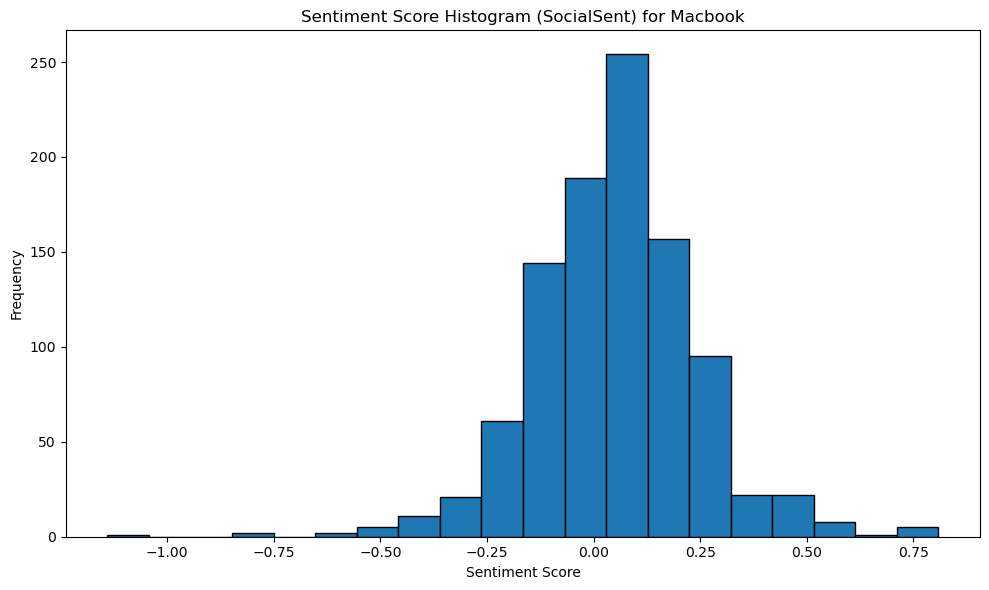

In [190]:
plt.figure(figsize=(10, 6))
plt.hist(df_mac['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [191]:
sorted_df = df_mac.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 MacBook 12 was absolutely beautiful. 

If they repeat it with MagSafe+USB-C that would be my next MacBook for sure.
---------------------------------------------------------------------------------------------------
1 Good for Linus. I'm happy for him. Great. That's great. So cool. Oh my God he uses a MacBook, woah that's cool. Okay cool. Yeah. Whatever, next :)
---------------------------------------------------------------------------------------------------
2 Surprisingly enough that's a feature of the MacBook, I think it has an infrared sensor on the top
---------------------------------------------------------------------------------------------------
3 Apple sure knows how to design and architecture a CPU.

I have 0 complaints with my M1 Pro MacBook Pro. 😁
---------------------------------------------------------------------------------------------------
4 2012 MacBook Pro, I have one as well, still works great, but sadly can't update to the latest macOS on it.
----------------

In [192]:
sorted_df = df_mac.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 After spilling a single shot on my MacBook and it just fucking dying, I know that thing is a goner.


And you know what? I was drunk. That's my excuse. This is just fucking dumb.
---------------------------------------------------------------------------------------------------
1 I have an M1 MacBook Air. I love my M1 MacBook Air. 

I will gladly upgrade to a 15" M2 MacBook "Air".
---------------------------------------------------------------------------------------------------
2 I scrolled past an advertisement for the new MacBook Air and this was the next post. Peak irony.
---------------------------------------------------------------------------------------------------
3 I love this! Though i bet the battery in the macbook itself is going to suffer being plugged in all the time
---------------------------------------------------------------------------------------------------
4 Finally. I’ve been trying to get my Macbook to crash for years now to no avail… now that I can install

In [193]:
# Categorize the sentiment based on the sentiment score
df_mac['SentimentCategory_SocialSent'] = df_mac['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_mac


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/2596257996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentCategory_SocialSent'] = df_mac['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
2000  Macbook  >is the M2 that much better than the M1? \n\nI...   
2001  Macbook  Feeling electricity or a mild electrical sensa...   
2002  Macbook  Weight is a big deal. Don’t you want to take i...   
2003  Macbook  The hardware "build quality" everybody raves a...   
2004  Macbook  Hi guys. IT here. We currently use Kandji as o...   
...       ...                                                ...   
2995  Macbook  Hate MacBook batteries when they do this! Just...   
2996  Macbook  Why don't you just save up for an M1 MacBook A...   
2997  Macbook  Damn Im staring to get confused with Macbook l...   
2998  Macbook  I once used a whole ass window AC unit to cool...   
2999  Macbook  Too close to the price of the 14” MacBook Pro ...   

                                        Cleaned_Comment  \
2000  much better better matter opinion much better ...   
2001  feeling electricity mild electrical sensation ...   
2002  eight big deal want take class cafe library ma...   
2003  hardware build quality everybody rate never re...   
2004  gun currently use kandji mmm server linked app...   
...                                                 ...   
2995  late macbook battery must paid size old sac ba...   
2996       save macbook air unless need specific reason   
2997  damn staring get confused macbook line imagine...   
2998  used whole as window unit cool size macbook ai...   
2999  close price size ” macbook fro would rather pa...   

                                      Sentiment_Comment  Length  \
2000  > is the Of that much better than the Of ? Its...    3184   
2001  Feeling electricity or a mild electrical sensa...    1975   
2002  Eight is a big deal . To not you want to take ...    1765   
2003  The hardware " build quality " everybody rates...    1718   
2004  I guns . of here . He currently use Kandji as ...    1617   
...                                                 ...     ...   
2995  Late MacBook batteries when they do this ! Mus...      92   
2996  Why do not you just save up for an Of MacBook ...      92   
2997  Damn I Am staring to get confused with Macbook...      92   
2998  I once used a whole ass window of unit to cool...      92   
2999  Too close to the price of the [ SIZE ] ” MacBo...      92   

                                      Tokenized_Comment  Topic  \
2000  [much, better, better, matter, opinion, much, ...      2   
2001  [feeling, electricity, mild, electrical, sensa...      4   
2002  [eight, big, deal, want, take, class, cafe, li...      2   
2003  [hardware, build, quality, everybody, rate, ne...      4   
2004  [gun, currently, use, kandji, mmm, server, lin...      3   
...                                                 ...    ...   
2995  [late, macbook, battery, must, paid, size, old...      2   
2996  [save, macbook, air, unless, need, specific, r...      2   
2997  [damn, staring, get, confused, macbook, line, ...      1   
2998  [used, whole, as, window, unit, cool, size, ma...      2   
2999  [close, price, size, ”, macbook, fro, would, r...      2   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9984                Positive                Positive   
2001                0.9478                Positive                Positive   
2002                0.9726                Positive                Positive   
2003                0.8916                Positive                Positive   
2004                0.9778                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.0000                 Neutral                Negative   
2996               -0.3875                Negative                Negative   
2997               -0.6124                Negative                 Neutral   
2998               -0.2960                Negative                Negative   
2999               -0.102

***27.3. iPad***

In [195]:
df_ipad["SentimentScore_SocialSent"] = df_ipad.apply(sentiment_score, axis=1)
df_ipad

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1361102979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad["SentimentScore_SocialSent"] = df_ipad.apply(sentiment_score, axis=1)


Search                                            Comment  \
3000   iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001   iPad  Gotta say, I disagree pretty whole-heartedly w...   
3002   iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
3003   iPad  **"There's no bad product, just bad prices"-Te...   
3004   iPad  I think you answered your own question. If pun...   
...     ...                                                ...   
3995   iPad  If you moderately push on the right side of th...   
3996   iPad  Result: Yelled at / grounded / no video games ...   
3997   iPad  I’m beyond impressed with mine. The older i ge...   
3998   iPad  I've got my iPad 10.5" Pro since 2018 and, bes...   
3999   iPad  I had this exact same thing happen to me a few...   

                                        Cleaned_Comment  \
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
3002  love ipad fro size reactor property manager ip...   
3003  bad product bad price techtuber heard probably...   
3004  think answered question punishment situation l...   
...                                                 ...   
3995  moderately push right side back ipad air get r...   
3996  result yelled grounded video game new ipad str...   
3997  beyond impressed mine older get le use back tr...   
3998  got ipad size fro since size besides small per...   
3999  exact thing happen month back order exactly we...   

                                      Sentiment_Comment  Length  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965   
3001  Not To say , I disagree pretty whole - heartil...    5860   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...    4383   
3003  * * " There is no bad product , just bad price...    4286   
3004  I think you answered your own question . Of pu...    3477   
...                                                 ...     ...   
3995  Of you moderately push on the right side of th...     286   
3996  Result : Yelled at / grounded / no video games...     286   
3997  I am beyond impressed with mine . The older i ...     286   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...     285   
3999  I had this exact same thing happen to me a few...     284   

                                      Tokenized_Comment  Topic  \
3000  [caught, uhd, surround, sound, size, fig, ram,...      4   
3001  [say, disagree, pretty, whole, heartily, artic...      2   
3002  [love, ipad, fro, size, reactor, property, man...      1   
3003  [bad, product, bad, price, techtuber, heard, p...      1   
3004  [think, answered, question, punishment, situat...      2   
...                                                 ...    ...   
3995  [moderately, push, right, side, back, ipad, ai...      1   
3996  [result, yelled, grounded, video, game, new, i...      2   
3997  [beyond, impressed, mine, older, get, le, use,...      1   
3998  [got, ipad, size, fro, since, size, besides, s...      1   
3999  [exact, thing, happen, month, back, order, exa...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9975                Positive                Positive   
3001                0.9990                Positive                Positive   
3002                0.9985                Positive                Positive   
3003                0.9933                Positive                Positive   
3004               -0.9916                Negative                Positive   
...                    ...                     ...                     ...   
3995                0.1280                Positive                 Neutral   
3996               -0.8706                Negative                Negative   
3997                0.7783                Positive                Positive   
3998                0.4840                Positive                Positive   
3999                0.2732                Posit

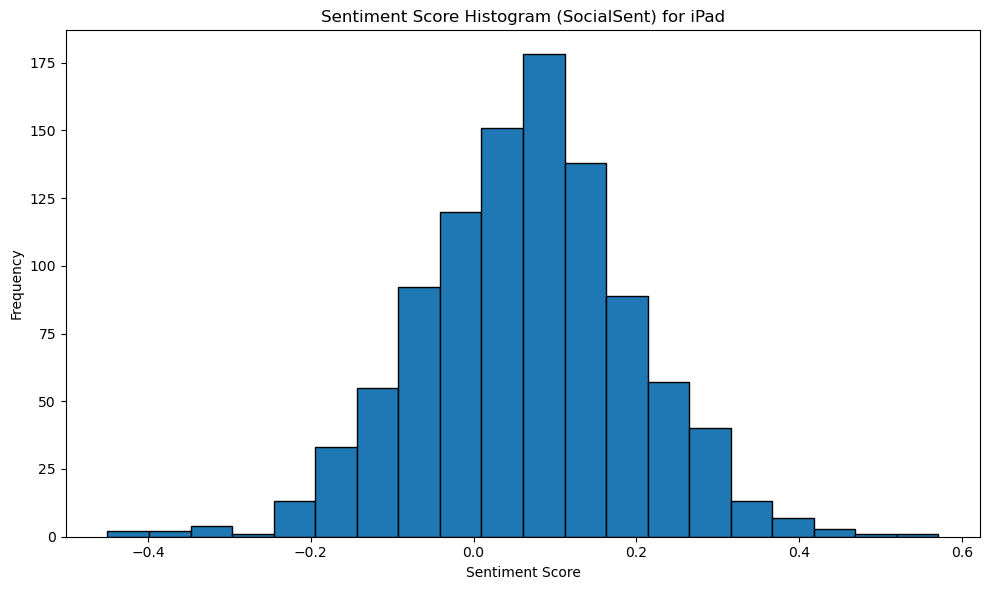

In [196]:
plt.figure(figsize=(10, 6))
plt.hist(df_ipad['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [197]:
sorted_df = df_ipad.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 So here’s the deal from a previous bride…..  wedding dresses have to be ordered most of the time.  They usually don’t do alterations until the dress is paid in full.  The wedding is in three months, so the dress should already be ordered.  A new iPad is what 500 dollarsish?  My whole wedding dress was $500.00 and it was beautiful…. Not a designer dress. But beautiful.  A wedding dress does not have to be expensive to be gorgeous, and classy.  The Fiancé’s daughter broke the iPad that she was specifically told not to touch.  I feel you were within your rights to buy a new your daughter a new iPad out of your JOINT account.  Not the AH.
---------------------------------------------------------------------------------------------------
1 this will be very welcome.

having resizable windows and more control will be a great bonus, but whats truly holding the ipad back is really the lack of pro apps. it has a pro chip, with some excellent third party apps (photoshop, lumafusion, etc) but i

In [198]:
sorted_df = df_ipad.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 The apps need go get better.   I can do the Lightroom ai noise reduction on my MacBook Air.  But can’t do it on the iPad Pro.  Even though it’s the same chip.  And it’s just as capable as the MacBook Air.   There’s limits to iPad apps.  And that’s what I am tired of.  These days I use my MacBook more than my iPad.
---------------------------------------------------------------------------------------------------
1 Most of the time, misplacing an object isn't that big of a deal. You would just call up the driver or the store where you left it and go pick it up. The driver *stole* her iPad. She's a victim of a crime regardless of the fact that she left it in the car. Your primary focus should be getting the police and Uber involved in this to prevent other people from falling victim to the same person. Also, punishing her for being a victim is the kind of thing that could make her more reluctant to tell you things in the future.
---------------------------------------------------------

In [199]:
# Categorize the sentiment based on the sentiment score
df_ipad['SentimentCategory_SocialSent'] = df_ipad['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_ipad


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1972745783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentCategory_SocialSent'] = df_ipad['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
3000   iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001   iPad  Gotta say, I disagree pretty whole-heartedly w...   
3002   iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
3003   iPad  **"There's no bad product, just bad prices"-Te...   
3004   iPad  I think you answered your own question. If pun...   
...     ...                                                ...   
3995   iPad  If you moderately push on the right side of th...   
3996   iPad  Result: Yelled at / grounded / no video games ...   
3997   iPad  I’m beyond impressed with mine. The older i ge...   
3998   iPad  I've got my iPad 10.5" Pro since 2018 and, bes...   
3999   iPad  I had this exact same thing happen to me a few...   

                                        Cleaned_Comment  \
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
3002  love ipad fro size reactor property manager ip...   
3003  bad product bad price techtuber heard probably...   
3004  think answered question punishment situation l...   
...                                                 ...   
3995  moderately push right side back ipad air get r...   
3996  result yelled grounded video game new ipad str...   
3997  beyond impressed mine older get le use back tr...   
3998  got ipad size fro since size besides small per...   
3999  exact thing happen month back order exactly we...   

                                      Sentiment_Comment  Length  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965   
3001  Not To say , I disagree pretty whole - heartil...    5860   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...    4383   
3003  * * " There is no bad product , just bad price...    4286   
3004  I think you answered your own question . Of pu...    3477   
...                                                 ...     ...   
3995  Of you moderately push on the right side of th...     286   
3996  Result : Yelled at / grounded / no video games...     286   
3997  I am beyond impressed with mine . The older i ...     286   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...     285   
3999  I had this exact same thing happen to me a few...     284   

                                      Tokenized_Comment  Topic  \
3000  [caught, uhd, surround, sound, size, fig, ram,...      4   
3001  [say, disagree, pretty, whole, heartily, artic...      2   
3002  [love, ipad, fro, size, reactor, property, man...      1   
3003  [bad, product, bad, price, techtuber, heard, p...      1   
3004  [think, answered, question, punishment, situat...      2   
...                                                 ...    ...   
3995  [moderately, push, right, side, back, ipad, ai...      1   
3996  [result, yelled, grounded, video, game, new, i...      2   
3997  [beyond, impressed, mine, older, get, le, use,...      1   
3998  [got, ipad, size, fro, since, size, besides, s...      1   
3999  [exact, thing, happen, month, back, order, exa...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9975                Positive                Positive   
3001                0.9990                Positive                Positive   
3002                0.9985                Positive                Positive   
3003                0.9933                Positive                Positive   
3004               -0.9916                Negative                Positive   
...                    ...                     ...                     ...   
3995                0.1280                Positive                 Neutral   
3996               -0.8706                Negative                Negative   
3997                0.7783                Positive                Positive   
3998                0.4840                Positive                Positive   
3999                0.2732                Posit

***27.4. AirPods***

In [201]:
df_airpods["SentimentScore_SocialSent"] = df_airpods.apply(sentiment_score, axis=1)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1246500405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods["SentimentScore_SocialSent"] = df_airpods.apply(sentiment_score, axis=1)


Search                                            Comment  \
0    AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1    AirPods  This was a mistake. But it’s 99% your wife’s m...   
2    AirPods  Wait so the only person who cared enough about...   
3    AirPods  Picked up the Pro gen 2s today as well, migrat...   
4    AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
..       ...                                                ...   
995  AirPods  You want to ruin your hearing, wear airpods wh...   
996  AirPods  In india airpods are for 250$ after so many ta...   
997  AirPods  Just throw on transparency mode and your AirPo...   
998  AirPods  when i drop it, the airpods always fall out of...   
999  AirPods  Would love to see the ability to play lossless...   

                                       Cleaned_Comment  \
0    comparing airpods max … bony rose nightmare si...   
1    mistake size wife ’ mistake left airpods lunch...   
2    wait person cared enough give gift brother say...   
3    picked fro gen today well migration pair bone ...   
4    would like warn anyone buying airpods size air...   
..                                                 ...   
995  want ruin hearing wear airpods get ratificatio...   
996  india airpods size many tax station wall earph...   
997  must throw transparent mode airpods literally ...   
998  drop airpods always fall case farthest distanc...   
999  would love see ability play loss airpods fro m...   

                                     Sentiment_Comment  Length  \
0    Comparing these to my AirPods Max … Bony has b...    7459   
1    His was a mistake . But it is [ SIZE ] % your ...    3265   
2    Wait so the only person who cared enough about...    2518   
3    Picked up the Fro gen is today as well , migra...    2281   
4    I all , I would like to warn anyone buying Air...    2254   
..                                                 ...     ...   
995  You want to ruin your hearing , wear airpods w...      89   
996  In india airpods are for [ SIZE ] $ after so m...      89   
997  Must throw on transparent mode and your AirPod...      89   
998  when i drop it , the airpods always fall out o...      89   
999  Would love to see the ability to play losses o...      89   

                                     Tokenized_Comment  Topic  \
0    [comparing, airpods, max, …, bony, rose, night...      0   
1    [mistake, size, wife, ’, mistake, left, airpod...      4   
2    [wait, person, cared, enough, give, gift, brot...      0   
3    [picked, fro, gen, today, well, migration, pai...      0   
4    [would, like, warn, anyone, buying, airpods, s...      0   
..                                                 ...    ...   
995  [want, ruin, hearing, wear, airpods, get, rati...      3   
996  [india, airpods, size, many, tax, station, wal...      1   
997  [must, throw, transparent, mode, airpods, lite...      0   
998  [drop, airpods, always, fall, case, farthest, ...      0   
999  [would, love, see, ability, play, loss, airpod...      2   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  0.9995                Positive                Positive   
1                 -0.9929                Negative                Positive   
2                  0.7199                Positive                Positive   
3                  0.9845                Positive                Positive   
4                  0.9808                Positive                Positive   
..                    ...                     ...                     ...   
995               -0.5423                Negative                 Neutral   
996                0.0000                 Neutral                Positive   
997                0.0000                 Neutral                Negative   
998               -0.2732                Negative                 Neutral   
999                0.7351                Positive                Positive   

     

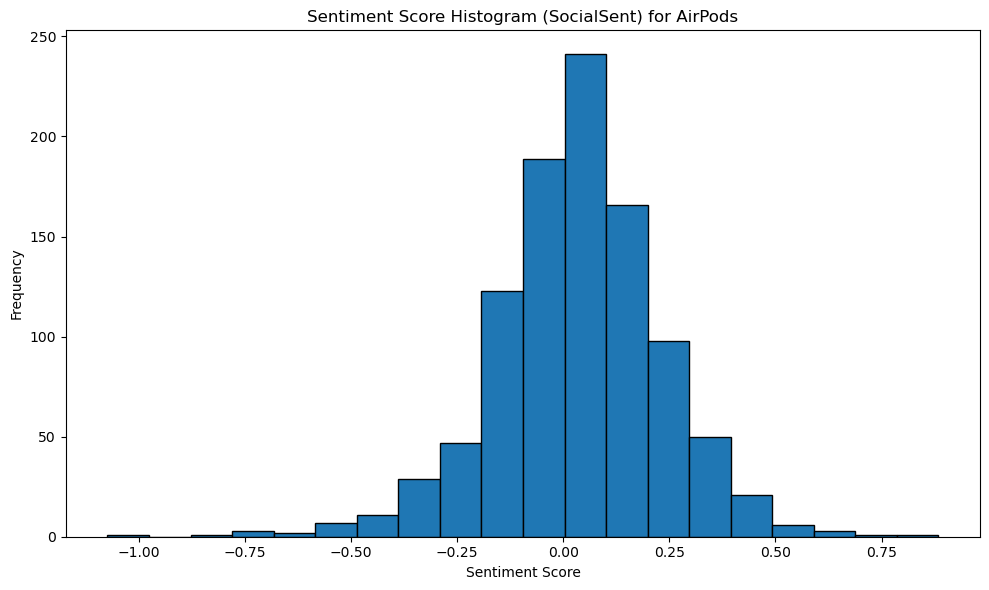

In [202]:
plt.figure(figsize=(10, 6))
plt.hist(df_airpods['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [203]:
sorted_df = df_airpods.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 AirPods cannot connect to iPod classic bc iPod classic uses different Bluetooth connectivity than the AirPods. :)
---------------------------------------------------------------------------------------------------
1 So the 2x improvements are over the detuned ANC and not the original full bore of the Airpods Pro one eh?
---------------------------------------------------------------------------------------------------
2 https://www.glitterbombyourenemies.com.au/product/bag-of-dicks/

Along with a card, "enjoy your airpods, dick"
---------------------------------------------------------------------------------------------------
3 My first gen AirPods are now being used by my mother-in-law and those fit my ears great. My first gen AirPods Pro did not fit my ears, but my partner is using them happily. I would consider getting the third gen AirPods if they get USB-C. 
For people who had first gen and third gen AirPods do you find that they fit about the same?
----------------------------

In [204]:
sorted_df = df_airpods.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Obviously not her fault. The AirPods are ‘small and stupid’. Yeah, definitely the AirPods fault.
---------------------------------------------------------------------------------------------------
1 Bruh airpods are the ONLY Bluetooth earbuds that dont look fucking ridiculous. This is coming from an Android user. Airpods lowkey fucking slap
---------------------------------------------------------------------------------------------------
2 I don't like sound, so I certainly don't care for Airpods. Steve Jobs would scream, "Get those fucking stupid things out of your ears and pay attention!!"
---------------------------------------------------------------------------------------------------
3 Is it going to fix the noise cancellation of the AirPods Pro 2 that randomly got worse in the few months they’ve been out?
---------------------------------------------------------------------------------------------------
4 This is literally my worst fear. Sometimes my heart will pound while op

In [205]:
# Categorize the sentiment based on the sentiment score
df_airpods['SentimentCategory_SocialSent'] = df_airpods['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_airpods


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1346995673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentCategory_SocialSent'] = df_airpods['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
0    AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1    AirPods  This was a mistake. But it’s 99% your wife’s m...   
2    AirPods  Wait so the only person who cared enough about...   
3    AirPods  Picked up the Pro gen 2s today as well, migrat...   
4    AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
..       ...                                                ...   
995  AirPods  You want to ruin your hearing, wear airpods wh...   
996  AirPods  In india airpods are for 250$ after so many ta...   
997  AirPods  Just throw on transparency mode and your AirPo...   
998  AirPods  when i drop it, the airpods always fall out of...   
999  AirPods  Would love to see the ability to play lossless...   

                                       Cleaned_Comment  \
0    comparing airpods max … bony rose nightmare si...   
1    mistake size wife ’ mistake left airpods lunch...   
2    wait person cared enough give gift brother say...   
3    picked fro gen today well migration pair bone ...   
4    would like warn anyone buying airpods size air...   
..                                                 ...   
995  want ruin hearing wear airpods get ratificatio...   
996  india airpods size many tax station wall earph...   
997  must throw transparent mode airpods literally ...   
998  drop airpods always fall case farthest distanc...   
999  would love see ability play loss airpods fro m...   

                                     Sentiment_Comment  Length  \
0    Comparing these to my AirPods Max … Bony has b...    7459   
1    His was a mistake . But it is [ SIZE ] % your ...    3265   
2    Wait so the only person who cared enough about...    2518   
3    Picked up the Fro gen is today as well , migra...    2281   
4    I all , I would like to warn anyone buying Air...    2254   
..                                                 ...     ...   
995  You want to ruin your hearing , wear airpods w...      89   
996  In india airpods are for [ SIZE ] $ after so m...      89   
997  Must throw on transparent mode and your AirPod...      89   
998  when i drop it , the airpods always fall out o...      89   
999  Would love to see the ability to play losses o...      89   

                                     Tokenized_Comment  Topic  \
0    [comparing, airpods, max, …, bony, rose, night...      0   
1    [mistake, size, wife, ’, mistake, left, airpod...      4   
2    [wait, person, cared, enough, give, gift, brot...      0   
3    [picked, fro, gen, today, well, migration, pai...      0   
4    [would, like, warn, anyone, buying, airpods, s...      0   
..                                                 ...    ...   
995  [want, ruin, hearing, wear, airpods, get, rati...      3   
996  [india, airpods, size, many, tax, station, wal...      1   
997  [must, throw, transparent, mode, airpods, lite...      0   
998  [drop, airpods, always, fall, case, farthest, ...      0   
999  [would, love, see, ability, play, loss, airpod...      2   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  0.9995                Positive                Positive   
1                 -0.9929                Negative                Positive   
2                  0.7199                Positive                Positive   
3                  0.9845                Positive                Positive   
4                  0.9808                Positive                Positive   
..                    ...                     ...                     ...   
995               -0.5423                Negative                 Neutral   
996                0.0000                 Neutral                Positive   
997                0.0000                 Neutral                Negative   
998               -0.2732                Negative                 Neutral   
999                0.7351                Positive                Positive   

     

***27.5. Apple Watch***

In [207]:
df_watch["SentimentScore_SocialSent"] = df_watch.apply(sentiment_score, axis=1)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/3320060839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch["SentimentScore_SocialSent"] = df_watch.apply(sentiment_score, axis=1)


Search                                            Comment  \
1000  Apple Watch  At this point it's really a matter of preferen...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   
...           ...                                                ...   
1995  Apple Watch  I love my Apple Watch! When I worked in the ho...   
1996  Apple Watch  Why is generally apple watch battery life so l...   
1997  Apple Watch  I’m buying it for the bigger size.\n\nSounds s...   
1998  Apple Watch  If you want a Apple Watch you don’t have to ba...   
1999  Apple Watch  Bad take. I work in finance and 80% of the peo...   

                                        Cleaned_Comment  \
1000  point really matter preference platform margin...   
1001  honestly difficult answer never really stopped...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   
...                                                 ...   
1995  love apple watch worked hospital actually woul...   
1996  generally apple watch battery life low compare...   
1997  buying bigger size wound silly pre apple watch...   
1998  want apple watch baby get ultra ware one naked...   
1999  take work finance size people work wear apple ...   

                                      Sentiment_Comment  Length  \
1000  It this point it is really a matter of prefere...    4474   
1001  Honestly , this is difficult to answer . Until...    4336   
1002  Smart watch enthusiast here , I have been usin...    4082   
1003  I discovered this year that I have had insomni...    3674   
1004  Aimed engineer here and boy do I got several p...    3570   
...                                                 ...     ...   
1995  I love my Apple Watch ! When I worked in the h...     174   
1996  Why is generally apple watch battery life so l...     174   
1997  I am buying it for the bigger size . Wounds si...     174   
1998  Of you want a Apple Watch you do not have to b...     173   
1999  Had take . I work in finance and [ SIZE ] % of...     173   

                                      Tokenized_Comment  Topic  \
1000  [point, really, matter, preference, platform, ...      2   
1001  [honestly, difficult, answer, never, really, s...      0   
1002  [smart, watch, enthusiast, using, smart, watch...      2   
1003  [discovered, year, insomnia, long, time, ackno...      3   
1004  [aimed, engineer, boy, got, several, problem, ...      2   
...                                                 ...    ...   
1995  [love, apple, watch, worked, hospital, actuall...      0   
1996  [generally, apple, watch, battery, life, low, ...      0   
1997  [buying, bigger, size, wound, silly, pre, appl...      0   
1998  [want, apple, watch, baby, get, ultra, ware, o...      0   
1999  [take, work, finance, size, people, work, wear...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9975                Positive                Positive   
1001                0.9918                Positive                Positive   
1002                0.9966                Positive                Positive   
1003               -0.8367                Negative                Positive   
1004                0.9108                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.6114                Positive                Positive   
1996                0.5265                Positive                Positive   
1997                0.6187                Positive                Positive   
1998               -0.6486                Negative         

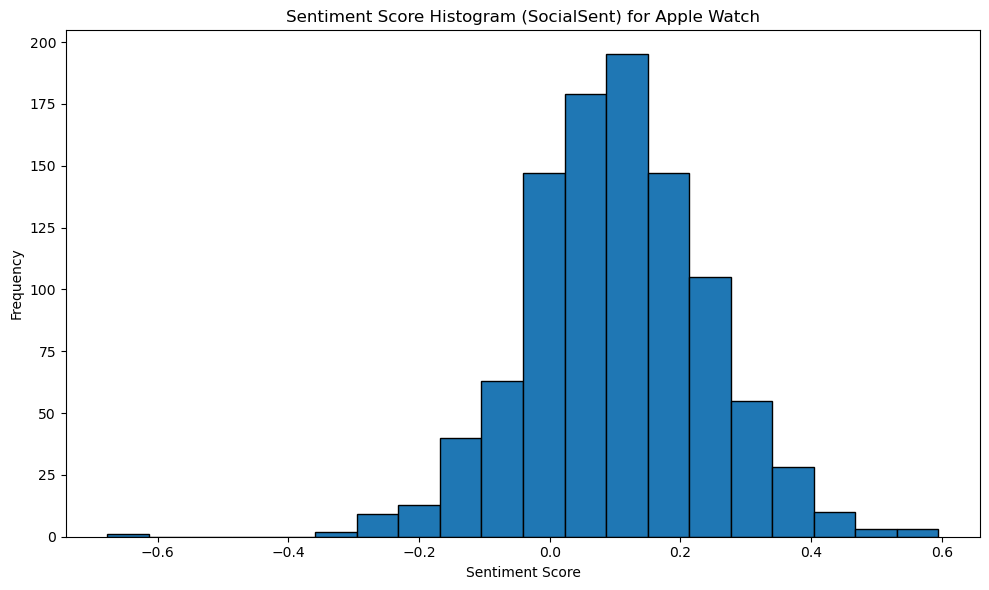

In [208]:
plt.figure(figsize=(10, 6))
plt.hist(df_watch['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [209]:
sorted_df = df_watch.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 She just wears the apple watch when you are around to show she is appreciate for the gift. Im sure the wrist computer comes off as soon as you leave so she can be at peace with her rollie
---------------------------------------------------------------------------------------------------
1 Hopefully this is opt-out-able. I have an Apple Watch so don’t need this and don’t want it as it is unquestionably less secure than a full face unlock. 

Great to have the option, but I hope it’s just that - an option that can be enabled/disabled.
---------------------------------------------------------------------------------------------------
2 Pretty neat project and well executed but Apple Watches in themselves aren't all that fashionable. I bet you could come up with a really interesting square / rectangular watch design.
---------------------------------------------------------------------------------------------------
3 My grandfather had on a Rolex and Apple Watch for Christmas Eve. He had 

In [210]:
sorted_df = df_watch.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 They're awful. A watch is first and foremost a piece of jewelry and Apple watches are ugly and nerdy looking. Unreal how many people in here are disagreeing with you, what a tragic downfall this sub has had
---------------------------------------------------------------------------------------------------
1 I’ve had several aluminum Apple Watches, and have never used an external case on them. Yes, aluminum is softer and more susceptible to damage, but I’ve never had any major damage. I’ve always been able to sell mine for $250-$300 when they’re 2 years old. The worst damage I’ve ever had was from hitting a door jamb, and it was a minor scratch to the case.
---------------------------------------------------------------------------------------------------
2 The Apple Watches are water resistant however if your device is liquid damage, you’ll have to pay for the service. It’s in the terms and conditions that liquid damage isn’t covered.
-------------------------------------------------

In [211]:
# Categorize the sentiment based on the sentiment score
df_watch['SentimentCategory_SocialSent'] = df_watch['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_watch


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/4099690096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentCategory_SocialSent'] = df_watch['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))


Search                                            Comment  \
1000  Apple Watch  At this point it's really a matter of preferen...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   
...           ...                                                ...   
1995  Apple Watch  I love my Apple Watch! When I worked in the ho...   
1996  Apple Watch  Why is generally apple watch battery life so l...   
1997  Apple Watch  I’m buying it for the bigger size.\n\nSounds s...   
1998  Apple Watch  If you want a Apple Watch you don’t have to ba...   
1999  Apple Watch  Bad take. I work in finance and 80% of the peo...   

                                        Cleaned_Comment  \
1000  point really matter preference platform margin...   
1001  honestly difficult answer never really stopped...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   
...                                                 ...   
1995  love apple watch worked hospital actually woul...   
1996  generally apple watch battery life low compare...   
1997  buying bigger size wound silly pre apple watch...   
1998  want apple watch baby get ultra ware one naked...   
1999  take work finance size people work wear apple ...   

                                      Sentiment_Comment  Length  \
1000  It this point it is really a matter of prefere...    4474   
1001  Honestly , this is difficult to answer . Until...    4336   
1002  Smart watch enthusiast here , I have been usin...    4082   
1003  I discovered this year that I have had insomni...    3674   
1004  Aimed engineer here and boy do I got several p...    3570   
...                                                 ...     ...   
1995  I love my Apple Watch ! When I worked in the h...     174   
1996  Why is generally apple watch battery life so l...     174   
1997  I am buying it for the bigger size . Wounds si...     174   
1998  Of you want a Apple Watch you do not have to b...     173   
1999  Had take . I work in finance and [ SIZE ] % of...     173   

                                      Tokenized_Comment  Topic  \
1000  [point, really, matter, preference, platform, ...      2   
1001  [honestly, difficult, answer, never, really, s...      0   
1002  [smart, watch, enthusiast, using, smart, watch...      2   
1003  [discovered, year, insomnia, long, time, ackno...      3   
1004  [aimed, engineer, boy, got, several, problem, ...      2   
...                                                 ...    ...   
1995  [love, apple, watch, worked, hospital, actuall...      0   
1996  [generally, apple, watch, battery, life, low, ...      0   
1997  [buying, bigger, size, wound, silly, pre, appl...      0   
1998  [want, apple, watch, baby, get, ultra, ware, o...      0   
1999  [take, work, finance, size, people, work, wear...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9975                Positive                Positive   
1001                0.9918                Positive                Positive   
1002                0.9966                Positive                Positive   
1003               -0.8367                Negative                Positive   
1004                0.9108                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.6114                Positive                Positive   
1996                0.5265                Positive                Positive   
1997                0.6187                Positive                Positive   
1998               -0.6486                Negative         

**28. Sentiment analysis with TextBlob**

***28.1. iPhone***

In [263]:
def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    return analysis.sentiment.polarity

# Apply sentiment analysis to calculate polarity
df_iphone['SentimentScore_TextBlob'] = df_iphone['Sentiment_Comment'].apply(analyze_sentiment)

# Optionally, you can also include the Sentiment Category based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df_iphone['SentimentCategory_TextBlob'] = df_iphone['SentimentScore_TextBlob'].apply(categorize_sentiment)
df_iphone

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1198180241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentScore_TextBlob'] = df_iphone['Sentiment_Comment'].apply(analyze_sentiment)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1198180241.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['SentimentCategory_TextBlob'] = df_iphone['SentimentScore_TextBlob'].apply(categorize_sentiment)


Search                                            Comment  \
4000  iPhone  #**Stop personal photos and videos from poppin...   
4001  iPhone  Look, I can't fucking stand Apple products. I'...   
4002  iPhone  I worked for Apple for most of a decade, inclu...   
4003  iPhone  I have the flip, literally writing this commen...   
4004  iPhone  I switched to iPhone last year after trying an...   
...      ...                                                ...   
4995  iPhone  If you take a stolen iPhone to apple to get it...   
4996  iPhone  Every year iPhones have to return to their pla...   
4997  iPhone  The new iphones are very boring and iterative....   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999  iPhone  iphone X. I miss those rounded edges so much, ...   

                                        Cleaned_Comment  \
4000  stop personal photo video popping unexpectedly...   
4001  took fucking stand apple product pp guy like t...   
4002  worked apple decade including long stint core ...   
4003  lip literally writing comment year use review ...   
4004  switched iphone last year trying iphone two ye...   
...                                                 ...   
4995      take stolen iphone apple get repaired fault ‍   
4996  year iphones return place birth annual celebra...   
4997  new phone boring operative surprised growth sl...   
4998  yes work phone shop never see burn iphone … proud   
4999  iphone x miss rounded edge much feel comfortab...   

                                      Sentiment_Comment  Length  \
4000  # * * Stop personal photo and video from poppi...    3513   
4001  Took , I cannot fucking stand Apple products ....    2088   
4002  I worked for Apple for most of a decade , incl...    1930   
4003  I have the lip , literally writing this commen...    1872   
4004  I switched to iPhone last year after trying an...    1700   
...                                                 ...     ...   
4995  Of you take a stolen iPhone to apple to get it...      83   
4996  Very year iPhones have to return to their plac...      83   
4997  The new phone are very boring and operative . ...      83   
4998  Yes ll , work in a phone shop and NEVER see bu...      83   
4999  iphone X . I miss those rounded edges so much ...      83   

                                      Tokenized_Comment  Topic  \
4000  [stop, personal, photo, video, popping, unexpe...      4   
4001  [took, fucking, stand, apple, product, pp, guy...      3   
4002  [worked, apple, decade, including, long, stint...      1   
4003  [lip, literally, writing, comment, year, use, ...      4   
4004  [switched, iphone, last, year, trying, iphone,...      3   
...                                                 ...    ...   
4995  [take, stolen, iphone, apple, get, repaired, f...      3   
4996  [year, iphones, return, place, birth, annual, ...      3   
4997  [new, phone, boring, operative, surprised, gro...      1   
4998  [yes, work, phone, shop, never, see, burn, iph...      3   
4999  [iphone, x, miss, rounded, edge, much, feel, c...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9628                Positive                Positive   
4001               -0.9682                Negative                Negative   
4002                0.9711                Positive                Positive   
4003                0.9914                Positive                Positive   
4004                0.9835                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.7096                Negative                Positive   
4996                0.0000                 Neutral                Positive   
4997               -0.6644                Negative                Negative   
4998                0.7003                Positive                Negative   
4999                0.7809          

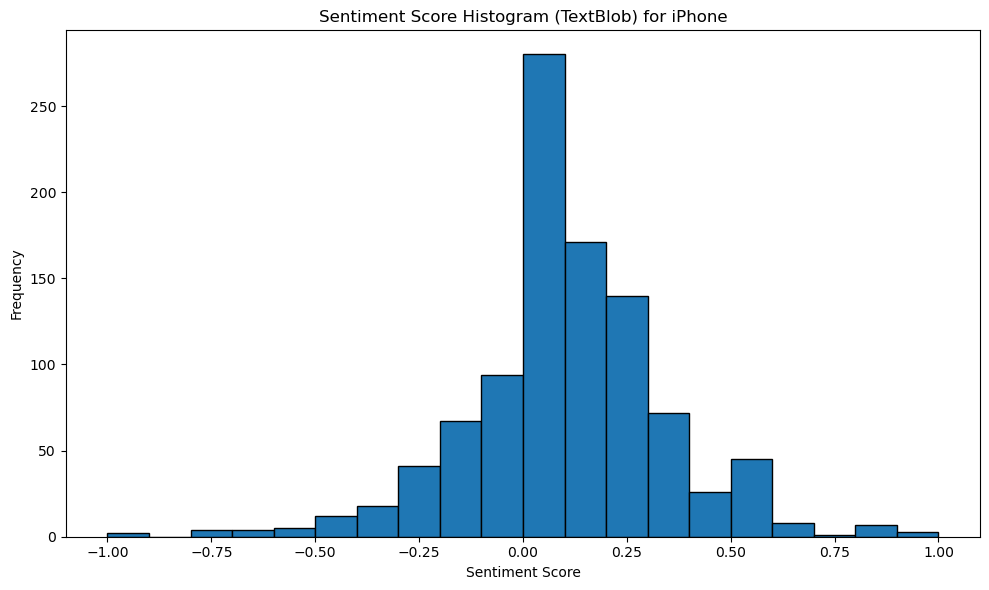

In [264]:
plt.figure(figsize=(10, 6))
plt.hist(df_iphone['SentimentScore_TextBlob'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (TextBlob) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [265]:
sorted_df = df_iphone.sort_values(by='SentimentScore_TextBlob', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Something I find especially amusing is the image they used shows iOS 10 running on the iPhone 6, meaning that this ad is probably from 2016/7 during the iPhone 7 era.
---------------------------------------------------------------------------------------------------
1 That’s awesome. My iPhone 14 called Tampa Emergency Services for me. From my bag. Without me asking.
---------------------------------------------------------------------------------------------------
2 iPhone X was the best size for me. A bit slippery without a case, but a beautiful design.
---------------------------------------------------------------------------------------------------
3 The iPhone 3G knock offs were the best. Any touchscreen with a clown fish on it was an iPhone LOL
---------------------------------------------------------------------------------------------------
4 Beautiful text 👏🏼 and as for that percentage% (not that surprising) the device/ iPhone 6 models released in 2014. That’s 10 years of u

In [266]:
sorted_df = df_iphone.sort_values(by='SentimentScore_TextBlob', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 So boring like yeah we know iPhones makes insane pictures but we need others upgrades
---------------------------------------------------------------------------------------------------
1 Why not!?? They switched for iPads and MacBooks!!?? What’s their lame reason not to!?? iPhone 14 sales are going to tank because of just this!! It took a lawsuit from the EU to force them to comply!!
---------------------------------------------------------------------------------------------------
2 Lol Apple will sell a portless iPhone and the iPhone Pros will get the USB-C with a bump in price. They might be losing that lightning port licensing fees but they will make up for it elsewhere
---------------------------------------------------------------------------------------------------
3 Are they fucking stupid tell me there fucking stupid the iPhone fixes stability after the video is done you smartass
-----------------------------------------------------------------------------------------------

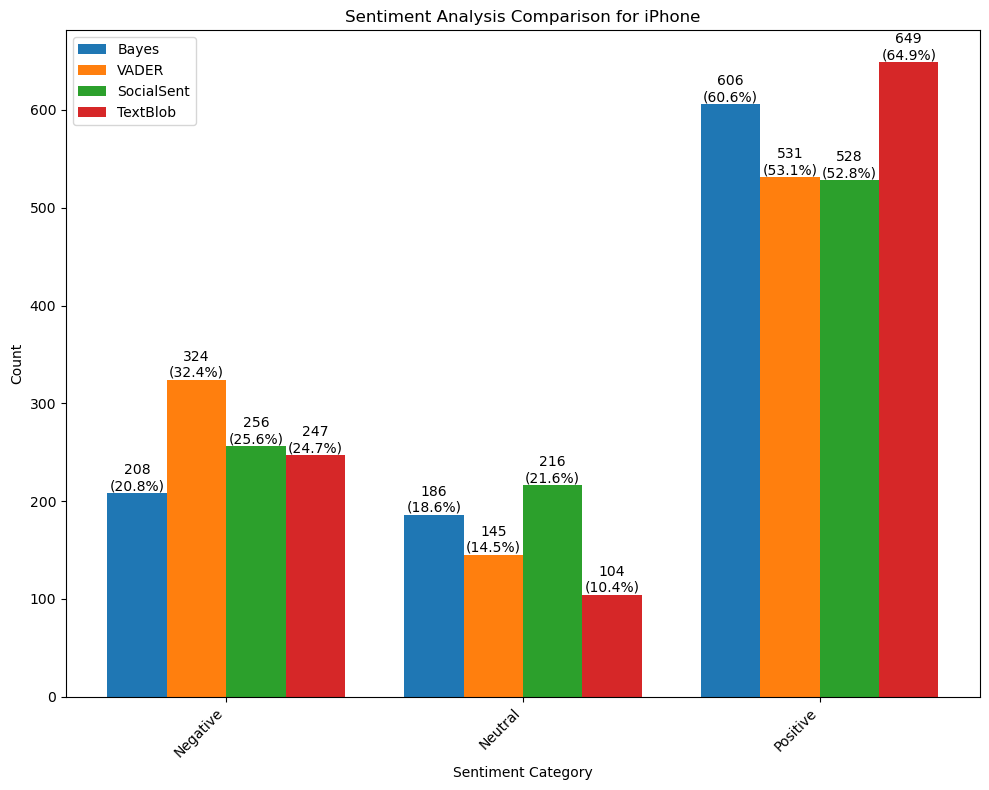

In [318]:
vader_counts = df_iphone['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_iphone['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_iphone['SentimentCategory_Bayes'].value_counts()
textblob_counts = df_iphone['SentimentCategory_TextBlob'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()
total_textblob = textblob_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index) | set(textblob_counts.index))

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.20

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]
x_textblob = [pos + bar_width * 3 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')
ax.bar(x_textblob, [textblob_counts.get(category, 0) for category in sentiment_categories], bar_width, label='TextBlob')


ax.set_xticks([pos + bar_width for pos in x_bayes])
center_positions = [(vader + social_sent) / 2 for vader, social_sent in zip(x_vader, x_social_sent)]
ax.set_xticks(center_positions)
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for iPhone')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)
    textblob_count = textblob_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')
    ax.text(x_textblob[i], textblob_count, f'{textblob_count}\n({calculate_percentage(textblob_count, total_textblob):.1f}%)', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


***28.2. Macbook***

In [268]:
# Apply sentiment analysis to calculate polarity
df_mac['SentimentScore_TextBlob'] = df_mac['Sentiment_Comment'].apply(analyze_sentiment)

df_mac['SentimentCategory_TextBlob'] = df_mac['SentimentScore_TextBlob'].apply(categorize_sentiment)
df_mac


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/3621607826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentScore_TextBlob'] = df_mac['Sentiment_Comment'].apply(analyze_sentiment)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/3621607826.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['SentimentCategory_TextBlob'] = df_mac['SentimentScore_TextBlob'].apply(categorize_sentiment)


Search                                            Comment  \
2000  Macbook  >is the M2 that much better than the M1? \n\nI...   
2001  Macbook  Feeling electricity or a mild electrical sensa...   
2002  Macbook  Weight is a big deal. Don’t you want to take i...   
2003  Macbook  The hardware "build quality" everybody raves a...   
2004  Macbook  Hi guys. IT here. We currently use Kandji as o...   
...       ...                                                ...   
2995  Macbook  Hate MacBook batteries when they do this! Just...   
2996  Macbook  Why don't you just save up for an M1 MacBook A...   
2997  Macbook  Damn Im staring to get confused with Macbook l...   
2998  Macbook  I once used a whole ass window AC unit to cool...   
2999  Macbook  Too close to the price of the 14” MacBook Pro ...   

                                        Cleaned_Comment  \
2000  much better better matter opinion much better ...   
2001  feeling electricity mild electrical sensation ...   
2002  eight big deal want take class cafe library ma...   
2003  hardware build quality everybody rate never re...   
2004  gun currently use kandji mmm server linked app...   
...                                                 ...   
2995  late macbook battery must paid size old sac ba...   
2996       save macbook air unless need specific reason   
2997  damn staring get confused macbook line imagine...   
2998  used whole as window unit cool size macbook ai...   
2999  close price size ” macbook fro would rather pa...   

                                      Sentiment_Comment  Length  \
2000  > is the Of that much better than the Of ? Its...    3184   
2001  Feeling electricity or a mild electrical sensa...    1975   
2002  Eight is a big deal . To not you want to take ...    1765   
2003  The hardware " build quality " everybody rates...    1718   
2004  I guns . of here . He currently use Kandji as ...    1617   
...                                                 ...     ...   
2995  Late MacBook batteries when they do this ! Mus...      92   
2996  Why do not you just save up for an Of MacBook ...      92   
2997  Damn I Am staring to get confused with Macbook...      92   
2998  I once used a whole ass window of unit to cool...      92   
2999  Too close to the price of the [ SIZE ] ” MacBo...      92   

                                      Tokenized_Comment  Topic  \
2000  [much, better, better, matter, opinion, much, ...      2   
2001  [feeling, electricity, mild, electrical, sensa...      4   
2002  [eight, big, deal, want, take, class, cafe, li...      2   
2003  [hardware, build, quality, everybody, rate, ne...      4   
2004  [gun, currently, use, kandji, mmm, server, lin...      3   
...                                                 ...    ...   
2995  [late, macbook, battery, must, paid, size, old...      2   
2996  [save, macbook, air, unless, need, specific, r...      2   
2997  [damn, staring, get, confused, macbook, line, ...      1   
2998  [used, whole, as, window, unit, cool, size, ma...      2   
2999  [close, price, size, ”, macbook, fro, would, r...      2   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9984                Positive                Positive   
2001                0.9478                Positive                Positive   
2002                0.9726                Positive                Positive   
2003                0.8916                Positive                Positive   
2004                0.9778                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.0000                 Neutral                Negative   
2996               -0.3875                Negative                Negative   
2997               -0.6124                Negative                 Neutral   
2998               -0.2960                Negative                Negative   
2999               -0.102

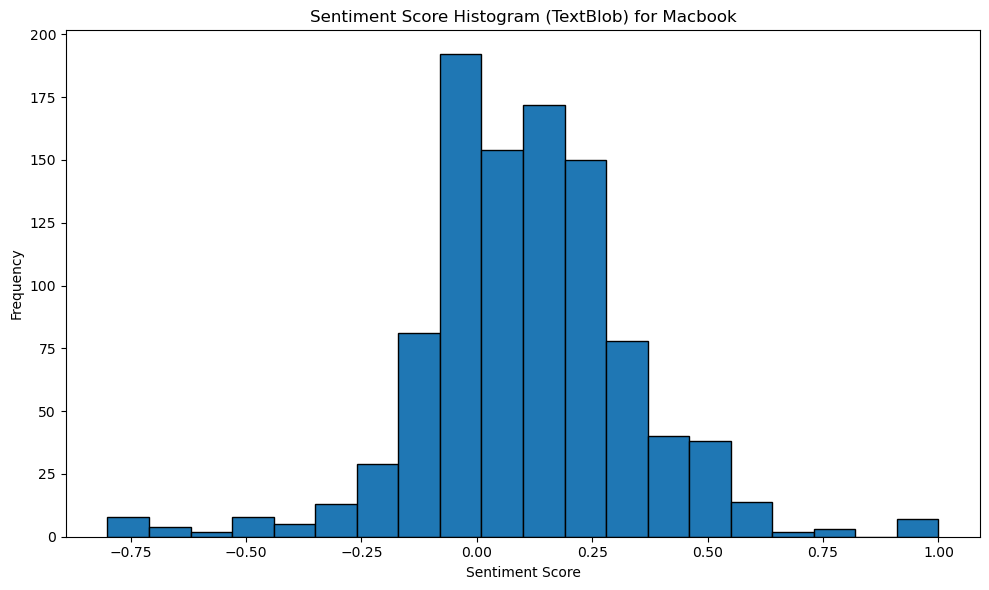

In [269]:
plt.figure(figsize=(10, 6))
plt.hist(df_mac['SentimentScore_TextBlob'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (TextBlob) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [270]:
sorted_df = df_mac.sort_values(by='SentimentScore_TextBlob', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 I have the i5 model and it’s perfect for me. I know this is a Mac group but consider a Thinkpad T480. The T480 has gotten me through Computer Science undergrad and it’s cheaper than a MacBook
---------------------------------------------------------------------------------------------------
1 lol just went from a 2012 rMBP(still works perfectly, going into storage) to a MBA M2.  I can't wait to buy whatever MacBook that comes out in 2033.
---------------------------------------------------------------------------------------------------
2 I’m in CS, in December I bought a 2021 MacBook Pro M1 16gb RAM, works perfectly for school and haven’t had any complaints.
---------------------------------------------------------------------------------------------------
3 I can’t believe the 12” MacBook hasn’t made a return. That machine was the perfect size and was tailor made for an ARM chip.
---------------------------------------------------------------------------------------------------
4 A

In [271]:
sorted_df = df_mac.sort_values(by='SentimentScore_TextBlob', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Maybe I'm commenting into the void, but I don't get the positioning of the base M3 MacBook Pro.

Where does that leave the MB Air?

Will the Air not get an M3 chip?
---------------------------------------------------------------------------------------------------
1 Lol who cares. Anybody that is buying the 256gb storage option isn’t going to care. When my wife bought her m1 MacBook Air I told her to get 16GB ram and the 1TB storage option. Nobody that is concerned about performance is buying the base storage option…
---------------------------------------------------------------------------------------------------
2 iPad with 64 gb base storage and Macbook with 8 gb base ram does not work anymore. It probably explains why both these segments are seeing declining sales
---------------------------------------------------------------------------------------------------
3 The base 14" is just a MacBook with Pro tacked on for marketing reasons and a Pro price tag.
-----------------------

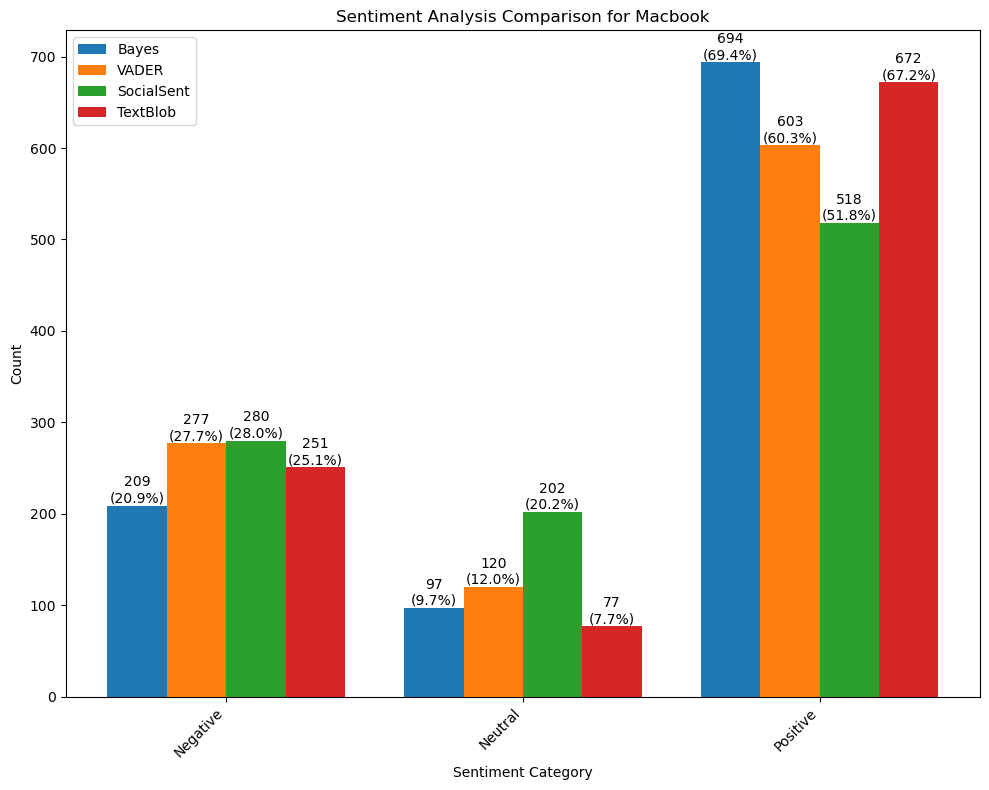

In [317]:
vader_counts = df_mac['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_mac['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_mac['SentimentCategory_Bayes'].value_counts()
textblob_counts = df_mac['SentimentCategory_TextBlob'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()
total_textblob = textblob_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index) | set(textblob_counts.index))

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.20

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]
x_textblob = [pos + bar_width * 3 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')
ax.bar(x_textblob, [textblob_counts.get(category, 0) for category in sentiment_categories], bar_width, label='TextBlob')


ax.set_xticks([pos + bar_width for pos in x_bayes])
center_positions = [(vader + social_sent) / 2 for vader, social_sent in zip(x_vader, x_social_sent)]
ax.set_xticks(center_positions)
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for Macbook')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)
    textblob_count = textblob_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')
    ax.text(x_textblob[i], textblob_count, f'{textblob_count}\n({calculate_percentage(textblob_count, total_textblob):.1f}%)', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


***28.3. iPad***

In [273]:
# Apply sentiment analysis to calculate polarity
df_ipad['SentimentScore_TextBlob'] = df_ipad['Sentiment_Comment'].apply(analyze_sentiment)

df_ipad['SentimentCategory_TextBlob'] = df_ipad['SentimentScore_TextBlob'].apply(categorize_sentiment)
df_ipad


/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/635845151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentScore_TextBlob'] = df_ipad['Sentiment_Comment'].apply(analyze_sentiment)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/635845151.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['SentimentCategory_TextBlob'] = df_ipad['SentimentScore_TextBlob'].apply(categorize_sentiment)


Search                                            Comment  \
3000   iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001   iPad  Gotta say, I disagree pretty whole-heartedly w...   
3002   iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
3003   iPad  **"There's no bad product, just bad prices"-Te...   
3004   iPad  I think you answered your own question. If pun...   
...     ...                                                ...   
3995   iPad  If you moderately push on the right side of th...   
3996   iPad  Result: Yelled at / grounded / no video games ...   
3997   iPad  I’m beyond impressed with mine. The older i ge...   
3998   iPad  I've got my iPad 10.5" Pro since 2018 and, bes...   
3999   iPad  I had this exact same thing happen to me a few...   

                                        Cleaned_Comment  \
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
3002  love ipad fro size reactor property manager ip...   
3003  bad product bad price techtuber heard probably...   
3004  think answered question punishment situation l...   
...                                                 ...   
3995  moderately push right side back ipad air get r...   
3996  result yelled grounded video game new ipad str...   
3997  beyond impressed mine older get le use back tr...   
3998  got ipad size fro since size besides small per...   
3999  exact thing happen month back order exactly we...   

                                      Sentiment_Comment  Length  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965   
3001  Not To say , I disagree pretty whole - heartil...    5860   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...    4383   
3003  * * " There is no bad product , just bad price...    4286   
3004  I think you answered your own question . Of pu...    3477   
...                                                 ...     ...   
3995  Of you moderately push on the right side of th...     286   
3996  Result : Yelled at / grounded / no video games...     286   
3997  I am beyond impressed with mine . The older i ...     286   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...     285   
3999  I had this exact same thing happen to me a few...     284   

                                      Tokenized_Comment  Topic  \
3000  [caught, uhd, surround, sound, size, fig, ram,...      4   
3001  [say, disagree, pretty, whole, heartily, artic...      2   
3002  [love, ipad, fro, size, reactor, property, man...      1   
3003  [bad, product, bad, price, techtuber, heard, p...      1   
3004  [think, answered, question, punishment, situat...      2   
...                                                 ...    ...   
3995  [moderately, push, right, side, back, ipad, ai...      1   
3996  [result, yelled, grounded, video, game, new, i...      2   
3997  [beyond, impressed, mine, older, get, le, use,...      1   
3998  [got, ipad, size, fro, since, size, besides, s...      1   
3999  [exact, thing, happen, month, back, order, exa...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9975                Positive                Positive   
3001                0.9990                Positive                Positive   
3002                0.9985                Positive                Positive   
3003                0.9933                Positive                Positive   
3004               -0.9916                Negative                Positive   
...                    ...                     ...                     ...   
3995                0.1280                Positive                 Neutral   
3996               -0.8706                Negative                Negative   
3997                0.7783                Positive                Positive   
3998                0.4840                Positive                Positive   
3999                0.2732                Posit

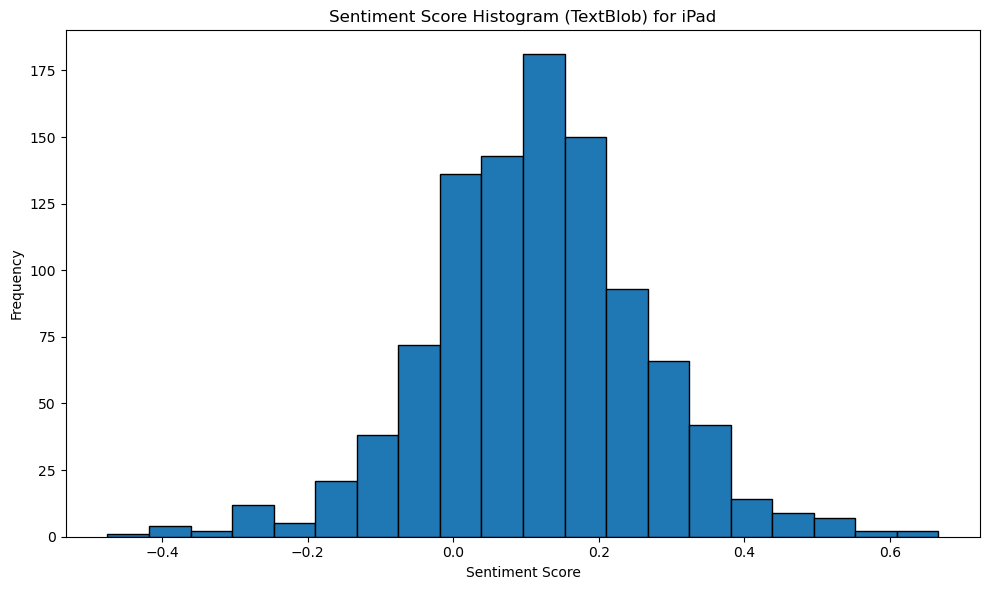

In [274]:
plt.figure(figsize=(10, 6))
plt.hist(df_ipad['SentimentScore_TextBlob'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (TextBlob) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [275]:
sorted_df = df_ipad.sort_values(by='SentimentScore_TextBlob', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 All the iPad needs is file management and it is an ultraportable laptop. Honestly, they should just allow Mac OS X on all iPads and let the user boot to either tablet mode or laptop mode. Give us the power to use the hardware with the best software experience available in either scenario.
---------------------------------------------------------------------------------------------------
1 I got an awesome price for a nearly untouched Pro M1 11" and it's been one of the best purchases i have ever made. The 120fps screen is awesome, and alongside the dual speakers it is a media consumption machine, and i'll probably buy an apple pen this week to take notes at school/work.

It retired my 6 year old iPad Air 2 i got for school, but probably won't retire my Windows laptop as i need desktop apps and iPad OS is still not quite there
---------------------------------------------------------------------------------------------------
2 Apple has increased the price of all iPads in the UK even 

In [276]:
sorted_df = df_ipad.sort_values(by='SentimentScore_TextBlob', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 Has there ever been an Apple release so universally panned by everyone? I know it got bleak with the MacBooks in 2016, but from Apple critics to even YouTubers known for praising everything Apple - the feedback has been the lineup is terrible, they completely messed this release up and don’t buy an iPad
---------------------------------------------------------------------------------------------------
1 I use the iPad mini 6 as an EFB (you know.. what they advertised so much about) but the truth of the matter is that using it in the cockpit is horrible since the screen brightness is horrendous, I just end up using my iPhone. I pray the mini 7 solves this and Apple increases the max brightness.
---------------------------------------------------------------------------------------------------
2 This is why apple has been pushing the iOSification of the mac.

This dumbed down version of MacOS (such a stupid name) on the iPad is going to end up being so terrible, unintuitive, and stupid

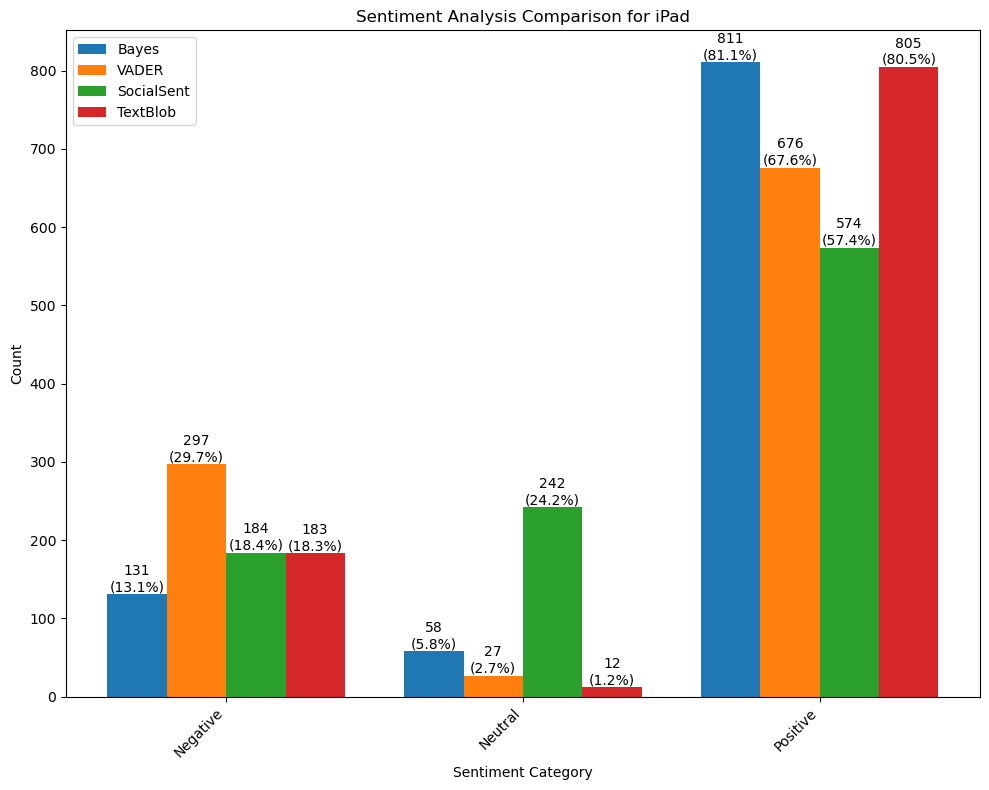

In [316]:
vader_counts = df_ipad['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_ipad['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_ipad['SentimentCategory_Bayes'].value_counts()
textblob_counts = df_ipad['SentimentCategory_TextBlob'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()
total_textblob = textblob_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index) | set(textblob_counts.index))

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.20

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]
x_textblob = [pos + bar_width * 3 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')
ax.bar(x_textblob, [textblob_counts.get(category, 0) for category in sentiment_categories], bar_width, label='TextBlob')


ax.set_xticks([pos + bar_width for pos in x_bayes])
center_positions = [(vader + social_sent) / 2 for vader, social_sent in zip(x_vader, x_social_sent)]
ax.set_xticks(center_positions)
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for iPad')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)
    textblob_count = textblob_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')
    ax.text(x_textblob[i], textblob_count, f'{textblob_count}\n({calculate_percentage(textblob_count, total_textblob):.1f}%)', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


***28.4. AirPods***

In [278]:
# Apply sentiment analysis to calculate polarity
df_airpods['SentimentScore_TextBlob'] = df_airpods['Sentiment_Comment'].apply(analyze_sentiment)

df_airpods['SentimentCategory_TextBlob'] = df_airpods['SentimentScore_TextBlob'].apply(categorize_sentiment)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1421201418.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentScore_TextBlob'] = df_airpods['Sentiment_Comment'].apply(analyze_sentiment)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1421201418.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['SentimentCategory_TextBlob'] = df_airpods['SentimentScore_TextBlob'].apply(categorize_sentiment)


Search                                            Comment  \
0    AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1    AirPods  This was a mistake. But it’s 99% your wife’s m...   
2    AirPods  Wait so the only person who cared enough about...   
3    AirPods  Picked up the Pro gen 2s today as well, migrat...   
4    AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
..       ...                                                ...   
995  AirPods  You want to ruin your hearing, wear airpods wh...   
996  AirPods  In india airpods are for 250$ after so many ta...   
997  AirPods  Just throw on transparency mode and your AirPo...   
998  AirPods  when i drop it, the airpods always fall out of...   
999  AirPods  Would love to see the ability to play lossless...   

                                       Cleaned_Comment  \
0    comparing airpods max … bony rose nightmare si...   
1    mistake size wife ’ mistake left airpods lunch...   
2    wait person cared enough give gift brother say...   
3    picked fro gen today well migration pair bone ...   
4    would like warn anyone buying airpods size air...   
..                                                 ...   
995  want ruin hearing wear airpods get ratificatio...   
996  india airpods size many tax station wall earph...   
997  must throw transparent mode airpods literally ...   
998  drop airpods always fall case farthest distanc...   
999  would love see ability play loss airpods fro m...   

                                     Sentiment_Comment  Length  \
0    Comparing these to my AirPods Max … Bony has b...    7459   
1    His was a mistake . But it is [ SIZE ] % your ...    3265   
2    Wait so the only person who cared enough about...    2518   
3    Picked up the Fro gen is today as well , migra...    2281   
4    I all , I would like to warn anyone buying Air...    2254   
..                                                 ...     ...   
995  You want to ruin your hearing , wear airpods w...      89   
996  In india airpods are for [ SIZE ] $ after so m...      89   
997  Must throw on transparent mode and your AirPod...      89   
998  when i drop it , the airpods always fall out o...      89   
999  Would love to see the ability to play losses o...      89   

                                     Tokenized_Comment  Topic  \
0    [comparing, airpods, max, …, bony, rose, night...      0   
1    [mistake, size, wife, ’, mistake, left, airpod...      4   
2    [wait, person, cared, enough, give, gift, brot...      0   
3    [picked, fro, gen, today, well, migration, pai...      0   
4    [would, like, warn, anyone, buying, airpods, s...      0   
..                                                 ...    ...   
995  [want, ruin, hearing, wear, airpods, get, rati...      3   
996  [india, airpods, size, many, tax, station, wal...      1   
997  [must, throw, transparent, mode, airpods, lite...      0   
998  [drop, airpods, always, fall, case, farthest, ...      0   
999  [would, love, see, ability, play, loss, airpod...      2   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  0.9995                Positive                Positive   
1                 -0.9929                Negative                Positive   
2                  0.7199                Positive                Positive   
3                  0.9845                Positive                Positive   
4                  0.9808                Positive                Positive   
..                    ...                     ...                     ...   
995               -0.5423                Negative                 Neutral   
996                0.0000                 Neutral                Positive   
997                0.0000                 Neutral                Negative   
998               -0.2732                Negative                 Neutral   
999                0.7351                Positive                Positive   

     

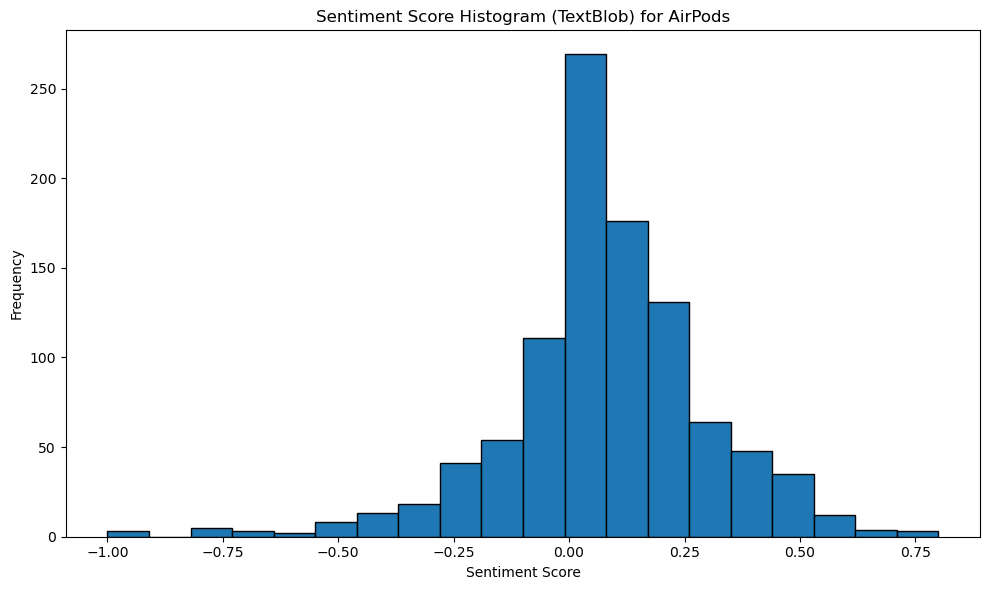

In [279]:
plt.figure(figsize=(10, 6))
plt.hist(df_airpods['SentimentScore_TextBlob'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (TextBlob) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [280]:
sorted_df = df_airpods.sort_values(by='SentimentScore_TextBlob', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 I am holding out for USB C to replace my iPhone and AirPods.

I don't see my keyboard needing a replacement, however I will happily sell it and replace it with a USB C version just to banish Lightning from my house.
---------------------------------------------------------------------------------------------------
1 I think it would be easiest to put them in the taller pipe. The lower would be a good challenge though. Good luck!

But why do you want to put your AirPods in there?
---------------------------------------------------------------------------------------------------
2 Insta buy since losing my AirPods Pro’s 3 mos ago! Sad to think of all the noise I was hearing that wasn’t cancelled!
---------------------------------------------------------------------------------------------------
3 *me getting a good deal (2nd hand unused) on Beats Studio buds all because they aren’t “AirPods”*
----------------------------------------------------------------------------------------------

In [281]:
sorted_df = df_airpods.sort_values(by='SentimentScore_TextBlob', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 This is literally my worst fear. Sometimes my heart will pound while opening my airpods case.
---------------------------------------------------------------------------------------------------
1 It's very annoying!!! Try one of these, might help a bit. https://www.windowsdispatch.com/fix-airpods-pro-2-audio-drift-syncing-issues/
---------------------------------------------------------------------------------------------------
2 I went from Gen 2 AirPods to AirPods Pro Gen 2. 

The noise cancellation is insane. I don't know what it's like in Gen 1, but it's insane. 

My car is ~73dB sitting in the drivers seat. I can't even tell the car is running if I have noise cancellation on. (no, i don't drive with headphones. was part of testing them)
---------------------------------------------------------------------------------------------------
3 USB C AirPods now? Should those be called AirPods if they're wired? Also, I'm appalled by the lack of courage.
---------------------------------

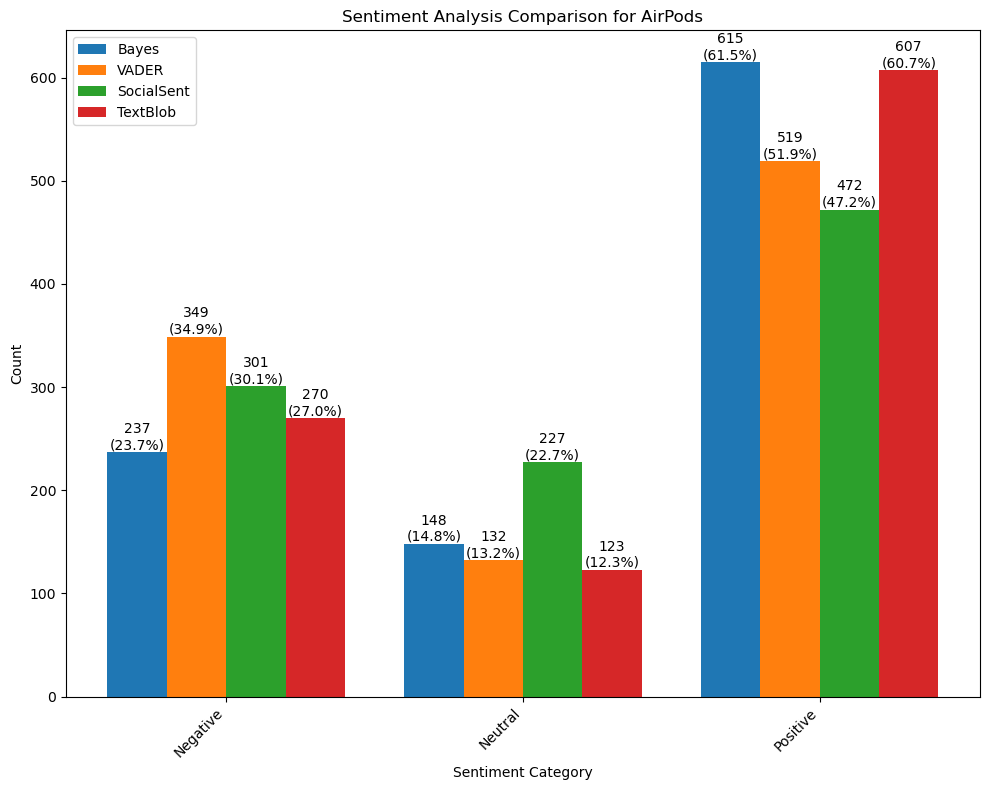

In [315]:
vader_counts = df_airpods['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_airpods['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_airpods['SentimentCategory_Bayes'].value_counts()
textblob_counts = df_airpods['SentimentCategory_TextBlob'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()
total_textblob = textblob_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index) | set(textblob_counts.index))

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.20

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]
x_textblob = [pos + bar_width * 3 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')
ax.bar(x_textblob, [textblob_counts.get(category, 0) for category in sentiment_categories], bar_width, label='TextBlob')


ax.set_xticks([pos + bar_width for pos in x_bayes])
center_positions = [(vader + social_sent) / 2 for vader, social_sent in zip(x_vader, x_social_sent)]
ax.set_xticks(center_positions)
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for AirPods')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)
    textblob_count = textblob_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')
    ax.text(x_textblob[i], textblob_count, f'{textblob_count}\n({calculate_percentage(textblob_count, total_textblob):.1f}%)', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


***28.5. Apple Watch***

In [283]:
# Apply sentiment analysis to calculate polarity
df_watch['SentimentScore_TextBlob'] = df_watch['Sentiment_Comment'].apply(analyze_sentiment)

df_watch['SentimentCategory_TextBlob'] = df_watch['SentimentScore_TextBlob'].apply(categorize_sentiment)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/4249115940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentScore_TextBlob'] = df_watch['Sentiment_Comment'].apply(analyze_sentiment)
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/4249115940.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['SentimentCategory_TextBlob'] = df_watch['SentimentScore_TextBlob'].apply(categorize_sentiment)


Search                                            Comment  \
1000  Apple Watch  At this point it's really a matter of preferen...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   
...           ...                                                ...   
1995  Apple Watch  I love my Apple Watch! When I worked in the ho...   
1996  Apple Watch  Why is generally apple watch battery life so l...   
1997  Apple Watch  I’m buying it for the bigger size.\n\nSounds s...   
1998  Apple Watch  If you want a Apple Watch you don’t have to ba...   
1999  Apple Watch  Bad take. I work in finance and 80% of the peo...   

                                        Cleaned_Comment  \
1000  point really matter preference platform margin...   
1001  honestly difficult answer never really stopped...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   
...                                                 ...   
1995  love apple watch worked hospital actually woul...   
1996  generally apple watch battery life low compare...   
1997  buying bigger size wound silly pre apple watch...   
1998  want apple watch baby get ultra ware one naked...   
1999  take work finance size people work wear apple ...   

                                      Sentiment_Comment  Length  \
1000  It this point it is really a matter of prefere...    4474   
1001  Honestly , this is difficult to answer . Until...    4336   
1002  Smart watch enthusiast here , I have been usin...    4082   
1003  I discovered this year that I have had insomni...    3674   
1004  Aimed engineer here and boy do I got several p...    3570   
...                                                 ...     ...   
1995  I love my Apple Watch ! When I worked in the h...     174   
1996  Why is generally apple watch battery life so l...     174   
1997  I am buying it for the bigger size . Wounds si...     174   
1998  Of you want a Apple Watch you do not have to b...     173   
1999  Had take . I work in finance and [ SIZE ] % of...     173   

                                      Tokenized_Comment  Topic  \
1000  [point, really, matter, preference, platform, ...      2   
1001  [honestly, difficult, answer, never, really, s...      0   
1002  [smart, watch, enthusiast, using, smart, watch...      2   
1003  [discovered, year, insomnia, long, time, ackno...      3   
1004  [aimed, engineer, boy, got, several, problem, ...      2   
...                                                 ...    ...   
1995  [love, apple, watch, worked, hospital, actuall...      0   
1996  [generally, apple, watch, battery, life, low, ...      0   
1997  [buying, bigger, size, wound, silly, pre, appl...      0   
1998  [want, apple, watch, baby, get, ultra, ware, o...      0   
1999  [take, work, finance, size, people, work, wear...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9975                Positive                Positive   
1001                0.9918                Positive                Positive   
1002                0.9966                Positive                Positive   
1003               -0.8367                Negative                Positive   
1004                0.9108                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.6114                Positive                Positive   
1996                0.5265                Positive                Positive   
1997                0.6187                Positive                Positive   
1998               -0.6486                Negative         

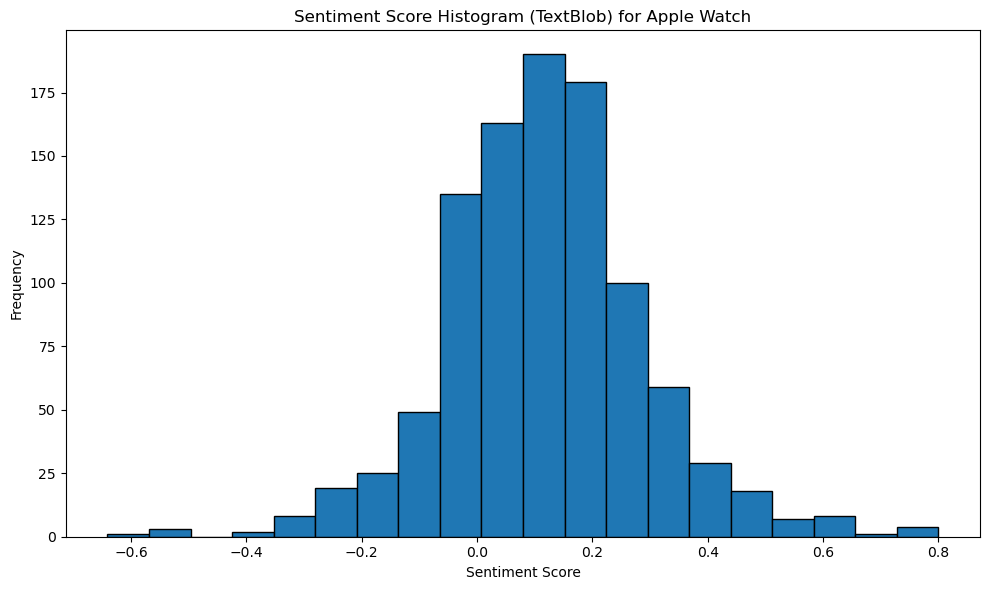

In [284]:
plt.figure(figsize=(10, 6))
plt.hist(df_watch['SentimentScore_TextBlob'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (TextBlob) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [285]:
sorted_df = df_watch.sort_values(by='SentimentScore_TextBlob', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 I work from home so I wear my Apple Watch around the house during work hours and to the gym. It’s great for work. I can see slacks and log in to my computer and stuff. When 5pm hits I take it off because I don’t want another way for people to get ahold of me anymore
---------------------------------------------------------------------------------------------------
1 Can the apple watch be worn on the underside of the wrist for 100% detection? I have a sleeve that covers my wrist I wear my watch on but it does not cover my under wrist. Any feedback would greatly help.
---------------------------------------------------------------------------------------------------
2 Although Apple Watches are good to wear for notifications and health reasons, I still say nothing beats a mechanical watch. The look, the feel, etc. They're beautifully crafted and look great on your wrist, in my opinion.
---------------------------------------------------------------------------------------------------


In [286]:
sorted_df = df_watch.sort_values(by='SentimentScore_TextBlob', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

0 I returned my Apple Watch Ultra as after 60 minute length swim, the water drop feature failed to expel all the moisture from the Apple Watch speaker, rendering audio unusable, until the phone was charging and warmeding up via battery heating! Divers watch my ass!
---------------------------------------------------------------------------------------------------
1 I wore an Apple Watch for awhile until mine decided to start randomly shocking me, last time it shocked me I could see the battery life going down as it was shocking the daylights out of my hand.
---------------------------------------------------------------------------------------------------
2 The is why I like the Galaxy Watch 5 Pro with raised titanium bezel, it protects the screen. I can appreciate the Apple watch design but I prefer the Samsung. 

You need the expensive titanium+sapphire versions either way to get anything scratch resilient, unfortunately.
--------------------------------------------------------------

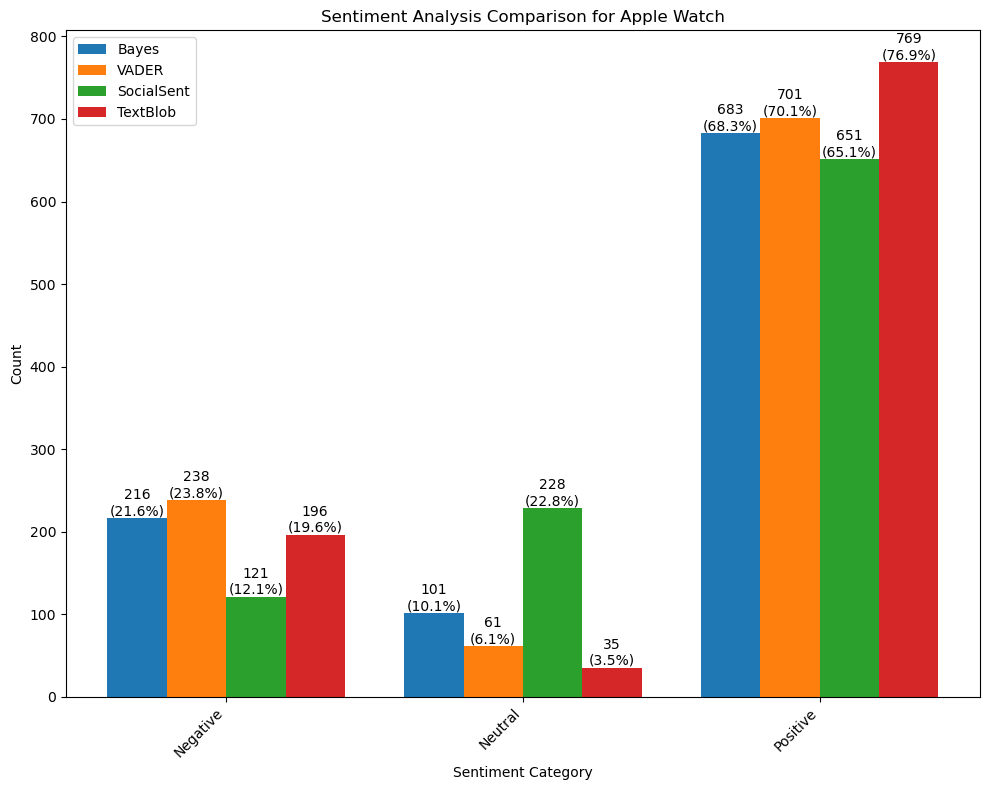

In [314]:
vader_counts = df_watch['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_watch['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_watch['SentimentCategory_Bayes'].value_counts()
textblob_counts = df_watch['SentimentCategory_TextBlob'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()
total_textblob = textblob_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index) | set(textblob_counts.index))

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.20

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]
x_textblob = [pos + bar_width * 3 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')
ax.bar(x_textblob, [textblob_counts.get(category, 0) for category in sentiment_categories], bar_width, label='TextBlob')


ax.set_xticks([pos + bar_width for pos in x_bayes])
center_positions = [(vader + social_sent) / 2 for vader, social_sent in zip(x_vader, x_social_sent)]
ax.set_xticks(center_positions)
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for Apple Watch')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)
    textblob_count = textblob_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')
    ax.text(x_textblob[i], textblob_count, f'{textblob_count}\n({calculate_percentage(textblob_count, total_textblob):.1f}%)', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


**29. Emotion analysis**

***29.1. iPhone***

In [233]:
from LeXmo import LeXmo

def calculate_emotion(text):
    emo = LeXmo.LeXmo(text)
    emo.pop('text')
    emo.pop('negative')
    emo.pop('positive')
    max_value = max(emo.values())
    max_keys = [key for key, value in emo.items() if value == max_value]
    return " ".join(max_keys)

df_iphone['Emotion'] = df_iphone['Sentiment_Comment'].apply(calculate_emotion)
df_iphone

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1492879640.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iphone['Emotion'] = df_iphone['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
4000  iPhone  #**Stop personal photos and videos from poppin...   
4001  iPhone  Look, I can't fucking stand Apple products. I'...   
4002  iPhone  I worked for Apple for most of a decade, inclu...   
4003  iPhone  I have the flip, literally writing this commen...   
4004  iPhone  I switched to iPhone last year after trying an...   
...      ...                                                ...   
4995  iPhone  If you take a stolen iPhone to apple to get it...   
4996  iPhone  Every year iPhones have to return to their pla...   
4997  iPhone  The new iphones are very boring and iterative....   
4998  iPhone  Yes lol, work in a phone shop and NEVER see bu...   
4999  iPhone  iphone X. I miss those rounded edges so much, ...   

                                        Cleaned_Comment  \
4000  stop personal photo video popping unexpectedly...   
4001  took fucking stand apple product pp guy like t...   
4002  worked apple decade including long stint core ...   
4003  lip literally writing comment year use review ...   
4004  switched iphone last year trying iphone two ye...   
...                                                 ...   
4995      take stolen iphone apple get repaired fault ‍   
4996  year iphones return place birth annual celebra...   
4997  new phone boring operative surprised growth sl...   
4998  yes work phone shop never see burn iphone … proud   
4999  iphone x miss rounded edge much feel comfortab...   

                                      Sentiment_Comment  Length  \
4000  # * * Stop personal photo and video from poppi...    3513   
4001  Took , I cannot fucking stand Apple products ....    2088   
4002  I worked for Apple for most of a decade , incl...    1930   
4003  I have the lip , literally writing this commen...    1872   
4004  I switched to iPhone last year after trying an...    1700   
...                                                 ...     ...   
4995  Of you take a stolen iPhone to apple to get it...      83   
4996  Very year iPhones have to return to their plac...      83   
4997  The new phone are very boring and operative . ...      83   
4998  Yes ll , work in a phone shop and NEVER see bu...      83   
4999  iphone X . I miss those rounded edges so much ...      83   

                                      Tokenized_Comment  Topic  \
4000  [stop, personal, photo, video, popping, unexpe...      4   
4001  [took, fucking, stand, apple, product, pp, guy...      3   
4002  [worked, apple, decade, including, long, stint...      1   
4003  [lip, literally, writing, comment, year, use, ...      4   
4004  [switched, iphone, last, year, trying, iphone,...      3   
...                                                 ...    ...   
4995  [take, stolen, iphone, apple, get, repaired, f...      3   
4996  [year, iphones, return, place, birth, annual, ...      3   
4997  [new, phone, boring, operative, surprised, gro...      1   
4998  [yes, work, phone, shop, never, see, burn, iph...      3   
4999  [iphone, x, miss, rounded, edge, much, feel, c...      3   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
4000                0.9628                Positive                Positive   
4001               -0.9682                Negative                Negative   
4002                0.9711                Positive                Positive   
4003                0.9914                Positive                Positive   
4004                0.9835                Positive                Positive   
...                    ...                     ...                     ...   
4995               -0.7096                Negative                Positive   
4996                0.0000                 Neutral                Positive   
4997               -0.6644                Negative                Negative   
4998                0.7003                Positive                Negative   
4999                0.7809          

In [234]:
df_iphone[['Comment','Emotion']]

Comment  \
4000  #**Stop personal photos and videos from poppin...   
4001  Look, I can't fucking stand Apple products. I'...   
4002  I worked for Apple for most of a decade, inclu...   
4003  I have the flip, literally writing this commen...   
4004  I switched to iPhone last year after trying an...   
...                                                 ...   
4995  If you take a stolen iPhone to apple to get it...   
4996  Every year iPhones have to return to their pla...   
4997  The new iphones are very boring and iterative....   
4998  Yes lol, work in a phone shop and NEVER see bu...   
4999  iphone X. I miss those rounded edges so much, ...   

                                                Emotion  
4000                                               fear  
4001                                            sadness  
4002                                       fear sadness  
4003                                       anticipation  
4004                                              trust  
...                                                 ...  
4995                                      anger sadness  
4996                        anticipation fear joy trust  
4997  anger anticipation disgust fear joy sadness su...  
4998                             anticipation joy trust  
4999                             anticipation joy trust  

[1000 rows x 2 columns]

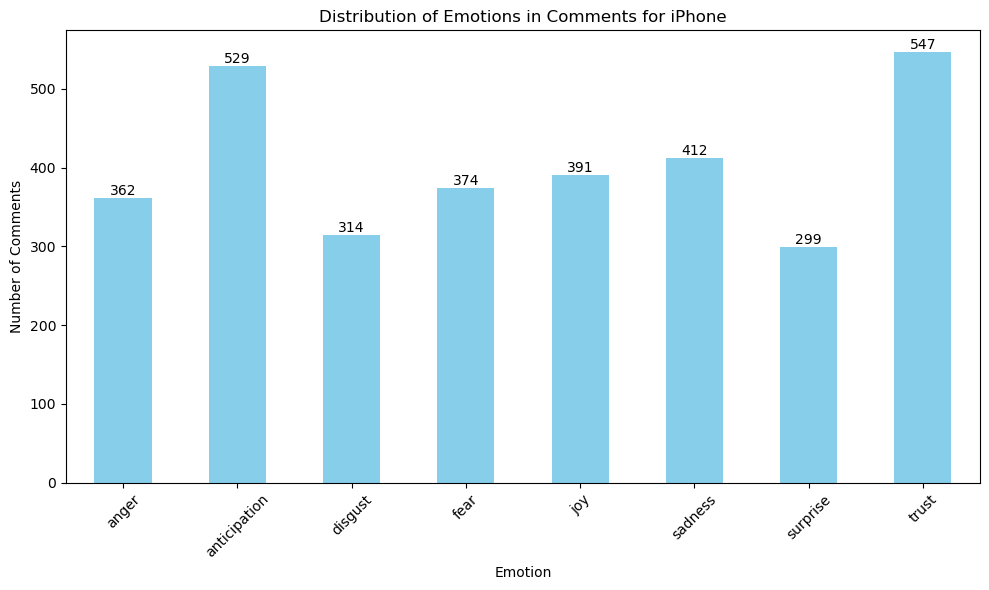

In [235]:
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_iphone.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for iPhone')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


***29.2. Macbook***

In [236]:
df_mac['Emotion'] = df_mac['Sentiment_Comment'].apply(calculate_emotion)
df_mac

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/1581698278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mac['Emotion'] = df_mac['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
2000  Macbook  >is the M2 that much better than the M1? \n\nI...   
2001  Macbook  Feeling electricity or a mild electrical sensa...   
2002  Macbook  Weight is a big deal. Don’t you want to take i...   
2003  Macbook  The hardware "build quality" everybody raves a...   
2004  Macbook  Hi guys. IT here. We currently use Kandji as o...   
...       ...                                                ...   
2995  Macbook  Hate MacBook batteries when they do this! Just...   
2996  Macbook  Why don't you just save up for an M1 MacBook A...   
2997  Macbook  Damn Im staring to get confused with Macbook l...   
2998  Macbook  I once used a whole ass window AC unit to cool...   
2999  Macbook  Too close to the price of the 14” MacBook Pro ...   

                                        Cleaned_Comment  \
2000  much better better matter opinion much better ...   
2001  feeling electricity mild electrical sensation ...   
2002  eight big deal want take class cafe library ma...   
2003  hardware build quality everybody rate never re...   
2004  gun currently use kandji mmm server linked app...   
...                                                 ...   
2995  late macbook battery must paid size old sac ba...   
2996       save macbook air unless need specific reason   
2997  damn staring get confused macbook line imagine...   
2998  used whole as window unit cool size macbook ai...   
2999  close price size ” macbook fro would rather pa...   

                                      Sentiment_Comment  Length  \
2000  > is the Of that much better than the Of ? Its...    3184   
2001  Feeling electricity or a mild electrical sensa...    1975   
2002  Eight is a big deal . To not you want to take ...    1765   
2003  The hardware " build quality " everybody rates...    1718   
2004  I guns . of here . He currently use Kandji as ...    1617   
...                                                 ...     ...   
2995  Late MacBook batteries when they do this ! Mus...      92   
2996  Why do not you just save up for an Of MacBook ...      92   
2997  Damn I Am staring to get confused with Macbook...      92   
2998  I once used a whole ass window of unit to cool...      92   
2999  Too close to the price of the [ SIZE ] ” MacBo...      92   

                                      Tokenized_Comment  Topic  \
2000  [much, better, better, matter, opinion, much, ...      2   
2001  [feeling, electricity, mild, electrical, sensa...      4   
2002  [eight, big, deal, want, take, class, cafe, li...      2   
2003  [hardware, build, quality, everybody, rate, ne...      4   
2004  [gun, currently, use, kandji, mmm, server, lin...      3   
...                                                 ...    ...   
2995  [late, macbook, battery, must, paid, size, old...      2   
2996  [save, macbook, air, unless, need, specific, r...      2   
2997  [damn, staring, get, confused, macbook, line, ...      1   
2998  [used, whole, as, window, unit, cool, size, ma...      2   
2999  [close, price, size, ”, macbook, fro, would, r...      2   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
2000                0.9984                Positive                Positive   
2001                0.9478                Positive                Positive   
2002                0.9726                Positive                Positive   
2003                0.8916                Positive                Positive   
2004                0.9778                Positive                Positive   
...                    ...                     ...                     ...   
2995                0.0000                 Neutral                Negative   
2996               -0.3875                Negative                Negative   
2997               -0.6124                Negative                 Neutral   
2998               -0.2960                Negative                Negative   
2999               -0.102

In [237]:
df_mac[['Comment','Emotion']]

Comment  \
2000  >is the M2 that much better than the M1? \n\nI...   
2001  Feeling electricity or a mild electrical sensa...   
2002  Weight is a big deal. Don’t you want to take i...   
2003  The hardware "build quality" everybody raves a...   
2004  Hi guys. IT here. We currently use Kandji as o...   
...                                                 ...   
2995  Hate MacBook batteries when they do this! Just...   
2996  Why don't you just save up for an M1 MacBook A...   
2997  Damn Im staring to get confused with Macbook l...   
2998  I once used a whole ass window AC unit to cool...   
2999  Too close to the price of the 14” MacBook Pro ...   

                                                Emotion  
2000                                              trust  
2001                                              trust  
2002                                       anticipation  
2003                                              trust  
2004                                              trust  
...                                                 ...  
2995                                            sadness  
2996                                          joy trust  
2997                                      anger disgust  
2998  anger anticipation disgust fear joy sadness su...  
2999                             anticipation joy trust  

[1000 rows x 2 columns]

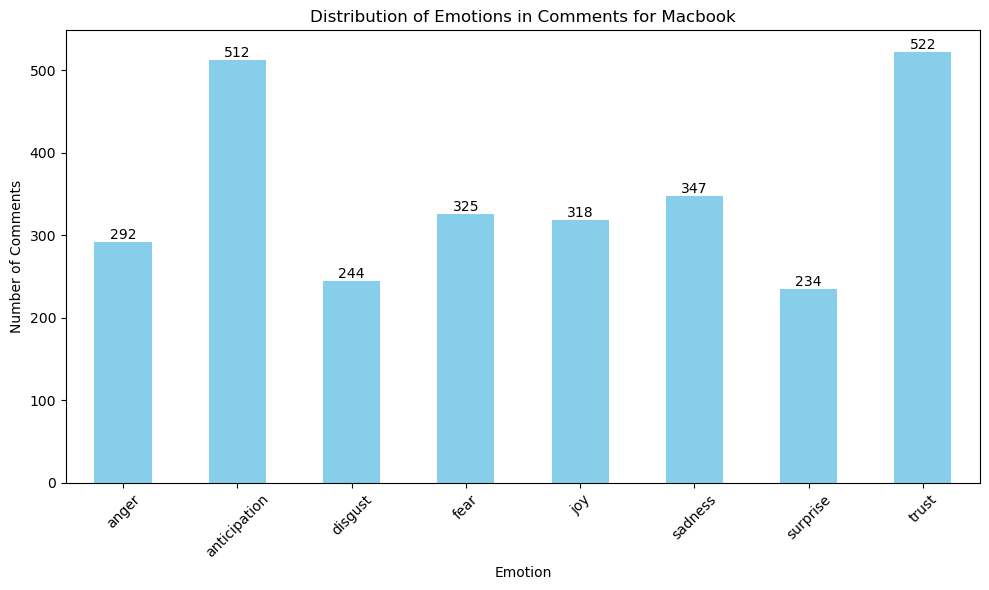

In [238]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_mac.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for Macbook')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.3. iPad***

In [239]:
df_ipad['Emotion'] = df_ipad['Sentiment_Comment'].apply(calculate_emotion)
df_ipad

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/3321922518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipad['Emotion'] = df_ipad['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
3000   iPad  Caught him in 8K UHD surround sound 16 Gigs ra...   
3001   iPad  Gotta say, I disagree pretty whole-heartedly w...   
3002   iPad  Love my M1 iPad Pro 11. I am a Realtor and Pro...   
3003   iPad  **"There's no bad product, just bad prices"-Te...   
3004   iPad  I think you answered your own question. If pun...   
...     ...                                                ...   
3995   iPad  If you moderately push on the right side of th...   
3996   iPad  Result: Yelled at / grounded / no video games ...   
3997   iPad  I’m beyond impressed with mine. The older i ge...   
3998   iPad  I've got my iPad 10.5" Pro since 2018 and, bes...   
3999   iPad  I had this exact same thing happen to me a few...   

                                        Cleaned_Comment  \
3000  caught uhd surround sound size fig ram hdr gef...   
3001  say disagree pretty whole heartily article rea...   
3002  love ipad fro size reactor property manager ip...   
3003  bad product bad price techtuber heard probably...   
3004  think answered question punishment situation l...   
...                                                 ...   
3995  moderately push right side back ipad air get r...   
3996  result yelled grounded video game new ipad str...   
3997  beyond impressed mine older get le use back tr...   
3998  got ipad size fro since size besides small per...   
3999  exact thing happen month back order exactly we...   

                                      Sentiment_Comment  Length  \
3000  Caught him in Of UHD surround sound [ SIZE ] F...    5965   
3001  Not To say , I disagree pretty whole - heartil...    5860   
3002  Love my Of iPad Fro [ SIZE ] . I am a Reactor ...    4383   
3003  * * " There is no bad product , just bad price...    4286   
3004  I think you answered your own question . Of pu...    3477   
...                                                 ...     ...   
3995  Of you moderately push on the right side of th...     286   
3996  Result : Yelled at / grounded / no video games...     286   
3997  I am beyond impressed with mine . The older i ...     286   
3998  I have got my iPad [ SIZE ] " Fro since [ SIZE...     285   
3999  I had this exact same thing happen to me a few...     284   

                                      Tokenized_Comment  Topic  \
3000  [caught, uhd, surround, sound, size, fig, ram,...      4   
3001  [say, disagree, pretty, whole, heartily, artic...      2   
3002  [love, ipad, fro, size, reactor, property, man...      1   
3003  [bad, product, bad, price, techtuber, heard, p...      1   
3004  [think, answered, question, punishment, situat...      2   
...                                                 ...    ...   
3995  [moderately, push, right, side, back, ipad, ai...      1   
3996  [result, yelled, grounded, video, game, new, i...      2   
3997  [beyond, impressed, mine, older, get, le, use,...      1   
3998  [got, ipad, size, fro, since, size, besides, s...      1   
3999  [exact, thing, happen, month, back, order, exa...      4   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
3000                0.9975                Positive                Positive   
3001                0.9990                Positive                Positive   
3002                0.9985                Positive                Positive   
3003                0.9933                Positive                Positive   
3004               -0.9916                Negative                Positive   
...                    ...                     ...                     ...   
3995                0.1280                Positive                 Neutral   
3996               -0.8706                Negative                Negative   
3997                0.7783                Positive                Positive   
3998                0.4840                Positive                Positive   
3999                0.2732                Posit

In [240]:
df_ipad[['Comment','Emotion']]

Comment        Emotion
3000  Caught him in 8K UHD surround sound 16 Gigs ra...          trust
3001  Gotta say, I disagree pretty whole-heartedly w...          trust
3002  Love my M1 iPad Pro 11. I am a Realtor and Pro...   anticipation
3003  **"There's no bad product, just bad prices"-Te...   fear sadness
3004  I think you answered your own question. If pun...   anticipation
...                                                 ...            ...
3995  If you moderately push on the right side of th...   anticipation
3996  Result: Yelled at / grounded / no video games ...   anticipation
3997  I’m beyond impressed with mine. The older i ge...  sadness trust
3998  I've got my iPad 10.5" Pro since 2018 and, bes...   anticipation
3999  I had this exact same thing happen to me a few...   anticipation

[1000 rows x 2 columns]

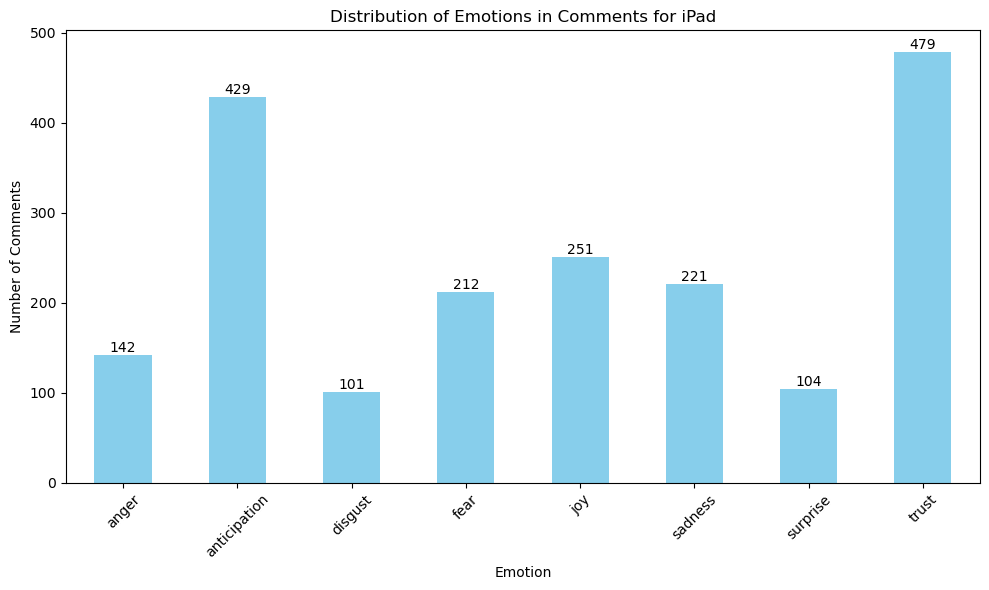

In [241]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_ipad.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for iPad')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.4. AirPods***

In [242]:
df_airpods['Emotion'] = df_airpods['Sentiment_Comment'].apply(calculate_emotion)
df_airpods

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/2632544429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airpods['Emotion'] = df_airpods['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
0    AirPods  Comparing these to my AirPods Max…\r  \n\r  \n...   
1    AirPods  This was a mistake. But it’s 99% your wife’s m...   
2    AirPods  Wait so the only person who cared enough about...   
3    AirPods  Picked up the Pro gen 2s today as well, migrat...   
4    AirPods  Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
..       ...                                                ...   
995  AirPods  You want to ruin your hearing, wear airpods wh...   
996  AirPods  In india airpods are for 250$ after so many ta...   
997  AirPods  Just throw on transparency mode and your AirPo...   
998  AirPods  when i drop it, the airpods always fall out of...   
999  AirPods  Would love to see the ability to play lossless...   

                                       Cleaned_Comment  \
0    comparing airpods max … bony rose nightmare si...   
1    mistake size wife ’ mistake left airpods lunch...   
2    wait person cared enough give gift brother say...   
3    picked fro gen today well migration pair bone ...   
4    would like warn anyone buying airpods size air...   
..                                                 ...   
995  want ruin hearing wear airpods get ratificatio...   
996  india airpods size many tax station wall earph...   
997  must throw transparent mode airpods literally ...   
998  drop airpods always fall case farthest distanc...   
999  would love see ability play loss airpods fro m...   

                                     Sentiment_Comment  Length  \
0    Comparing these to my AirPods Max … Bony has b...    7459   
1    His was a mistake . But it is [ SIZE ] % your ...    3265   
2    Wait so the only person who cared enough about...    2518   
3    Picked up the Fro gen is today as well , migra...    2281   
4    I all , I would like to warn anyone buying Air...    2254   
..                                                 ...     ...   
995  You want to ruin your hearing , wear airpods w...      89   
996  In india airpods are for [ SIZE ] $ after so m...      89   
997  Must throw on transparent mode and your AirPod...      89   
998  when i drop it , the airpods always fall out o...      89   
999  Would love to see the ability to play losses o...      89   

                                     Tokenized_Comment  Topic  \
0    [comparing, airpods, max, …, bony, rose, night...      0   
1    [mistake, size, wife, ’, mistake, left, airpod...      4   
2    [wait, person, cared, enough, give, gift, brot...      0   
3    [picked, fro, gen, today, well, migration, pai...      0   
4    [would, like, warn, anyone, buying, airpods, s...      0   
..                                                 ...    ...   
995  [want, ruin, hearing, wear, airpods, get, rati...      3   
996  [india, airpods, size, many, tax, station, wal...      1   
997  [must, throw, transparent, mode, airpods, lite...      0   
998  [drop, airpods, always, fall, case, farthest, ...      0   
999  [would, love, see, ability, play, loss, airpod...      2   

     SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
0                  0.9995                Positive                Positive   
1                 -0.9929                Negative                Positive   
2                  0.7199                Positive                Positive   
3                  0.9845                Positive                Positive   
4                  0.9808                Positive                Positive   
..                    ...                     ...                     ...   
995               -0.5423                Negative                 Neutral   
996                0.0000                 Neutral                Positive   
997                0.0000                 Neutral                Negative   
998               -0.2732                Negative                 Neutral   
999                0.7351                Positive                Positive   

     

In [243]:
df_airpods[['Comment','Emotion']]

Comment  \
0    Comparing these to my AirPods Max…\r  \n\r  \n...   
1    This was a mistake. But it’s 99% your wife’s m...   
2    Wait so the only person who cared enough about...   
3    Picked up the Pro gen 2s today as well, migrat...   
4    Hi all, \r  \n\r  \nI'd like to warn anyone bu...   
..                                                 ...   
995  You want to ruin your hearing, wear airpods wh...   
996  In india airpods are for 250$ after so many ta...   
997  Just throw on transparency mode and your AirPo...   
998  when i drop it, the airpods always fall out of...   
999  Would love to see the ability to play lossless...   

                                               Emotion  
0                                                trust  
1                                                anger  
2                               anticipation joy trust  
3                                              sadness  
4                                                 fear  
..                                                 ...  
995                                 fear sadness trust  
996                                            sadness  
997  anger anticipation disgust fear joy sadness su...  
998                                            sadness  
999                             anger fear joy sadness  

[1000 rows x 2 columns]

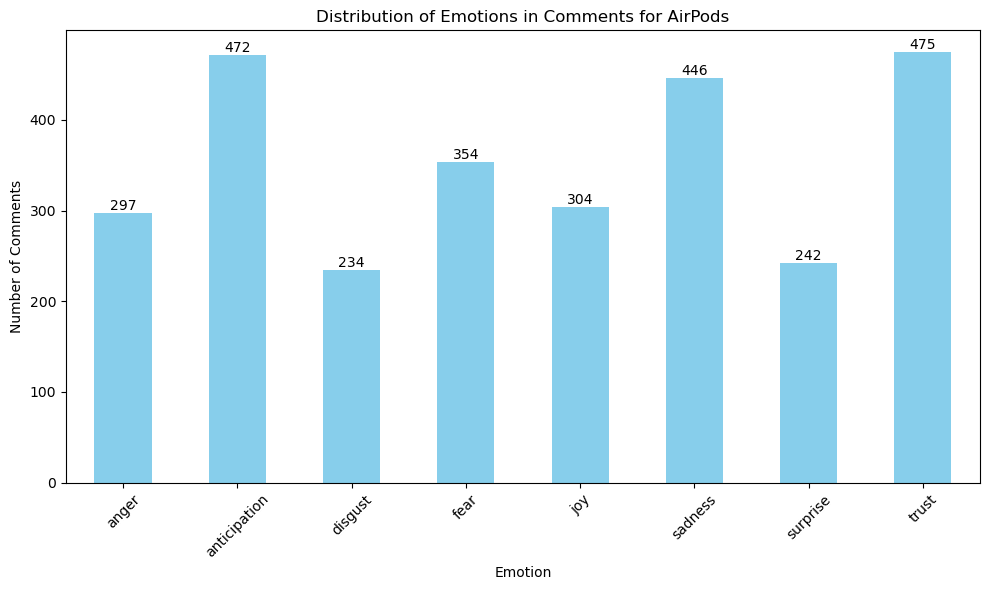

In [244]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_airpods.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for AirPods')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.5. Apple Watch***

In [245]:
df_watch['Emotion'] = df_watch['Sentiment_Comment'].apply(calculate_emotion)
df_watch

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_23405/164227614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_watch['Emotion'] = df_watch['Sentiment_Comment'].apply(calculate_emotion)


Search                                            Comment  \
1000  Apple Watch  At this point it's really a matter of preferen...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   
...           ...                                                ...   
1995  Apple Watch  I love my Apple Watch! When I worked in the ho...   
1996  Apple Watch  Why is generally apple watch battery life so l...   
1997  Apple Watch  I’m buying it for the bigger size.\n\nSounds s...   
1998  Apple Watch  If you want a Apple Watch you don’t have to ba...   
1999  Apple Watch  Bad take. I work in finance and 80% of the peo...   

                                        Cleaned_Comment  \
1000  point really matter preference platform margin...   
1001  honestly difficult answer never really stopped...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   
...                                                 ...   
1995  love apple watch worked hospital actually woul...   
1996  generally apple watch battery life low compare...   
1997  buying bigger size wound silly pre apple watch...   
1998  want apple watch baby get ultra ware one naked...   
1999  take work finance size people work wear apple ...   

                                      Sentiment_Comment  Length  \
1000  It this point it is really a matter of prefere...    4474   
1001  Honestly , this is difficult to answer . Until...    4336   
1002  Smart watch enthusiast here , I have been usin...    4082   
1003  I discovered this year that I have had insomni...    3674   
1004  Aimed engineer here and boy do I got several p...    3570   
...                                                 ...     ...   
1995  I love my Apple Watch ! When I worked in the h...     174   
1996  Why is generally apple watch battery life so l...     174   
1997  I am buying it for the bigger size . Wounds si...     174   
1998  Of you want a Apple Watch you do not have to b...     173   
1999  Had take . I work in finance and [ SIZE ] % of...     173   

                                      Tokenized_Comment  Topic  \
1000  [point, really, matter, preference, platform, ...      2   
1001  [honestly, difficult, answer, never, really, s...      0   
1002  [smart, watch, enthusiast, using, smart, watch...      2   
1003  [discovered, year, insomnia, long, time, ackno...      3   
1004  [aimed, engineer, boy, got, several, problem, ...      2   
...                                                 ...    ...   
1995  [love, apple, watch, worked, hospital, actuall...      0   
1996  [generally, apple, watch, battery, life, low, ...      0   
1997  [buying, bigger, size, wound, silly, pre, appl...      0   
1998  [want, apple, watch, baby, get, ultra, ware, o...      0   
1999  [take, work, finance, size, people, work, wear...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9975                Positive                Positive   
1001                0.9918                Positive                Positive   
1002                0.9966                Positive                Positive   
1003               -0.8367                Negative                Positive   
1004                0.9108                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.6114                Positive                Positive   
1996                0.5265                Positive                Positive   
1997                0.6187                Positive                Positive   
1998               -0.6486                Negative         

In [246]:
df_watch[['Comment','Emotion']]

Comment            Emotion
1000  At this point it's really a matter of preferen...       anticipation
1001  Honestly, this is difficult to answer. Until n...               fear
1002  Smart watch enthusiast here, I have been using...       anticipation
1003  I discovered this year that I've had insomnia ...       anticipation
1004  Biomed engineer here and boy do I got several ...              trust
...                                                 ...                ...
1995  I love my Apple Watch! When I worked in the ho...       anticipation
1996  Why is generally apple watch battery life so l...  anticipation fear
1997  I’m buying it for the bigger size.\n\nSounds s...               fear
1998  If you want a Apple Watch you don’t have to ba...               fear
1999  Bad take. I work in finance and 80% of the peo...              trust

[1000 rows x 2 columns]

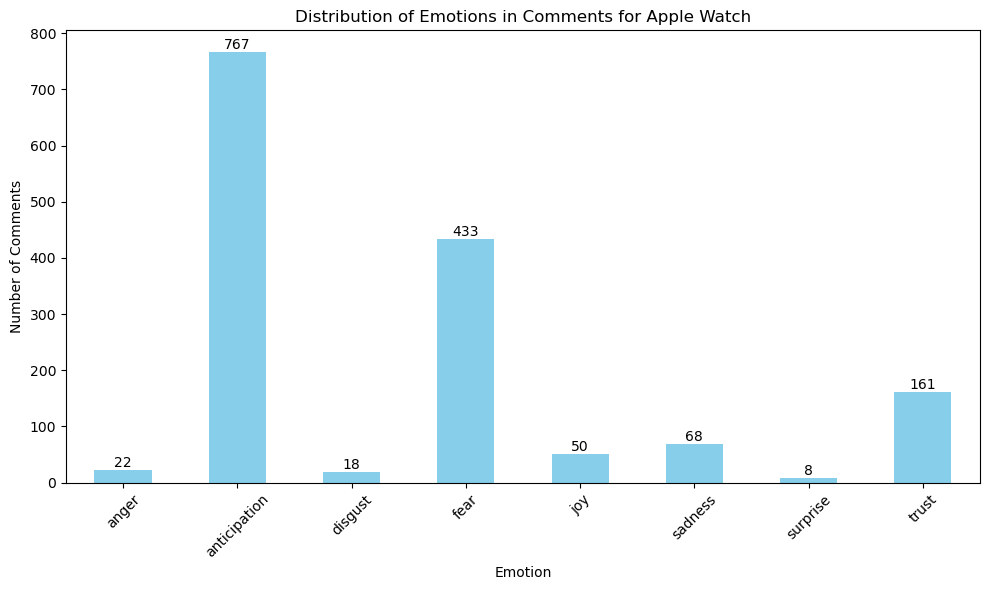

In [247]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_watch.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for Apple Watch')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [248]:
df_watch

Search                                            Comment  \
1000  Apple Watch  At this point it's really a matter of preferen...   
1001  Apple Watch  Honestly, this is difficult to answer. Until n...   
1002  Apple Watch  Smart watch enthusiast here, I have been using...   
1003  Apple Watch  I discovered this year that I've had insomnia ...   
1004  Apple Watch  Biomed engineer here and boy do I got several ...   
...           ...                                                ...   
1995  Apple Watch  I love my Apple Watch! When I worked in the ho...   
1996  Apple Watch  Why is generally apple watch battery life so l...   
1997  Apple Watch  I’m buying it for the bigger size.\n\nSounds s...   
1998  Apple Watch  If you want a Apple Watch you don’t have to ba...   
1999  Apple Watch  Bad take. I work in finance and 80% of the peo...   

                                        Cleaned_Comment  \
1000  point really matter preference platform margin...   
1001  honestly difficult answer never really stopped...   
1002  smart watch enthusiast using smart watch even ...   
1003  discovered year insomnia long time acknowledge...   
1004  aimed engineer boy got several problem specifi...   
...                                                 ...   
1995  love apple watch worked hospital actually woul...   
1996  generally apple watch battery life low compare...   
1997  buying bigger size wound silly pre apple watch...   
1998  want apple watch baby get ultra ware one naked...   
1999  take work finance size people work wear apple ...   

                                      Sentiment_Comment  Length  \
1000  It this point it is really a matter of prefere...    4474   
1001  Honestly , this is difficult to answer . Until...    4336   
1002  Smart watch enthusiast here , I have been usin...    4082   
1003  I discovered this year that I have had insomni...    3674   
1004  Aimed engineer here and boy do I got several p...    3570   
...                                                 ...     ...   
1995  I love my Apple Watch ! When I worked in the h...     174   
1996  Why is generally apple watch battery life so l...     174   
1997  I am buying it for the bigger size . Wounds si...     174   
1998  Of you want a Apple Watch you do not have to b...     173   
1999  Had take . I work in finance and [ SIZE ] % of...     173   

                                      Tokenized_Comment  Topic  \
1000  [point, really, matter, preference, platform, ...      2   
1001  [honestly, difficult, answer, never, really, s...      0   
1002  [smart, watch, enthusiast, using, smart, watch...      2   
1003  [discovered, year, insomnia, long, time, ackno...      3   
1004  [aimed, engineer, boy, got, several, problem, ...      2   
...                                                 ...    ...   
1995  [love, apple, watch, worked, hospital, actuall...      0   
1996  [generally, apple, watch, battery, life, low, ...      0   
1997  [buying, bigger, size, wound, silly, pre, appl...      0   
1998  [want, apple, watch, baby, get, ultra, ware, o...      0   
1999  [take, work, finance, size, people, work, wear...      0   

      SentimentScore_VADER SentimentCategory_VADER SentimentCategory_Bayes  \
1000                0.9975                Positive                Positive   
1001                0.9918                Positive                Positive   
1002                0.9966                Positive                Positive   
1003               -0.8367                Negative                Positive   
1004                0.9108                Positive                Positive   
...                    ...                     ...                     ...   
1995                0.6114                Positive                Positive   
1996                0.5265                Positive                Positive   
1997                0.6187                Positive                Positive   
1998               -0.6486                Negative         

In [329]:
df_iphone.to_excel('Output/Reddit/reddit_iphone.xlsx', index=False)
df_airpods.to_excel('Output/Reddit/reddit_airpods.xlsx', index=False)
df_ipad.to_excel('Output/Reddit/reddit_ipad.xlsx', index=False)
df_mac.to_excel('Output/Reddit/reddit_mac.xlsx', index=False)
df_watch.to_excel('Output/Reddit/reddit_watch.xlsx', index=False)